# **1. Konten**
* [1 Konten](#intro)
* [2 Problem Statement](#data_review)
* [3 Tujuan](#data_review)
* [Tahap 1. Memuat File Data Dan Mempelajari Informasi Umum](#data_review)
* [Tahap 2. Mempersiapkan data](#data_review)
    * [2.1. Mengganti Nama Kolom](#header_style)
    * [2.2. Mengonversi Tipe Data](#header_style)
    * [2.3. Menangani Nilai Yang Hilang](#header_style)
        * [2.3.1. Kolom Name](#header_style)
        * [2.3.2. Kolom year_of_release](#header_style)
        * [2.3.3. Kolom Critic_Score](#header_style)       
        * [2.3.4. Kolom User_Score](#header_style)
        * [2.3.5. Kolom Rating](#header_style)
    * [2.4. Konversi Tipe Data](#header_style)
    * [2.5. Kalkulasi Total Penjualan Per Video Game](#header_style)       
    * [2.6. Identifikasi Duplikat](#header_style)       
* [Tahap 3. Analisis Data](#data_review)
    * [3.1. Total Jumlah Produksi Video Game Per Tahun](#header_style)
    * [3.2. Total Nilai Penjualan Video Game Per Platform](#header_style)
    * [3.3. Distribusi Masa Hidup Per Platform](#header_style)
    * [3.4. Masa Hidup VS Tahun Aktif](#header_style)
    * [3.5. Depresiasi Penjualan Untuk Setiap Platform](#header_style)   
        * [3.5.1. Tingkat Penjualan Rata-Rata Pertahun](#header_style)
    * [3.6. Bekerja Menggunakan Data Yang Paling Relevan](#header_style)  
    * [3.7. Pengaruh Ulasan Pengguna Dan Profesional Terhadap Penjualan](#header_style)
    * [3.8. Membandingkan Total Penjualan PlayStation4 Dengan Platform Lain](#header_style)
    * [3.9. Distribusi Video Game Untuk Setiap Genre](#header_style)
        * [3.9.1. Total Penjualan Untuk Setiap Genre Pada Platform Popular](#header_style)
        * [3.9.2. Total Penjualan Untuk Setiap Genre Di Seluruh Platform](#header_style)
* [Tahap 4. Pemrofilan Pengguna Untuk Masing-Masing Wilayah](#data_review)
    * [4.1. User Profil : Amerika Utara (NA)](#header_style)
    * [4.2. User Profil : Eropa (EU)](#header_style)
    * [4.3. User Profil : Jepang (JP)](#header_style)
    * [4.4. ESRB Rating VS Penjualan Di Setiap Region](#header_style)
* [Tahap 5. Menguji Hipotesis](#data_review)
    * [5.1. Hipotesis I : Rata-rata rating pengguna platform Xbox One dan PC adalah sama](#header_style)
    * [5.2. Hipotesis II : Rata-rata rating pengguna genre Action dan Sports berbeda](#header_style)    
* [Tahap 6. Kesimpulan Umum](#data_review)

# **2. Problem Statement**

Kami bekerja di toko daring "Ice" yang memiliki bisnis penjualan video game dari seluruh dunia. Data terkait ulasan pengguna dan ahli game, genre, platform (misalnya Xbox atau PlayStation), dan data historis penjualan game tersedia dari sumber terbuka. Kami perlu mengidentifikasi pola-pola yang menentukan apakah suatu game dapat dikatakan berhasil atau tidak. Dengan begitu, kami dapat menemukan game yang paling potensial dan merencanakan kampanye iklannya. Kami memiliki data yang tersedia sejak tahun 2016, dimana sekarang adalah bulan Desember tahun 2016 dan perusahaan kami sedang merencanakan kampanye untuk tahun 2017. Data yang tersedia saat ini memuat sejumlah kolom sebagai berikut:

* **Deskripsi Data**
    * Name (nama)
    * Platform
    * Year_of_Release (tahun rilis)
    * Genre
    * NA_sales (penjualan di Amerika Utara dalam satuan juta USD)
    * EU_sales (penjualan di Eropa dalam satuan juta USD)
    * JP_sales (penjualan di Jepang dalam satuan juta USD)
    * Other_sales (penjualan di negara lainnya dalam satuan juta USD)
    * Critic_Score (skor ulasan dari kritikus, maksimal 100)
    * User_Score (skor ulasan dari pengguna, maksimal 10)
    * Rating (ESRB)

# **3. Tujuan**

Kami berupaya untuk menentukan strategi kampanye iklan video game daring yang paling efektif dengan cara mengidentifikasi dan mempelajari karakteristik pola data dari sejumlah variabel pada dataset yang berpotensi untuk mempengaruhi penjualan dengan pendekatan statistik menggunakan data-rata historikal.  

# **Tahap 1. Memuat File Data Dan Mempelajari Informasi Umum**

In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install plotly-express

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Memuat semua library
import pandas as pd
import seaborn as sns
from scipy.stats import kstest
from scipy.stats import lognorm
import numpy as np
import matplotlib.pyplot as plt
import re
import math
from math import factorial
from scipy import stats as st
import missingno as msno # untuk mengidentifikasi pola missing value
import random
import scipy.stats as stats
import plotly.express as px
import statistics

In [4]:
# Memuat dataframe
df = pd.read_csv('/kaggle/input/game-dataset-analysis/games_dataset.csv')
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [5]:
# Menampilkan informasi/rangkuman umum tentang DataFrame
print(df.shape)
print()
print(df.info())
print()
print(df.isnull().sum())

(16715, 11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_S

**Kesimpulan**

1. Dataset kami terdiri atas 11 kolom dan memuat 16.715 baris data
2. Terdapat 2 video game dengan judul/nama video game yang tidak teridentifikasi
3. 269 video game tidak disertai dengan tahun rilis
4. Genre untuk 2 video game tidak teridentifikasi
5. Hanya setengah dari total keseluruhan video game yang memuat ulasan dari kritikus
6. 40% pengguna tidak menyertakan ulasan pada video game
7. Hanya 60% dari total keseluruhan video game yang memuat rating usia

# **Tahap 2. Mempersiapkan Data**

## **2.1. Mengganti Nama Kolom**

Kami menemukan bahwa nama-nama kolom pada dataset kami ditulis menggunakan huruf kapital. Untuk kemudahan penyusunan kode, maka kami akan menggantinya menjadi huruf kecil

In [6]:
# mengganti nama kolom menjadi huruf kecil
df.columns = df.columns.str.lower()

# tampilkan dataset dengan nama kolom baru
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## **2.2. Mengonversi Tipe Data**

Kami masih menemukan sejumlah tipe data yang keliru pada dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [8]:
# Mengonversi tipe data year_of_release menjadi integer
df['year_of_release'] = df['year_of_release'].astype('Int64', errors='ignore')
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [9]:
# Mengonversi tipe data critic_score menjadi integer
df['critic_score'] = df['critic_score'].astype('Int64', errors='ignore')
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN


## **2.3. Menangani Nilai Yang Hilang**

Baris null pada dataset harus ditangani karena data yang tidak lengkap dapat memengaruhi analisis dan model yang dibangun. Ketika ada baris null pada dataset, ini berarti informasi penting yang hilang dari data. Jika baris null tidak ditangani, maka model atau analisis yang dibuat dari dataset tersebut dapat menjadi tidak akurat atau bias.

<Axes: >

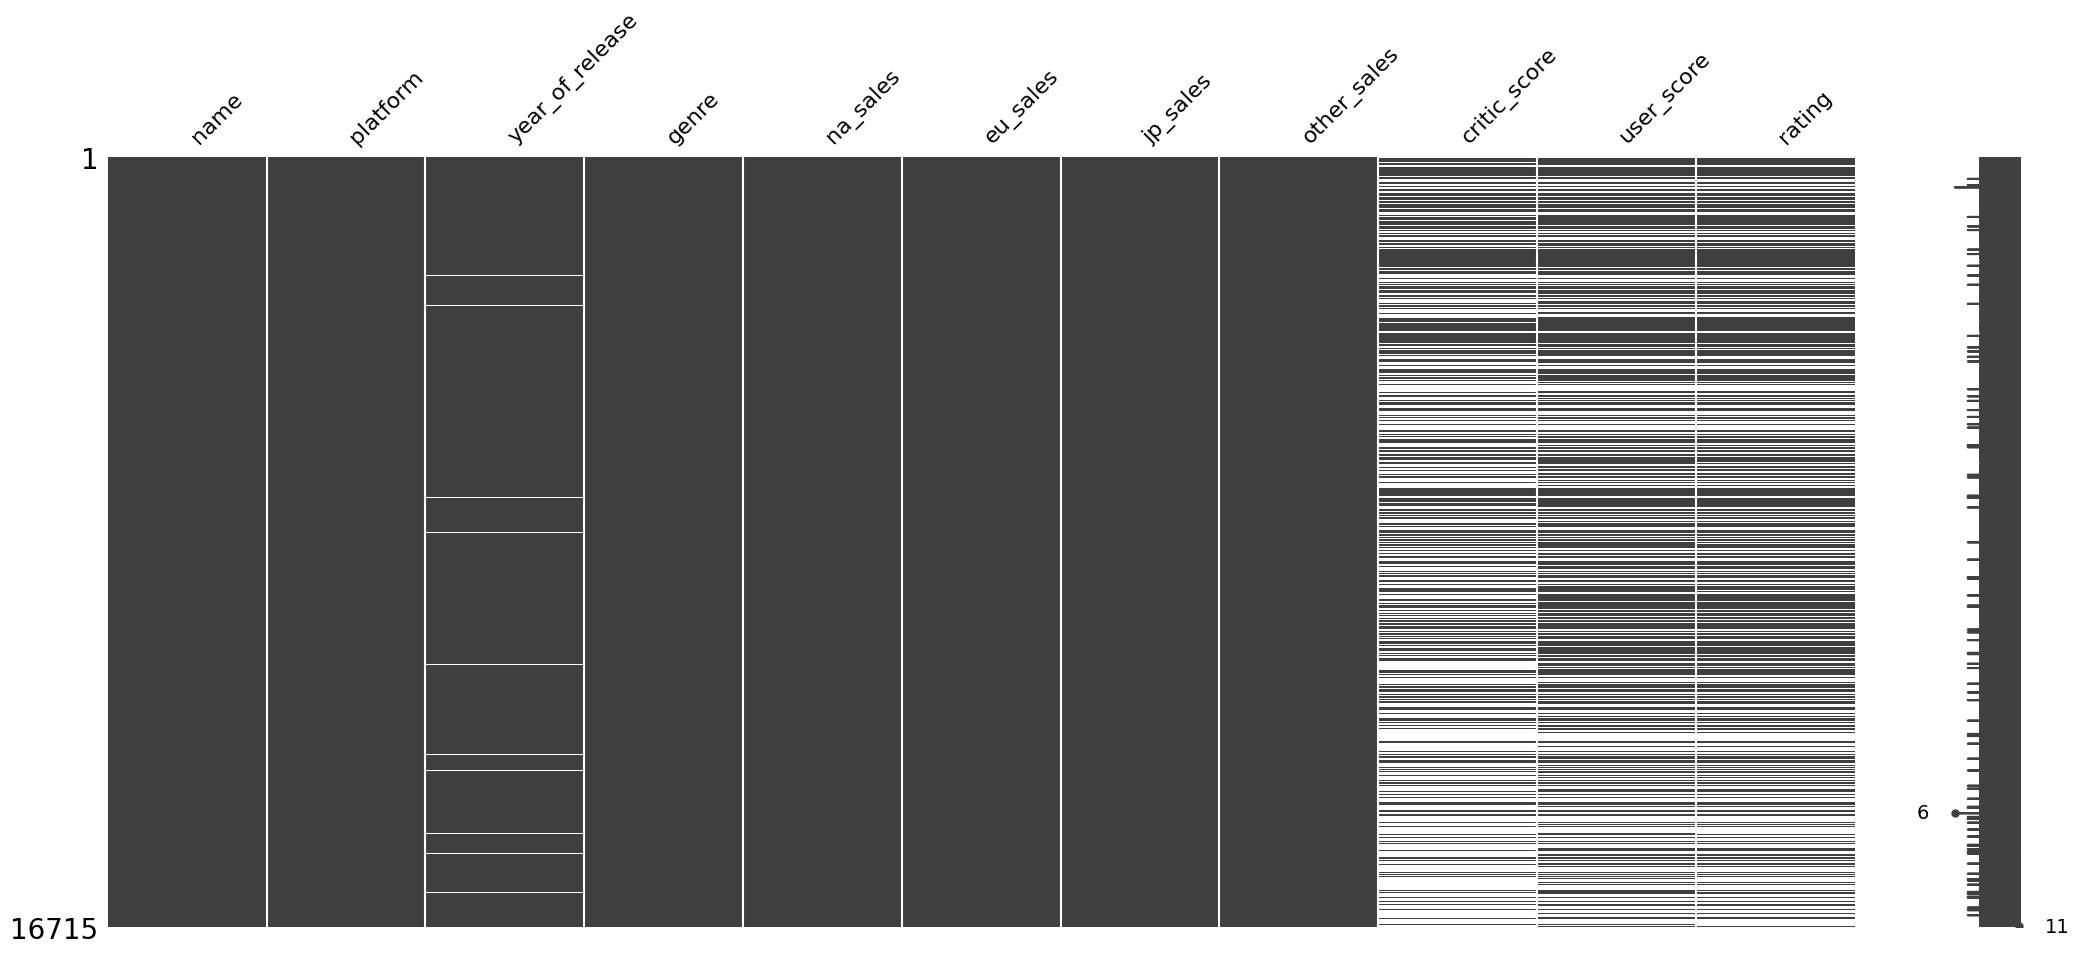

In [10]:
# Mengidentifikasi pola pada baris yang hilang
msno.matrix(df)

<Axes: >

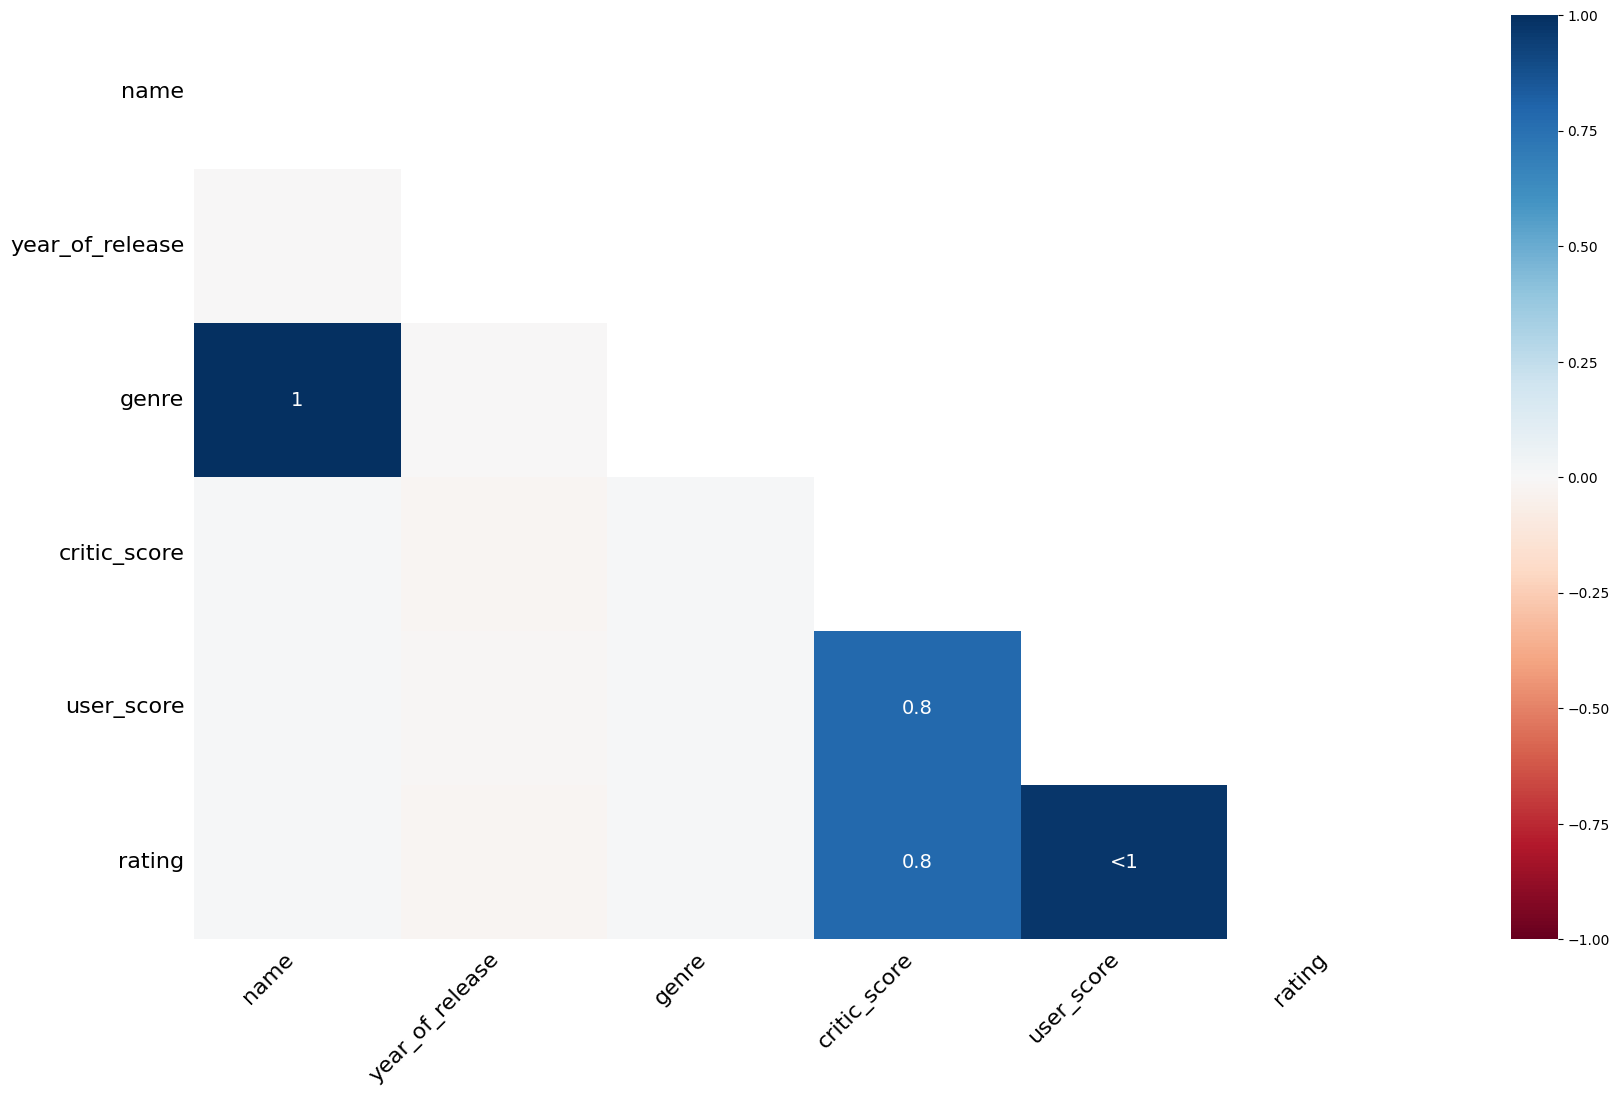

In [11]:
msno.heatmap(df)

**Kesimpulan**

1. Terdapat simetrisitas baris yang hilang untuk kolom genre dan name sehingga menyebabkan korelasinya sebesar 100%
2. Baris null untuk kolom year_of_release tidak memiliki suatu pola khusus sehingga dapat diklasifikasikan MAR
3. Terdapat simetrisitas pola baris yang null untuk kolom critic_score, rating, dan user_score (Missing Not At Random/MNAR)

In [12]:
# membuat fungsi untuk menghitung persentase baris yang null
def missing_values(df):

    # Total jumlah missing values
    null = df.isnull().sum()

    # persentase missing values
    null_percentage = 100 * df.isnull().sum() / len(df)

    # membuat tabel berisi yang berisi null & null_percentage
    null_table = pd.concat([null, null_percentage], axis=1)

    # Rename kolom
    null_table_rename = null_table.rename(
    columns = {0 : 'missing_values', 1 : 'missing_values_percent'})

    # mengurutkan nilai pada tabel
    null_table_rename = null_table_rename[
        null_table_rename.iloc[:,1] != 0].sort_values(
    'missing_values_percent', ascending=False).round(1)

    # Return the dataframe with missing information
    return null_table_rename

In [13]:
missing_values(df)

,missing_values,missing_values_percent
critic_score,8578,51.3
rating,6766,40.5
user_score,6701,40.1
year_of_release,269,1.6
name,2,0.0
genre,2,0.0


### **2.3.1. Kolom Name**

Kami menemukan tingkat korelasi yang sangat kuat untuk baris yang hilang pada kolom Name dan Genre. Kami yakin hal ini terjadi tentu disebabkan karena adanya simetrisitas baris *null* dari kedua kolom tersebut.

In [14]:
# identifikasi baris yang hilang untuk kolom name
df[df['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN


**Kesimpulan**

Kolom name dan kolom genre **Missing Not At Random (MNAR)**

In [15]:
# Hilangkan baris null untuk kolom name dan genre
df = df.dropna(subset=['name', 'genre']).reset_index(drop=True)
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,NaN
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,NaN


### **2.3.2. Kolom year_of_release**

Kolom year_of_release memiliki 269 nilai baris yang hilang. Ini berarti sekitar 2% dari seluruh total data.

In [16]:
# identifikasi missing value setelah menangani kolom name & genre
missing_values(df)

,missing_values,missing_values_percent
critic_score,8576,51.3
rating,6764,40.5
user_score,6699,40.1
year_of_release,269,1.6


In [17]:
# memfiltering dataframe dengan kondisi year_of_release yang null
df_year_null = df[df['year_of_release'].isnull()]
df_year_null

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,<NA>,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43,tbd,E10+
16403,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69,6.5,T
16446,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,<NA>,NaN,NaN


In [18]:
# Identifikasi nilai unik pada masing-masing kolom untuk dataframe df_year_null
df_year_null.nunique()

name               232
platform            16
year_of_release      0
genre               12
na_sales            69
eu_sales            47
jp_sales            26
other_sales         27
critic_score        56
user_score          48
rating               5
dtype: int64

In [19]:
# Identifikasi nama video game dengan tahun rilis yang hilang
df_year_null['name'].unique()

array(['Madden NFL 2004', 'FIFA Soccer 2004',
       'LEGO Batman: The Videogame', 'wwe Smackdown vs. Raw 2006',
       'Space Invaders', 'Rock Band',
       "Frogger's Adventures: Temple of the Frog",
       'LEGO Indiana Jones: The Original Adventures', 'Call of Duty 3',
       'Call of Duty: Black Ops', 'Triple Play 99', 'Adventure', 'Combat',
       'LEGO Harry Potter: Years 5-7', 'NASCAR Thunder 2003',
       'Hitman 2: Silent Assassin', 'Legacy of Kain: Soul Reaver',
       'Donkey Kong Land III', 'Air-Sea Battle', 'Suikoden III',
       'Wheel of Fortune', 'Yakuza 4', 'Namco Museum', 'Rhythm Heaven',
       'The Lord of the Rings: War in the North', 'Madden NFL 07',
       'MLB SlugFest 20-03', 'Shaun White Snowboarding',
       'PES 2009: Pro Evolution Soccer', 'WarioWare: Twisted!',
       'Madden NFL 11', 'Test Drive Unlimited 2',
       'The Chronicles of Narnia: The Lion, The Witch and The Wardrobe',
       'Monster Hunter 2', 'Metal Gear Solid 2: Substance',
       'Advanc

In [20]:
# Identifikasi baris yang hilang untuk game The Lord of the Rings: War in the North di dataset asli
df[df['name'] == 'Madden NFL 07']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
241,Madden NFL 07,PS2,2006,Sports,3.63,0.24,0.01,0.61,84,8.2,E
971,Madden NFL 07,X360,2006,Sports,1.66,0.00,0.01,0.13,80,6,E
2034,Madden NFL 07,XB,2006,Sports,0.97,0.03,0.00,0.03,83,8.7,E
2478,Madden NFL 07,PSP,<NA>,Sports,0.77,0.03,0.00,0.04,78,6.6,E
3228,Madden NFL 07,GC,2006,Sports,0.48,0.13,0.00,0.02,82,9.2,E
3837,Madden NFL 07,PS3,2006,Sports,0.47,0.00,0.01,0.04,76,4.2,E
4005,Madden NFL 07,Wii,2006,Sports,0.46,0.00,0.00,0.04,81,8,E
7371,Madden NFL 07,DS,2006,Sports,0.20,0.00,0.00,0.02,70,6.5,E
14887,Madden NFL 07,GBA,2006,Sports,0.02,0.01,0.00,0.00,68,9.3,E


In [21]:
# Identifikasi baris yang hilang untuk game Need for Speed: Most Wanted di dataset asli
df[df['name'] == 'Need for Speed: Most Wanted']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82,9.1,T
523,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,<NA>,NaN,NaN
1189,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83,8.5,T
1590,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83,8.5,T
1997,Need for Speed: Most Wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,83,8.8,T
2047,Need for Speed: Most Wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,<NA>,NaN,NaN
3580,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,80,9.1,T
5971,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82,8.5,T
6272,Need for Speed: Most Wanted,WiiU,2013,Racing,0.13,0.12,0.00,0.02,<NA>,NaN,NaN
6409,Need for Speed: Most Wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,45,6.1,E


In [22]:
# Identifikasi baris yang hilang untuk game he Lord of the Rings: War in the North di dataset asli
df[df['name'] == 'The Lord of the Rings: War in the North']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2452,The Lord of the Rings: War in the North,X360,<NA>,Action,0.52,0.24,0.00,0.08,61,7.4,M
2521,The Lord of the Rings: War in the North,PS3,<NA>,Action,0.25,0.42,0.01,0.13,63,7,M
7967,The Lord of the Rings: War in the North,PC,2011,Action,0.05,0.11,0.00,0.03,66,7.1,M


In [23]:
print('judul video game terdapat sebanyak:', df['name'].nunique(), 'judul')

judul video game terdapat sebanyak: 11559 judul


In [28]:
# Mengubah tipe data kolom 'year_of_release' menjadi string agar memiliki atribut 'tolist' seperti tipe data list
df['year_of_release'] = df['year_of_release'].astype(str)

# Membuat list untuk menampung data
data_list = []

# Memuat list nilai tahun rilis yang unik untuk setiap judul video game (11.559 baris list)
for name in df['name'].unique().tolist():
    specific_name_df = df[df['name'] == name].dropna(subset=['year_of_release'])['year_of_release']  # specific_name_df : mengambil baris-baris yang memiliki nama yang sama dengan iterasi name, dan juga yang memiliki nilai 'year_of_release' yang tidak kosong
    name_year_list = specific_name_df.unique().tolist()

    # Menambahkan data ke list
    data_list.append({'name': name, 'year_list': name_year_list})

# Membuat DataFrame dari list data
year_film = pd.DataFrame(data_list)

# Munculkan year_df sebagai DataFrame
year_film

,name,year_list
0,Wii Sports,[2006]
1,Super Mario Bros.,"[1985, 1999]"
2,Mario Kart Wii,[2008]
3,Wii Sports Resort,[2009]
4,Pokemon Red/Pokemon Blue,[1996]
...,...,...
11554,15 Days,[2009]
11555,Aiyoku no Eustia,[2014]
11556,Woody Woodpecker in Crazy Castle 5,[2002]
11557,LMA Manager 2007,[2006]


**Kesimpulan**

Kami mengidentifikasi tahun rilis untuk masing-masing judul video game. Misalnya, baris kedua [1985,1999] merupakan judul video game Super Mario Bros.	yang dirilis pada tahun 1985 dan 1999, dimana untuk video game tersebut nilai baris kolom year_of_release-nya tidak null

In [29]:
# Mengubah tipe data kolom 'year_of_release' menjadi string agar memiliki atribut 'tolist' seperti tipe data list
df['year_of_release'] = df['year_of_release'].astype(str)

# Membuat DataFrame kosong untuk menampung name_year_list
year_df = pd.DataFrame(columns=['name', 'year_list'])

# Memuat list nilai tahun rilis yang unik untuk setiap judul video game (11.559 baris list)
for name in df['name'].unique().tolist():
    specific_name_df = df[df['name'] == name].dropna(subset=['year_of_release'])['year_of_release'] # specific_name_df : mengambil baris-baris yang memiliki nama yang sama dengan iterasi name, dan juga yang memiliki nilai 'year_of_release' yang tidak kosong
    name_year_list = specific_name_df.unique().tolist()

    # Membuat DataFrame sementara untuk baris yang akan ditambahkan
    temp_df = pd.DataFrame({'name': [name], 'year_list': [name_year_list]})

    # Menambahkan data ke DataFrame year_df menggunakan concat
    year_df = pd.concat([year_df, temp_df], ignore_index=True)

# Munculkan year_df sebagai DataFrame
year_df

,name,year_list
0,Wii Sports,[2006]
1,Super Mario Bros.,"[1985, 1999]"
2,Mario Kart Wii,[2008]
3,Wii Sports Resort,[2009]
4,Pokemon Red/Pokemon Blue,[1996]
...,...,...
11554,15 Days,[2009]
11555,Aiyoku no Eustia,[2014]
11556,Woody Woodpecker in Crazy Castle 5,[2002]
11557,LMA Manager 2007,[2006]


In [30]:
# identifikasi data video game Rock Band
df[df['name'] == 'Rock Band']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
627,Rock Band,X360,<NA>,Misc,1.93,0.33,0.0,0.21,92,8.2,T
804,Rock Band,Wii,<NA>,Misc,1.33,0.56,0.0,0.20,80,6.3,T
1141,Rock Band,PS3,<NA>,Misc,0.99,0.41,0.0,0.22,92,8.4,T
1839,Rock Band,PS2,<NA>,Misc,0.71,0.06,0.0,0.35,82,6.8,T


**Kesimpulan**

Kami mengidentifikasi judul - judul video game yang tidak memiliki data tahun rilis. Misalnya, untuk baris kedua, video game dengan nama Rock Band, dimana apabila kami periksa untuk indeks 627, 805, 1142, 1840, kami akan menemukan bahwa video game Rock Band memang tidak memiliki data tahun rilis.

In [31]:
# Mencari indeks dari baris di mana name_year_list tidak kosong
non_empty_indices = [i for i, name in enumerate(df['name'].unique().tolist()) if len(df[df['name'] == name].dropna(subset=['year_of_release'])['year_of_release'].unique().tolist()) > 0]

# Menampilkan indeks tersebut
print(non_empty_indices)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [32]:
# Ubah tipe data kolom 'year_of_release' menjadi string agar memiliki atribut 'tolist' seperti tipe data list
df['year_of_release'] = df['year_of_release'].to_list()

# membuat fungsi untuk mengisi baris null pada kolom year_of_release
def year_of_release_fill(df):

    # loop pada setiap nilai unik dari kolom "name" pada dataframe "df"
    for name in df['name'].unique().tolist():

        # Membuat dataframe baru (specific_name_df) yang hanya berisi data dari game dengan nama yang sama dengan nilai yang sedang dilooping
        # Selain itu, hapus nilai tahun rilis jika terdapat baris nul pada kolom-kolom lain; hanya ambil nilai tahun rilis jika dalam 1 baris data tidak ada null
        specific_name_df = df[df['name'] == name].dropna()['year_of_release']

        # nilai tahun rilis yang ada pada dataframe baru tersebut akan diambil dan disimpan ke dalam sebuah list name_year_list
        name_year_list = specific_name_df.unique().tolist()

        # Jika name_year_list tidak kosong, Mengisikan nilai modus dari list name_year_list dan mengisikan nilai tersebut pada baris-baris yang memiliki nama game yang sama dan nilai null pada kolom 'year_of_release'
        if name_year_list != []:
            df.loc[(df['name'] == name) & (df['year_of_release'].isnull()), 'year_of_release'] = statistics.mode(name_year_list)

        # Jika name_year_list kosong, Mengisikan nilai modus dari kolom 'year_of_release' pada baris-baris yang memiliki nama game yang sama dan nilai null pada kolom 'year_of_release'
        else:
            df.loc[(df['name'] == name) & (df['year_of_release'].isnull()), 'year_of_release'] = df['year_of_release'].mode()[0]

# # Ubah lagi tipe datanya menjadi integer
# df['year_of_release'] = df['year_of_release'].astype(int)

In [33]:
year_of_release_fill(df)

In [34]:
# Identifikasi baris yang hilang untuk game he Lord of the Rings: War in the North di dataset asli
df[df['name'] == 'The Lord of the Rings: War in the North']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2452,The Lord of the Rings: War in the North,X360,<NA>,Action,0.52,0.24,0.00,0.08,61,7.4,M
2521,The Lord of the Rings: War in the North,PS3,<NA>,Action,0.25,0.42,0.01,0.13,63,7,M
7967,The Lord of the Rings: War in the North,PC,2011,Action,0.05,0.11,0.00,0.03,66,7.1,M


In [35]:
# Identifikasi baris yang hilang untuk game Rock Band di dataset asli
df[df['name'] == 'Rock Band']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
627,Rock Band,X360,<NA>,Misc,1.93,0.33,0.0,0.21,92,8.2,T
804,Rock Band,Wii,<NA>,Misc,1.33,0.56,0.0,0.20,80,6.3,T
1141,Rock Band,PS3,<NA>,Misc,0.99,0.41,0.0,0.22,92,8.4,T
1839,Rock Band,PS2,<NA>,Misc,0.71,0.06,0.0,0.35,82,6.8,T


In [36]:
# identifikasi jumlah baris yang null
df.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

### **2.3.3. Kolom Critic_Score**

Terdapat 51% baris data yang hilang untuk kolom critic_score. Kami akan mempelajari datanya untuk kemudian menangani baris yang hilang tersebut.

In [37]:
# identifikasi missing value setelah menangani kolom year_of_release
missing_values(df)

,missing_values,missing_values_percent
critic_score,8576,51.3
rating,6764,40.5
user_score,6699,40.1


In [38]:
# memfiltering dataframe dengan kondisi critic_score yang null
df_critic_null = df[df['critic_score'].isnull()]
df_critic_null

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,<NA>,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,<NA>,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,NaN
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,NaN


In [39]:
# identifikasi video game dengan nilai critic_score terbanyak null
df_critic_null['name'].value_counts()

name
The Amazing Spider-Man 2 (2014)                                                                                  7
FIFA 12                                                                                                          7
Disney Infinity 2.0: Marvel Super Heroes                                                                         6
Transformers: Revenge of the Fallen (XBox 360, PS3, & PC Versions)                                               6
Cars 2                                                                                                           6
                                                                                                                ..
Hisshou Pachinko*Pachi-Slot Kouryaku Series Vol. 5: CR Shinseiki Evangelion * Pachi-Slot Shinseiki Evangelion    1
Mystery Tales of Time Travel                                                                                     1
ESPN International Track & Field                                           

In [40]:
# identifikasi critic score yang null untuk game Need for Speed: Most Wanted
df[df['name'] == 'Need for Speed: Most Wanted']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82,9.1,T
523,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,<NA>,NaN,NaN
1189,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83,8.5,T
1590,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83,8.5,T
1997,Need for Speed: Most Wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,83,8.8,T
2047,Need for Speed: Most Wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,<NA>,NaN,NaN
3580,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,80,9.1,T
5971,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82,8.5,T
6272,Need for Speed: Most Wanted,WiiU,2013,Racing,0.13,0.12,0.00,0.02,<NA>,NaN,NaN
6409,Need for Speed: Most Wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,45,6.1,E


In [41]:
# identifikasi critic score yang null untuk game FIFA 12
df[df['name'] == 'Top Gun: Combat Zones']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2240,Top Gun: Combat Zones,PS2,2001,Simulation,0.45,0.35,0.0,0.12,63,3.3,E
8840,Top Gun: Combat Zones,GC,2002,Simulation,0.12,0.03,0.0,0.00,59,7.1,E
10492,Top Gun: Combat Zones,GBA,2004,Simulation,0.07,0.03,0.0,0.00,<NA>,NaN,NaN


**Kesimpulan**

Kami mengidentifikasi adanya fenomena bahwa untuk sejumlah video game yang sama, sebagian besar memiliki skor ulasan, sedangkan sisanya null. Misalnya untuk video game **Need for Speed: Most Wanted**, terdapat 1/3 baris yang hilang untuk kolom critic_score, dimana kritikus tidak memberikan ulasan hanya untuk sejumlah platform seperti PS3, PSV, WiiU, dan GBA.

In [42]:
print('Platform video game terdapat sebanyak:', df['platform'].nunique(), 'platform')

Platform video game terdapat sebanyak: 31 platform


In [43]:
df.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,<NA>,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,<NA>,NaN,NaN


In [44]:
df['critic_score'] = df['critic_score'].to_list()

# Memunculkan list nilai critical_score yang unik untuk setiap platform video game (31 baris list)
# Memuat list nilai unik dari kolom year_of_release pada dataframe specific_name_df
for critic_score in df['platform'].unique().tolist():
    specific_score_df = df[df['platform'] == critic_score].dropna()['critic_score'] # specific_name_df : mengambil baris-baris yang memiliki nama yang sama dengan iterasi name, dan juga yang memiliki nilai 'year_of_release' yang tidak kosong
    critic_score_list = specific_score_df.unique().tolist()
    print(critic_score_list)

[76, 82, 80, 58, 87, 93, 97, 74, 68, 62, 49, 95, 73, 86, 56, 81, 85, 63, 61, 83, 69, 79, 78, 50, 25, 71, 84, 66, 64, 70, 29, 67, 90, 89, 37, 44, 77, 53, 38, 75, 65, 72, 30, 52, 54, 88, 48, 92, 51, 59, 47, 60, 57, 45, 55, 91, 46, 35, 41, 43, 27, 26, 42, 33, 39, 32, 36, 28, 31, 20, 19, 40]
[]
[]
[89, 91, 77, 86, 72, 83, 74, 87, 67, 85, 90, 80, 84, 59, 70, 71, 82, 81, 76, 79, 73, 75, 68, 69, 49, 48, 62, 78, 20, 63, 64, 54, 58, 60, 92, 93, 65, 66, 47, 44, 61, 51, 53, 57, 88, 46, 55, 50, 43, 56, 34, 45, 36, 39, 38, 52, 26, 40, 19, 28, 41, 33, 35, 25, 32, 23, 42, 37, 31]
[61, 97, 88, 87, 83, 94, 98, 73, 91, 96, 84, 93, 95, 81, 92, 90, 80, 85, 89, 77, 79, 76, 86, 82, 75, 67, 78, 74, 71, 42, 66, 72, 70, 55, 64, 65, 52, 68, 69, 45, 53, 47, 46, 60, 39, 63, 49, 57, 48, 50, 43, 40, 32, 56, 33, 62, 58, 59, 54, 41, 38, 44, 51, 26, 25, 35, 37, 36, 21, 28, 30, 29, 19, 34]
[97, 83, 88, 84, 94, 98, 71, 85, 92, 96, 95, 86, 91, 89, 81, 80, 90, 76, 82, 93, 74, 87, 75, 79, 77, 78, 59, 73, 64, 70, 63, 55, 72

In [45]:
for critic_score in df['platform'].unique().tolist():
    specific_score_df = df[df['platform'] == critic_score].dropna()['critic_score']
    critic_score_list = specific_score_df.unique().tolist()
    if not critic_score_list:
        print(critic_score)
    else:
        print(critic_score_list)

[76, 82, 80, 58, 87, 93, 97, 74, 68, 62, 49, 95, 73, 86, 56, 81, 85, 63, 61, 83, 69, 79, 78, 50, 25, 71, 84, 66, 64, 70, 29, 67, 90, 89, 37, 44, 77, 53, 38, 75, 65, 72, 30, 52, 54, 88, 48, 92, 51, 59, 47, 60, 57, 45, 55, 91, 46, 35, 41, 43, 27, 26, 42, 33, 39, 32, 36, 28, 31, 20, 19, 40]
NES
GB
[89, 91, 77, 86, 72, 83, 74, 87, 67, 85, 90, 80, 84, 59, 70, 71, 82, 81, 76, 79, 73, 75, 68, 69, 49, 48, 62, 78, 20, 63, 64, 54, 58, 60, 92, 93, 65, 66, 47, 44, 61, 51, 53, 57, 88, 46, 55, 50, 43, 56, 34, 45, 36, 39, 38, 52, 26, 40, 19, 28, 41, 33, 35, 25, 32, 23, 42, 37, 31]
[61, 97, 88, 87, 83, 94, 98, 73, 91, 96, 84, 93, 95, 81, 92, 90, 80, 85, 89, 77, 79, 76, 86, 82, 75, 67, 78, 74, 71, 42, 66, 72, 70, 55, 64, 65, 52, 68, 69, 45, 53, 47, 46, 60, 39, 63, 49, 57, 48, 50, 43, 40, 32, 56, 33, 62, 58, 59, 54, 41, 38, 44, 51, 26, 25, 35, 37, 36, 21, 28, 30, 29, 19, 34]
[97, 83, 88, 84, 94, 98, 71, 85, 92, 96, 95, 86, 91, 89, 81, 80, 90, 76, 82, 93, 74, 87, 75, 79, 77, 78, 59, 73, 64, 70, 63, 55, 7

In [46]:
dff = df[(df['platform'] == 'PCFX') & (~df['critic_score'].isnull())]
dff

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


**Kesimpulan**

Kami berhasil mengidentifikasi platform-platfom dengan baris credit score yang seluruhnya null, antara lain NES, GB, SNES, N64, GEN, SAT, SCD, WS, NG, TG16, 3DO, GG, PCFX

In [47]:
# membuat fungsi untuk mengisi baris null pada kolom critic_score
def critic_score_fill(df):

    # loop setiap nilai unik dari kolom 'platform' kedalam bentuk list
    for critic_score in df['platform'].unique().tolist():

        # Munculkan list nilai critical score yang unik untuk setiap platform video game (31 baris list)
        specific_score_df = df[df['platform'] == critic_score].dropna()['critic_score']
        critic_score_list = specific_score_df.unique().tolist()

        # Jika critic_score_list tidak kosong, mengisikan nilai mean dari list 'critic_score_list' dan input nilai tersebut pada baris-baris di kolom 'credit_score' yang memiliki 'platform' yang sama dan nilai-nya null
        if critic_score_list != []:
            df.loc[(df['platform'] == critic_score) & (df['critic_score'] != df['critic_score']), 'critic_score'] = int(statistics.mean(critic_score_list))

        # Jika critic_score_list kosong, Mengisi nilai kosong pada kolom 'critic_score' pada baris-baris yang memiliki nilai 'platform' sama dengan critic_score dengan nilai mean dari kolom 'critic_score' pada platform tersebut
        else:
            df.loc[(df['platform'] == critic_score) & (df['critic_score'] != df['critic_score']), 'critic_score'] = int(df['critic_score'].mean())

In [48]:
critic_score_fill(df)

In [49]:
# identifikasi critic score yang null untuk game Need for Speed: Most Wanted
df[df['name'] == 'Need for Speed: Most Wanted']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82,9.1,T
523,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,62,NaN,NaN
1189,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83,8.5,T
1590,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83,8.5,T
1997,Need for Speed: Most Wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,83,8.8,T
2047,Need for Speed: Most Wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,68,NaN,NaN
3580,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,80,9.1,T
5971,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82,8.5,T
6272,Need for Speed: Most Wanted,WiiU,2013,Racing,0.13,0.12,0.00,0.02,66,NaN,NaN
6409,Need for Speed: Most Wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,45,6.1,E


In [50]:
# identifikasi jumlah baris yang null
df.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score         6699
rating             6764
dtype: int64

### **2.3.4. Kolom User_Score**

Terdapat 40% baris data yang hilang untuk kolom user_score. Kami akan mempelajari datanya untuk kemudian menangani baris yang hilang tersebut.

In [51]:
# identifikasi missing value setelah menangani kolom critic_score
missing_values(df)

,missing_values,missing_values_percent
rating,6764,40.5
user_score,6699,40.1


In [52]:
df['user_score'].value_counts()

user_score
tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: count, Length: 96, dtype: int64

**Kesimpulan**

Kami menemukan 2.424 data 'tbd' yang dimaksudkan sebagai nilai score ulasan oleh user yang hilang. Untuk itu kami akan mengganti nilai tersebut menjadi null dan melanjutkan analisa kami.

In [53]:
# mengubah baris 'tbd' menjadi null
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan
df.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score         9123
rating             6764
dtype: int64

In [54]:
for user_score in df['platform'].unique().tolist():
    user_score_df = df[df['platform'] == user_score].dropna()['user_score']
    user_score_list = user_score_df.unique().tolist()
    if not user_score_list:
        print(user_score)
    else:
        print(user_score_list)

['8', '8.3', '6.6', '8.4', '7.7', '7.4', '8.9', '7.8', '7.3', '6.3', '9.1', '9', '8.6', '7.1', '7.6', '6', '8.7', '6.9', '7.9', '6.2', '4.6', '6.8', '7', '5.3', '5.6', '5.4', '4.3', '5.7', '6.7', '5.2', '8.5', '7.2', '4.2', '8.1', '7.5', '2.5', '6.1', '5.8', '6.5', '5', '2', '8.2', '4.4', '8.8', '3.3', '3.6', '4.5', '5.9', '4.9', '1.8', '6.4', '1.6', '5.5', '9.3', '4', '3.7', '2.8', '1.1', '4.8', '3', '2.1', '5.1', '3.1', '3.5', '3.4', '3.8', '1.4', '1', '1.7', '2.7', '4.7', '4.1', '0.3', '0.7', '0.2', '0.6']
NES
GB
['8.5', '8.6', '7.9', '7.1', '8.7', '7.8', '7.4', '8.8', '7.2', '8', '5.4', '4', '7.3', '8.4', '9.2', '9', '7.7', '7.6', '6.7', '8.2', '5.2', '3.3', '8.1', '5.7', '4.5', '7.5', '1.9', '6.5', '5.5', '6.9', '6.8', '6.1', '9.3', '8.9', '8.3', '5.9', '5', '6.6', '2.1', '2.8', '4.8', '7', '4.9', '0', '6.4', '6', '4.3', '6.3', '5.3', '6.2', '5.8', '3.1', '2.7', '9.1', '0.3', '5.6', '3.6', '2.6', '4.4', '2.5', '3.7', '3.2', '3.9', '9.5', '3.5', '4.2', '2.4', '0.9', '5.1', '1.7', '

In [55]:
df['user_score'] = df['user_score'].astype(float)

In [56]:
# membuat fungsi untuk mengisi baris null pada kolom user_score
def user_score_fill(df):

    # loop setiap nilai unik dari kolom 'platform' kedalam bentuk list
    for user_score in df['platform'].unique().tolist():

        # Munculkan list nilai user_score yang unik untuk setiap platform video game (31 baris list)
        specific_user_score_df = df[df['platform'] == user_score].dropna()['user_score']
        user_score_list = specific_user_score_df.unique().tolist()

        # Jika user_score_list tidak kosong, isikan nilai mean dari list 'user_score_list' dan input nilai tersebut pada baris-baris di kolom 'user_score' yang memiliki 'platform' yang sama dan nilai-nya null
        if user_score_list != []:
            df.loc[(df['platform'] == user_score) & (df['user_score'] != df['user_score']), 'user_score'] = round(statistics.mean(user_score_list),1)

        # Jika user_score_list kosong, Mengisi baris null pada kolom 'user_score' pada baris-baris yang memiliki nilai 'platform' sama dengan user_score dengan nilai mean dari kolom 'user_score' pada platform tersebut
        else:
            df.loc[(df['platform'] == user_score) & (df['user_score'] != df['user_score']), 'user_score'] = round(df['user_score'].mean(),1)

In [57]:
user_score_fill(df)

In [58]:
# identifikasi user score yang null untuk game Need for Speed: Most Wanted
df[df['name'] == 'Need for Speed: Most Wanted']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82,9.1,T
523,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,62,5.4,NaN
1189,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83,8.5,T
1590,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83,8.5,T
1997,Need for Speed: Most Wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,83,8.8,T
2047,Need for Speed: Most Wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,68,6.6,NaN
3580,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,80,9.1,T
5971,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82,8.5,T
6272,Need for Speed: Most Wanted,WiiU,2013,Racing,0.13,0.12,0.00,0.02,66,6.5,NaN
6409,Need for Speed: Most Wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,45,6.1,E


In [59]:
# identifikasi jumlah baris yang null
df.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6764
dtype: int64

### **2.3.5. Kolom Rating**

Terdapat 40.5% baris data yang hilang untuk kolom rating. Kami akan mempelajari datanya untuk kemudian menangani baris yang hilang tersebut.

In [60]:
# identifikasi missing value setelah menangani kolom user_score
missing_values(df)

,missing_values,missing_values_percent
rating,6764,40.5


In [61]:
df['rating'].value_counts()

rating
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: count, dtype: int64

In [62]:
# memfiltering dataframe dengan kondisi critic_score yang null
df_rating_null = df[df['rating'].isnull()]
df_rating_null

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,68,7.0,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,68,7.0,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,68,7.0,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,68,7.0,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,58,5.7,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,62,5.4,NaN
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,61,5.4,NaN
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,68,6.6,NaN
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,61,6.6,NaN


In [63]:
# membuat fungsi untuk mengisi baris null pada kolom rating
def rating_fill(df):

    # loop setiap nilai unik dari kolom 'platform' kedalam bentuk list
    for rating in df['name'].unique().tolist():

        # Munculkan list nilai rating yang unik untuk setiap platform video game (31 baris list)
        specific_rating_df = df[df['name'] == rating].dropna()['rating']
        rating_list = specific_rating_df.unique().tolist()

        # Jika 'rating_list' tidak kosong, baris null di kolom 'rating' pada df yang mempunyai nilai platform sama dengan rating diisi dengan nilai modus dari 'rating_list'
        if rating_list != []:
            df.loc[(df['name'] == rating) & (df['rating'] != df['rating']), 'rating'] = statistics.mode(rating_list)

        # Jika 'rating_list' kosong, baris null di kolom 'rating' pada df yang mempunyai nilai platform sama dengan rating diisi dengan nilai modus dari kolom 'rating'
        else:
            df.loc[(df['name'] == rating) & (df['rating'] != df['rating']), 'rating'] = df['rating'].mode()[0]

In [64]:
rating_fill(df)

In [65]:
# identifikasi rating untuk game Need for Speed: Most Wanted
df[df['name'] == 'Need for Speed: Most Wanted']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82,9.1,T
523,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,62,5.4,T
1189,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83,8.5,T
1590,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83,8.5,T
1997,Need for Speed: Most Wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,83,8.8,T
2047,Need for Speed: Most Wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,68,6.6,T
3580,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,80,9.1,T
5971,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82,8.5,T
6272,Need for Speed: Most Wanted,WiiU,2013,Racing,0.13,0.12,0.00,0.02,66,6.5,T
6409,Need for Speed: Most Wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,45,6.1,E


In [66]:
# identifikasi jumlah baris yang null
df.isnull().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

**Kesimpulan**

Pada bagian ini kami telah berhasil menangani seluruh baris yang hilang pada sejumlah kolom dataset dengan mengaplikasikan fungsi menggunakan pendekatan khusus. Kolom yang kami maksud antara lain **Name, Genre, Year_Of_Release, User_Score, Rating, dan Critic_Score**. Sementara itu pendekatan - pendekatan yang kami pertimbangkan untuk menangani *missing value* berbeda-beda untuk sejumlah kolom, sebagai berikut :
1. Kolom **Name** dan **Genre** memiliki baris null yang simetris, dimana karena jumlah baris yang hilang sangat sedikit (2 baris), maka kami memutuskan untuk menghapus baris-nya
2. Kami menerapkan fungsi untuk mengisi baris yang hilang pada kolom **year_of_release** dan **rating** dengan menggunakan pendekatan nilai modus dari nilai unik list hasil iterasi, sedangkan apabila nilai unik pada list hasil iterasi tersebut kosong, kami mengisi nilai yang hilang dengan nilai modus dari kolom dataframe (year_of_release, rating)
3. Kami menerapkan fungsi untuk mengisi baris yang hilang pada kolom **critic_score** dan **user_score** dengan menggunakan pendekatan nilai mean dari nilai unik list hasil iterasi, sedangkan apabila nilai unik pada list hasil iterasi tersebut kosong, kami mengisi nilai yang hilang dengan nilai mean dari kolom dataframe (critic_score, user_score)

In [67]:
# identifikasi missing value setelah menangani kolom rating
missing_values(df)

,missing_values,missing_values_percent


## **2.4. Konversi Tipe Data**

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  object 
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  object 
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(5), object(6)
memory usage: 1.4+ MB


In [69]:
# membuat fungsi untuk mengubah tipe data sejumlah kolom ke integer
def to_int(x):
    try:
        return int(x)
    except:
        return np.nan

df['year_of_release'] = df['year_of_release'].apply(to_int)
df['critic_score'] = df['critic_score'].apply(to_int)

try:
    df['year_of_release'] = df['year_of_release'].apply(to_int)
    df['critic_score'] = df['critic_score'].apply(to_int)
    print('Berhasil mengubah tipe data pada kolom year_of_release')
    print('Berhasil mengubah tipe data pada kolom critic_score')
except:
    print('Kita tidak bisa mengubah tipe data object ke int')
    print('coba cara lain')

Berhasil mengubah tipe data pada kolom year_of_release
Berhasil mengubah tipe data pada kolom critic_score


In [70]:
# membuat fungsi untuk mengubah tipe data ke float
def to_float(x):
    try:
        return float(x)
    except:
        return np.nan

df['user_score'] = df['user_score'].apply(to_float)

try:
    df['user_score'] = df['user_score'].apply(to_float)
    print('Berhasil mengubah tipe data pada kolom user_score')
except:
    print('Kita tidak bisa mengubah tipe data object ke int')
    print('coba cara lain')

Berhasil mengubah tipe data pada kolom user_score


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int64  
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [72]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,68,7.0,E
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,68,7.0,E
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,62,5.4,E
16709,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,61,5.4,E
16710,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,68,6.6,E
16711,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,61,6.6,E


## **2.5. Kalkulasi Total Penjualan Per Video Game**

Kami menambahkan kolom baru ke dataset dengan nama total_sales yang merupakan total penjumlahan dari seluruh penjualan video game di seluruh wilayah

In [73]:
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,68,7.0,E,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,68,7.0,E,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,62,5.4,E,0.01
16709,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,61,5.4,E,0.01
16710,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,68,6.6,E,0.01
16711,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,61,6.6,E,0.01


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int64  
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


## **2.6. Identifikasi Duplikat**

In [75]:
# Identifikasi duplikat pada data
print('Jumlah duplikat pada dataframe sebanyak: ',df.duplicated().sum())

Jumlah duplikat pada dataframe sebanyak:  0


# **Tahap 3. Analisis Data**

Kami telah memodifikasi dataset dengan tujuan memperoleh data yang bersih dan valid untuk digunakan kedalam tahap analisis. Pada tahap ini kami akan berfokus pada :
1.  Mengidentifikasi jumlah total video game yang dirilis untuk setiap tahun yang berbeda

In [76]:
data = df.copy()

In [77]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,68,7.0,E,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,68,7.0,E,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,62,5.4,E,0.01
16709,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,61,5.4,E,0.01
16710,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,68,6.6,E,0.01
16711,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,61,6.6,E,0.01


## **3.1. Total Jumlah Produksi Video Game Per Tahun**
Kami akan mempelajari berapa banyak game yang telah diproduksi untuk di setiap tahunnya

In [78]:
def plot_linechart(df, x, y, title, ylabel):
    fig, ax = plt.subplots(figsize=(20, 8))
    ax.plot(df[x], df[y], '-o', color='black', alpha=0.5, linewidth=2, markersize=10)

    # find the maximum y value and corresponding x value
    ymax = df[y].max()
    xmax = df[x][df[y].idxmax()]

    # add an annotation for the maximum point
    ax.annotate(f'Maximum: ({xmax}, {ymax})',
                xy=(xmax, ymax),
                xytext=(xmax+2, ymax+2))

    # plot a marker at the maximum point
    ax.plot(xmax, ymax, marker='s', color='red', markersize=15)

    # add labels for each point
    for x_val, y_val, label in zip(df[x], df[y], df[y]):
        ax.annotate(label, (x_val, y_val), textcoords="offset points", xytext=(0,10), color='black', fontsize=10)

    # add vertical lines to each point
    for i in range(len(df)):
        ax.plot([df[x][i], df[x][i]], [0, df[y][i]], linestyle='--', color='grey', alpha=0.7)

    # set the plot title and labels
    ax.set_title(title, fontdict={'size':25})
    ax.set_ylabel(ylabel, fontdict={'size':15})
    ax.set_xlabel(x, fontdict={'size':15})
    ax.set_xticks(df[x])
    ax.set_xticklabels(df[x], rotation=90, fontdict={'horizontalalignment':'right', 'size':10})

    plt.show()

In [79]:
game_count = (data[['year_of_release', 'name']]
                .groupby('year_of_release')
                .agg('count')
                .sort_values('year_of_release').reset_index()
)
game_count = game_count.rename(columns={'year_of_release': 'year of release', 'name': 'count'})
game_count['cumulative total'] = game_count['count'].cumsum()
game_count.head()

,year of release,count,cumulative total
0,1980.0,9,9
1,1981.0,46,55
2,1982.0,36,91
3,1983.0,17,108
4,1984.0,14,122


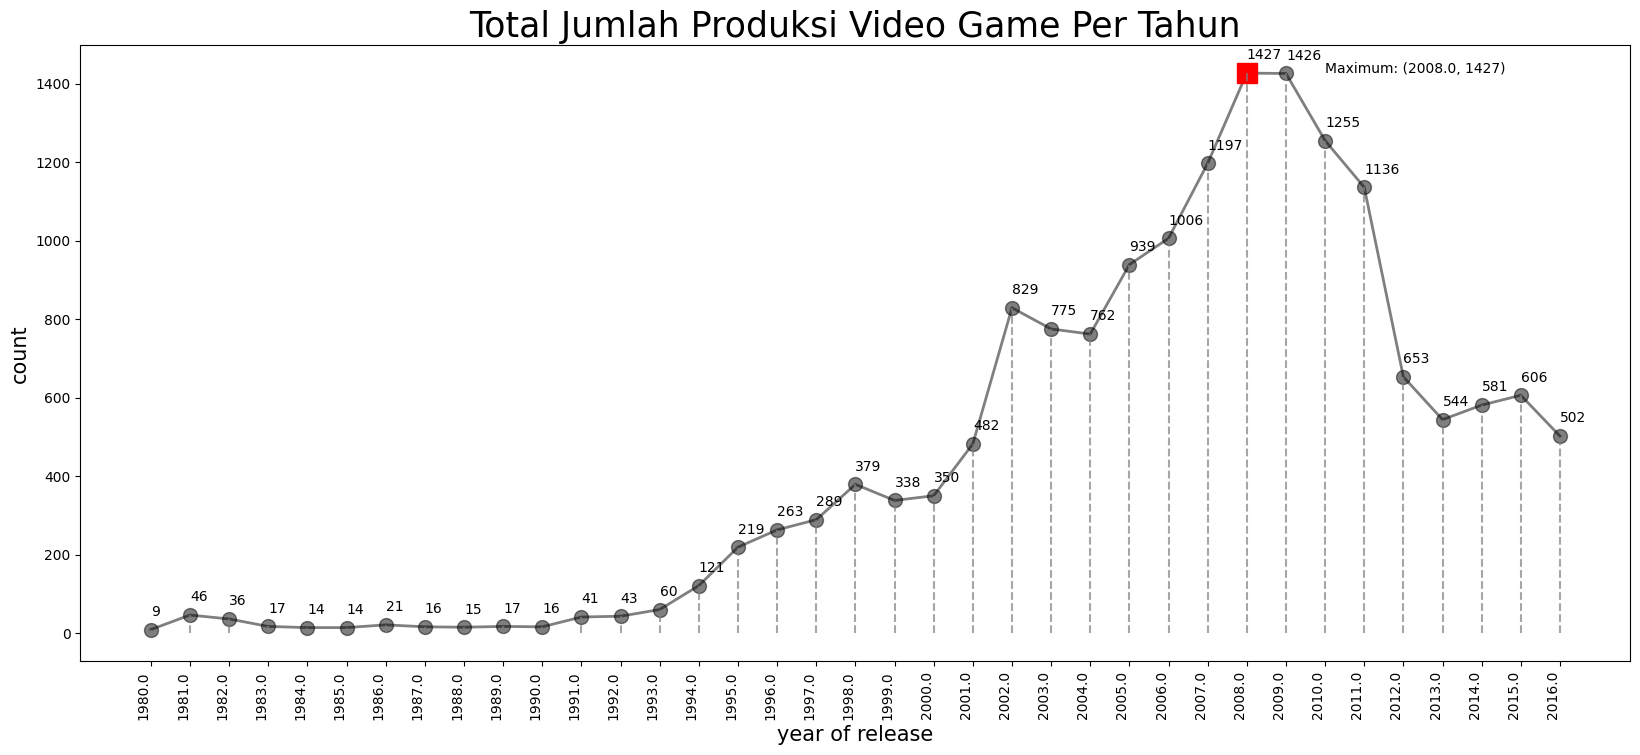

In [81]:
plot_linechart(game_count, 'year of release', 'count', 'Total Jumlah Produksi Video Game Per Tahun', 'count')

**Kesimpulan**

Pengembangan inovasi teknologi dan digital semenjak era 80an turut menjadi faktor pendorong utama meningkatnya produksi video game hingga puncaknya terjadi di awal abad ke-21. Pada awal 1980-an, teknologi video masih terbatas dan mahal, namun seiring berjalannya waktu teknologi semakin canggih dan terjangkau sehingga memungkinkan produsen video untuk memproduksi video dengan biaya yang lebih murah. Namun penurunan tingkat produksi terjadi begitu cepat setelah tahun 2008, yang kami yakin salah satunya disebabkan karena perubahan selera konsumen yang saat ini lebih tertarik kepada alternatif hiburan lain seperti streaming video, social media dan platform mobile games.

## **3.2. Total Nilai Penjualan Video Game Per Platform**

Kami akan mempelajari bagaimana tren penjualan bervariasi dari satu platform ke platform lainnya. Selanjutnya kami akan memilih platform dengan nilai total penjualan terbesar lalu mengamati pola distribusinya berdasarkan data per tahun. Dari situ kami akan berfokus mengamati platform yang dahulu sempat populer tetapi sekarang tidak memiliki penjualan apa pun. Tujuannya adalah untuk memahami berapa lama masa hidup atau secara umum dipahami sebagai waktu yang dibutuhkan oleh suatu platform untuk muncul hingga memudar popularitasnya

In [82]:
# menghitung rata-rata penjualan dari seluruh platform
sales_data = data.groupby(['platform'])['total_sales'].sum().sort_values(ascending=False).reset_index()
print('Nilai rata-rata penjualan video game untuk seluruh platform sebesar : $',int(sales_data['total_sales'].mean()), 'juta')

Nilai rata-rata penjualan video game untuk seluruh platform sebesar : $ 287 juta


In [83]:
def plot_sales_by_platform(df, x_col, y_col, title):
    sales_data = df.groupby([x_col])[y_col].sum().sort_values(ascending=False).reset_index()
    fig, ax = plt.subplots(figsize=(15, 8))
    ax.set_title(title, fontdict={'size': 20})
    ax.set_xlabel("Total Sales", fontsize=15)
    ax.set_ylabel("Platform", fontsize=15)
    sns.barplot(x=y_col, y=x_col, data=sales_data, ax=ax, color='b')
    mean_sales = sales_data[y_col].median()
    ax.axvline(x=mean_sales, linestyle='--', color='r', label=f'Rata-Rata Penjualan ({mean_sales:,.0f})')
    for i, row in sales_data.iterrows():
        ax.annotate(f"{row[y_col]:,.0f}", xy=(row[y_col], i), ha='left', va='center', fontsize=10)
    ax.legend()
    plt.show()

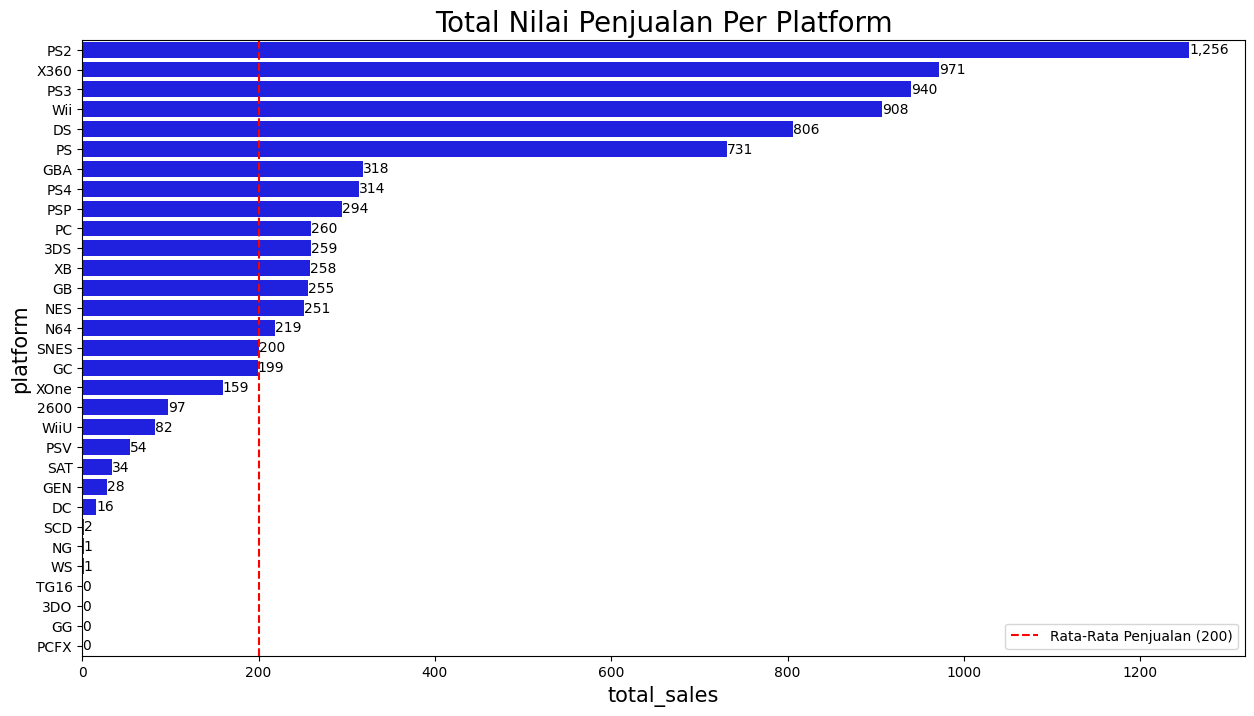

In [84]:
plot_sales_by_platform(data, 'platform', 'total_sales', 'Total Nilai Penjualan Per Platform')

In [85]:
def plot_platform_sales(df):
    # Group berdasarkan platform dan hitung jumlah total game dan penjualan
    platform_df = df.groupby('platform').agg({'name': 'count', 'total_sales': 'sum'})
    platform_df = platform_df.sort_values('total_sales', ascending=False)

    # Set up figure dan axis
    fig, ax1 = plt.subplots(figsize=(20, 10))
    ax2 = ax1.twinx()

    # Buat bar untuk jumlah game
    ax1.barh(np.arange(len(platform_df)), platform_df['name'], color='tab:blue', alpha=0.7, label='Number of Games')
    ax1.set_yticks(np.arange(len(platform_df)))
    ax1.set_yticklabels(platform_df.index)
    ax1.set_xlabel('Number of Games')

    # Tambahkan anotasi untuk jumlah game
    for i, v in enumerate(platform_df['name']):
        ax1.text(v + 10, i, str(v), color='black', fontweight='bold')

    # Buat bar untuk total penjualan
    ax2.barh(np.arange(len(platform_df)), platform_df['total_sales'], color='tab:orange', alpha=0.7, label='Total Sales')
    ax2.set_yticks(np.arange(len(platform_df)))
    ax2.set_yticklabels(platform_df.index)
    ax2.set_xlabel('Total Sales (in millions)')

    # Tambahkan anotasi untuk total penjualan
    for i, v in enumerate(platform_df['total_sales']):
        ax2.text(v + 5, i, str(round(v, 2)), color='black', fontweight='bold')

    # Set up legend
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines1 + lines2, labels1 + labels2, loc='lower right')

    # Set the title and show the plot
    plt.title('Jumlah Total Produksi VS Total Penjualan Video Games per Platform')
    plt.show()

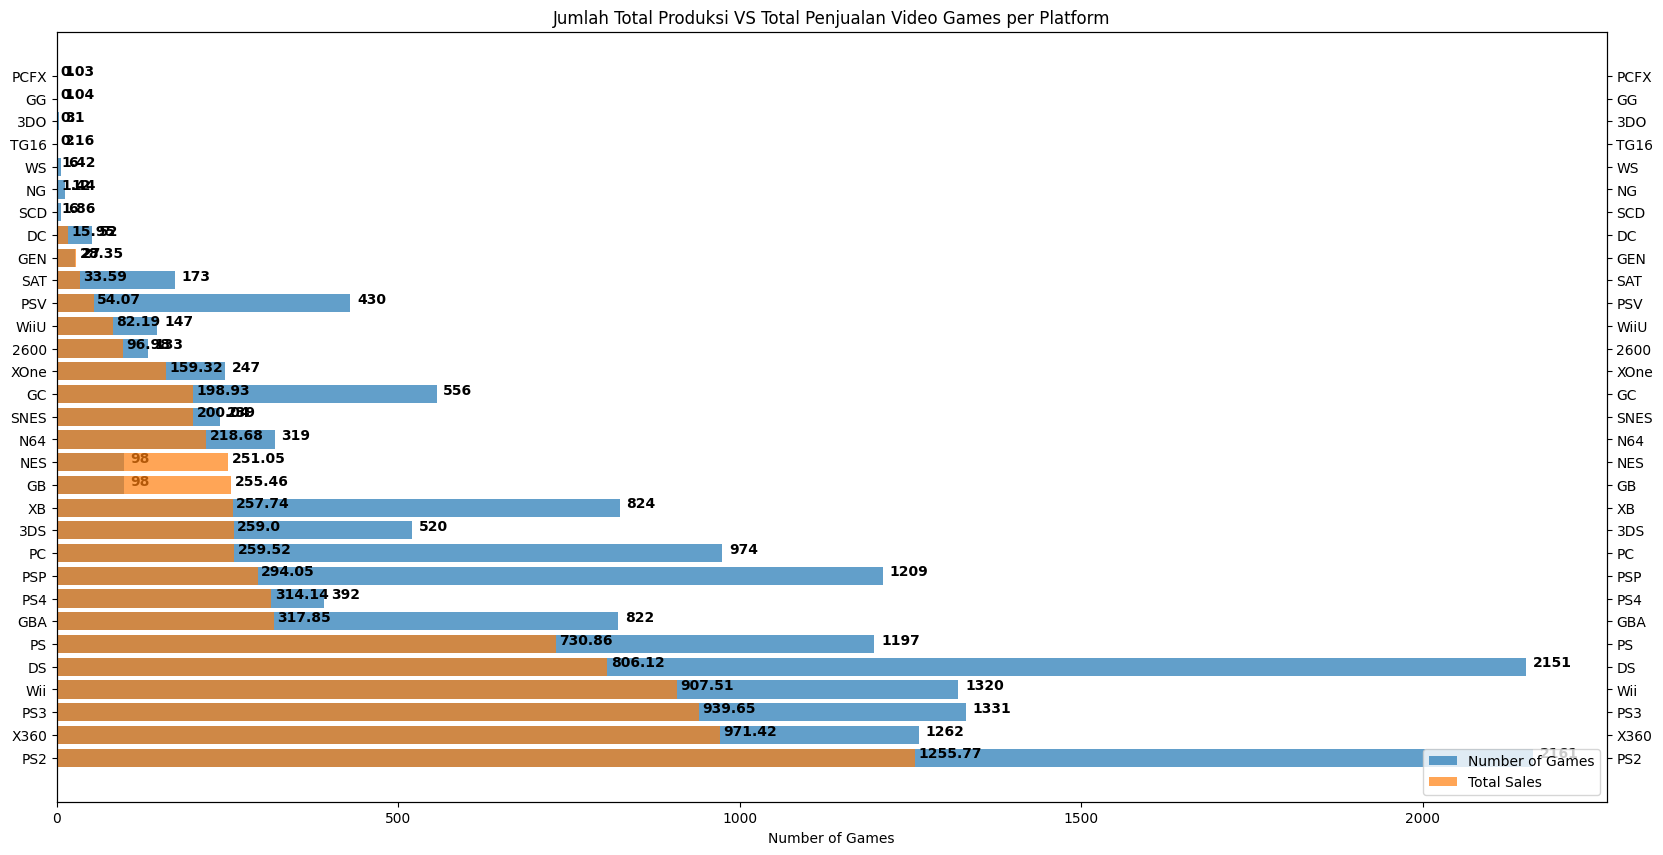

In [86]:
plot_platform_sales(data)

**Kesimpulan**

Total penjualan dan sekaligus kuantitas penjualan yang tertinggi adalah untuk platfom PS2. Kedua variabel ini menjadi penting untuk kami identifikasi sehubungan dengan fakta yang menunjukkan bahwa tidak selalu kuantitas penjualan yang tinggi berkaitan langsung dengan total penjualan yang juga ikut tinggi. Platform DS memiliki jumlah angka penjualan yang sangat tinggi, namun alih-alih menempati posisi ke-2 sebagai platform dengan total penjualan tertinggi, platform ini ternyata menempati urutan ke-5, cukup signifikan perbedaannya apabila dibandingkan dengan X360 yang hanya mampu terjual kurang dari setengah dari angka penjualan DS. **Berikut kami rangkum top 5 platform-platform yang potensial dari segi total penjualan :**
1. **PlayStation 2**
2. **Xbox 360**
3. **PlayStation 3**
4. **Nintendo Wii**
5. **Nintendo DS**

Selanjutnya kami akan mempelajari bagaimana karakteristik penjualan untuk setiap platform per tahun. Data kami menunjukkan bahwa untuk sejumlah platform video game dirilis pada periode tahun yang berbeda-beda, sehingga dari situ kami dapat memperoleh perspektif baru perihal siklus hidup dari masing-masing platform tersebut. Hal ini akan berguna ketika kami merekomendasikan kepada manajemen terkait platform-platform yang ternyata juga potensial dari aspek masa hidupnya.

## **3.3. Distribusi Masa Hidup Per Platform**

Masing-masing platform tetap terpengaruh oleh *product life cycle* sebagai suatu proses alami yang terjadi kepada suatu perusahaan. Kami akan mempelajari siklus hidup untuk masing-masing platform mulai dari semenjak platform tersebut dirilis, menuju ke titik puncak penjualan hingga akhirnya berangsur-angsur masuk ke era *decline*. Sebelum itu kami akan menunjukkan pola distribusi untuk seluruh platform secara komprehensif.

In [87]:
# Menghitung total penjualan untuk setiap platform
df1 = data.groupby('platform')['total_sales'].agg('sum').reset_index()
df1.columns = ['platform', 'total_sales']

# Identifikasi tahun rilis awal dan tahun akhir penjualan untuk setiap platform
df2 = data.groupby('platform')['year_of_release'].agg(['min', 'max']).reset_index()
df2.columns = ['platform', 'tahun_rilis_awal', 'tahun_akhir_penjualan']

# munculkan dataframe baru platform_df dari dataframe gabungan antara df1 dan df2
platform_df = pd.merge(df2, df1, on='platform')
platform_df.head()

,platform,tahun_rilis_awal,tahun_akhir_penjualan,total_sales
0,2600,1980.0,1989.0,96.98
1,3DO,1994.0,1995.0,0.10
2,3DS,2011.0,2016.0,259.00
3,DC,1998.0,2008.0,15.95
4,DS,1985.0,2013.0,806.12


In [88]:
# Fungsi untuk memunculkan pola distribusi untuk seluruh platform
def platform_sales_per_year(df):
    """
    Menghitung total_sales untuk masing-masing platform per tahun
    dan menampilkan barchart satu per satu.
    """

    # Mengelompokkan data berdasarkan tahun dan platform
    grouped_df = df.groupby(['year_of_release', 'platform'])['total_sales'].sum()

    # Membuat daftar unik tahun dan platform
    years = df['year_of_release'].unique()
    platforms = df['platform'].unique()

    # Menampilkan barchart untuk setiap platform
    for platform in platforms:
        plt.figure(figsize=(15, 5))
        plt.title(f'Total Penjualan Per Tahun Untuk Platform {platform}')
        for year in years:
            # Jika platform tidak tersedia pada tahun tertentu, lanjutkan ke tahun berikutnya
            if platform not in grouped_df[year].index:
                continue
            sales = grouped_df[year][platform]
            plt.bar(year, sales)
            plt.annotate(f'{sales:.2f}', xy=(year, sales), ha='center', va='bottom')
        plt.xlabel('Year')
        plt.ylabel('Total Sales')
        plt.show()

KeyError: nan

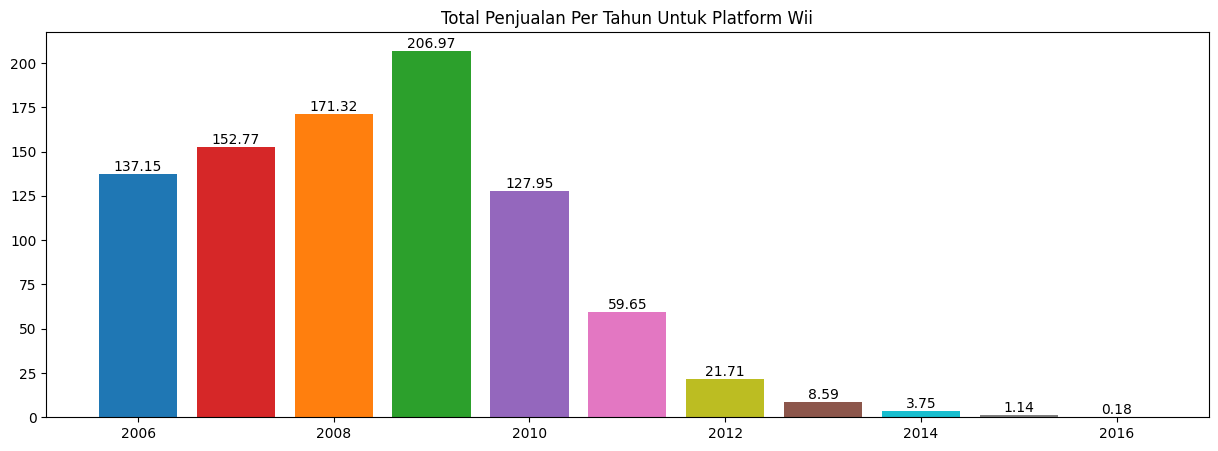

In [89]:
# Memunculkan pola distribusi untuk seluruh platform
platform_sales_per_year(data)

In [ ]:
# identifikasi rentang waktu masa hidup setiap platform
platform_range_year = data.pivot_table(values='year_of_release', index='platform', aggfunc=['min','max'])

# membuat fungsi untuk mengembalikan DataFrame yang diubah urutannya dengan kolom terakhir dipindahkan ke posisi paling awal
def range_platform(df):
    col_name = df.iloc[:,-1].name # mengambil nilai dari nama kolom terakhir di DataFrame df
    cols = df.columns
    cols = cols.insert(0,col_name)
    return df.reindex(columns=cols).iloc[:,:-1]

# identifikasi setiap tahun rilis untuk seluruh platform
year_platform = range_platform(data[['year_of_release', 'platform']]).sort_values('year_of_release',ascending=False).drop_duplicates()

fig, ax1 = plt.subplots(figsize=(20, 10))

# Menambahkan garis yang menunjukkan pemisahan antara setiap dekade
plt.axvline(1980, 0,1, c='black', alpha=0.4), plt.axvline(1990, 0,1, c='black', alpha=0.4)
plt.axvline(2000, 0,1, c='black', alpha=0.4), plt.axvline(2010, 0,1, c='black', alpha=0.4)

# Plotting tahun aktif setiap platform
ax = sns.scatterplot(data=year_platform, y='platform', x='year_of_release', palette='tab10',\
                      hue='platform', sizes='platform',\
                      markers=True, s = 175, legend=False)

ax2 = sns.lineplot(data=year_platform, y='platform', x='year_of_release', palette='tab10',\
                  hue='platform', sizes='platform',\
                  markers=True, linewidth = 5, legend=False)

ax.set_title('Distribusi Tahun Penjualan Untuk Setiap Platform', fontsize=20, pad=25)
ax.set_xlabel('Year of Release', fontsize=16)
ax.set_ylabel('Platform', fontsize=16)

In [90]:
# tambahkan kolom masa_hidup kedalam dataframe platform_df
platform_df['masa_hidup'] = platform_df['tahun_akhir_penjualan'] - platform_df['tahun_rilis_awal'] + 1
platform_df.sort_values('masa_hidup', ascending=False).head()

,platform,tahun_rilis_awal,tahun_akhir_penjualan,total_sales,masa_hidup
13,PC,1985.0,2016.0,259.52,32.0
4,DS,1985.0,2013.0,806.12,29.0
5,GB,1988.0,2001.0,255.46,14.0
28,X360,2005.0,2016.0,971.42,12.0
19,PSP,2004.0,2015.0,294.05,12.0


**Kesimpulan**

Sekilas kami menemukan sejumlah platform yang memiliki rentang masa hidup cukup panjang, misalnya seperti platform PC, Atari 2600, Nintendo DS, Game Boy dan PlayStation1 (PS) yang muncul di awal dekade 80s dan 90s namun masih cukup eksis penggunaannya hingga awal dekade 2000. Sebelum merekomendasikan kepada manajemen, kami masih ingin mendalami analisa kami dengan mengacu pada grafik *Distribusi Tahun Penjualan Untuk Setiap Platform*. Kami dengan cepat menyadari bahwa untuk setiap platform *'lintas zaman'* tersebut ternyata memiliki jeda tahun aktif penggunaan yang cukup panjang, misalnya untuk platform Nintendo DS yang dengan rentang masa hidup 29 tahun ternyata hanya aktif digunakan selama 11 tahun, bahkan platform ini sempat tidak memiliki penjualan di tahun ke-2 setelah perilisan. Dan selebihnya hal ini juga nampak sering terjadi untuk platform-platform lain yang sebagian besarnya rilis di era sebelum dekade 2000s. Secara singkat kami dapat mengatakan bahwa apa yang kami pahami sebagai platform potensial ternyata tidak cukup apabila hanya diukur dari total nilai penjualan dan rentang masa hidup saja.

**Kami akan melanjutkan analisa kami dengan membandingkan masa hidup platform dengan tahun aktif platform tersebut, dan membuat rekomendasi.**

## **3.4. Masa Hidup VS Tahun Aktif**

Mengamati grafik **Distribusi Tahun Penjualan Untuk Setiap Platform** kami telah memperoleh perspektif baru, bahwa tidak ada kaitannya antara masa hidup yang panjang dari suatu platform terhadap tahun-tahun aktif ketika platform tersebut banyak digunakan oleh para penikmat video game. Bahkan sejumlah platform yang cukup populer ternyata sempat mengalami penjualan yang sangat sedikit atau bahkan tidak ada penjualan sama sekali untuk suatu periode didalam rentang masa hidupnya. Untuk itu kami akan membandingkan masa hidup dan tahun aktif dari masing-masing platform agar dapat menilai platform mana yang sesuai esensinya merupakan platform-platform yang potensial.

In [91]:
data_game = data.copy()

In [92]:
data_game

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,68,7.0,E,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,68,7.0,E,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,62,5.4,E,0.01
16709,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,61,5.4,E,0.01
16710,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,68,6.6,E,0.01
16711,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,61,6.6,E,0.01


In [93]:
# munculkan total sales dari setiap platform untuk setiap periode tercatat
param = {'total_sales':'sum'}

platform_data = data_game.pivot_table(index=['platform', 'year_of_release'],\
                                 values='total_sales',
                                aggfunc=param).reset_index()
platform_data.head()

,platform,year_of_release,total_sales
0,2600,1980.0,11.38
1,2600,1981.0,35.68
2,2600,1982.0,28.88
3,2600,1983.0,5.84
4,2600,1984.0,0.27


In [94]:
range_tahun_masa_hidup = data_game.groupby('platform')['year_of_release'].agg(['min', 'max']).reset_index()
range_tahun_masa_hidup.columns = ['platform', 'min', 'max']
range_tahun_masa_hidup = range_tahun_masa_hidup.rename(columns={'min': 'tahun_rilis_awal', 'max': 'tahun_akhir_penjualan'})
range_tahun_masa_hidup.head()

,platform,tahun_rilis_awal,tahun_akhir_penjualan
0,2600,1980.0,1989.0
1,3DO,1994.0,1995.0
2,3DS,2011.0,2016.0
3,DC,1998.0,2008.0
4,DS,1985.0,2013.0


In [95]:
# tambahkan kolom masa_hidup kedalam dataframe range_tahun_masa_hidup
range_tahun_masa_hidup['masa_hidup'] = range_tahun_masa_hidup['tahun_akhir_penjualan'] - range_tahun_masa_hidup['tahun_rilis_awal'] + 1
range_tahun_masa_hidup.head()

,platform,tahun_rilis_awal,tahun_akhir_penjualan,masa_hidup
0,2600,1980.0,1989.0,10.0
1,3DO,1994.0,1995.0,2.0
2,3DS,2011.0,2016.0,6.0
3,DC,1998.0,2008.0,11.0
4,DS,1985.0,2013.0,29.0


In [96]:
# buat iterasi untuk menghitung hanya tahun ketika suatu platfom menghasilkan penjualan
tahun_aktif = {}
for p in platform_data['platform']:
    tahun_aktif[p] =len(np.array(platform_data.query("platform==@p & total_sales!=0")['year_of_release']))

In [97]:
# menambahkan kolom tahun_aktif kedalam dataframe range_tahun_masa_hidup
range_tahun_masa_hidup['tahun_aktif'] = range_tahun_masa_hidup['platform'].map(tahun_aktif)
range_tahun_masa_hidup.head()

,platform,tahun_rilis_awal,tahun_akhir_penjualan,masa_hidup,tahun_aktif
0,2600,1980.0,1989.0,10.0,10
1,3DO,1994.0,1995.0,2.0,2
2,3DS,2011.0,2016.0,6.0,6
3,DC,1998.0,2008.0,11.0,7
4,DS,1985.0,2013.0,29.0,11


In [98]:
# menambahkan kolom dekade kedalam dataframe range_tahun_masa_hidup
def dekade_group(tahun_rilis_awal):
    if tahun_rilis_awal < 1990:
        return 'Dekade 80s'
    elif tahun_rilis_awal >= 1990 and tahun_rilis_awal < 2000:
        return 'Dekade 90s'
    else:
        return 'Dekade 00s'

range_tahun_masa_hidup['dekade'] = range_tahun_masa_hidup['tahun_rilis_awal'].apply(dekade_group)
range_tahun_masa_hidup.sort_values('tahun_aktif', ascending=False).head()

,platform,tahun_rilis_awal,tahun_akhir_penjualan,masa_hidup,tahun_aktif,dekade
13,PC,1985.0,2016.0,32.0,26,Dekade 80s
5,GB,1988.0,2001.0,14.0,13,Dekade 80s
11,NES,1983.0,1994.0,12.0,12,Dekade 80s
28,X360,2005.0,2016.0,12.0,12,Dekade 00s
19,PSP,2004.0,2015.0,12.0,12,Dekade 00s


In [99]:
# menggabungkan dataframe range_tahun_masa_hidup dengan dataframe platform_df
platform_df = pd.merge(range_tahun_masa_hidup[['platform', 'tahun_rilis_awal', 'tahun_akhir_penjualan', 'masa_hidup', 'tahun_aktif', 'dekade']],
                     platform_df[['platform', 'tahun_rilis_awal', 'tahun_akhir_penjualan', 'total_sales']],
                     on=['platform', 'tahun_rilis_awal', 'tahun_akhir_penjualan'],
                     how='inner')

# Cetak dataframe hasil penggabungan
platform_df.sort_values('tahun_aktif', ascending=False).head()

,platform,tahun_rilis_awal,tahun_akhir_penjualan,masa_hidup,tahun_aktif,dekade,total_sales
13,PC,1985.0,2016.0,32.0,26,Dekade 80s,259.52
5,GB,1988.0,2001.0,14.0,13,Dekade 80s,255.46
11,NES,1983.0,1994.0,12.0,12,Dekade 80s,251.05
28,X360,2005.0,2016.0,12.0,12,Dekade 00s,971.42
19,PSP,2004.0,2015.0,12.0,12,Dekade 00s,294.05


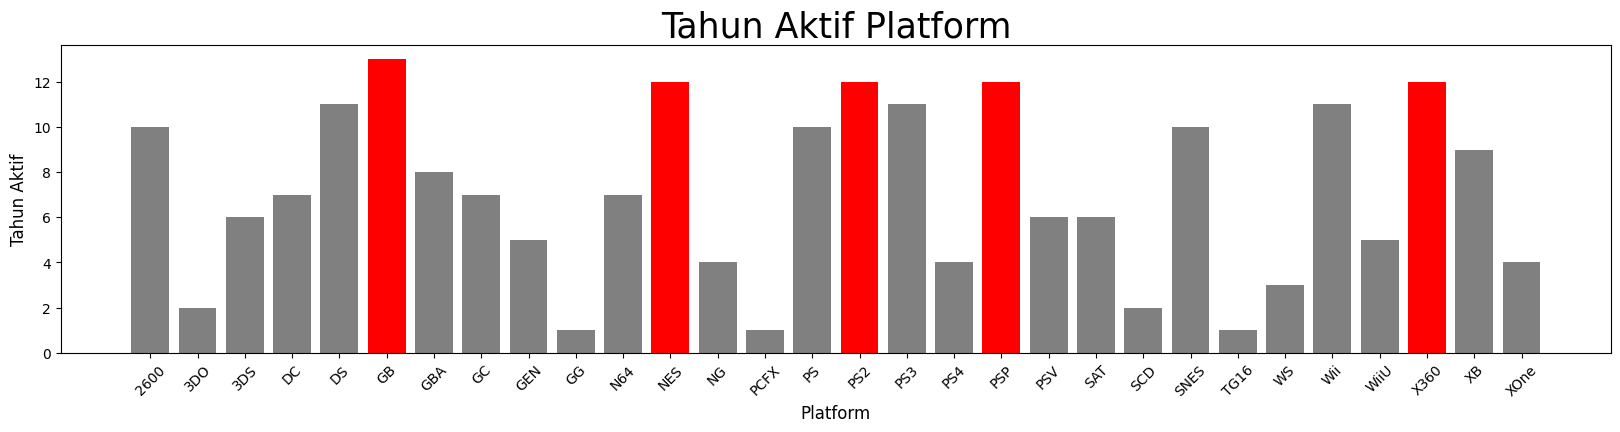

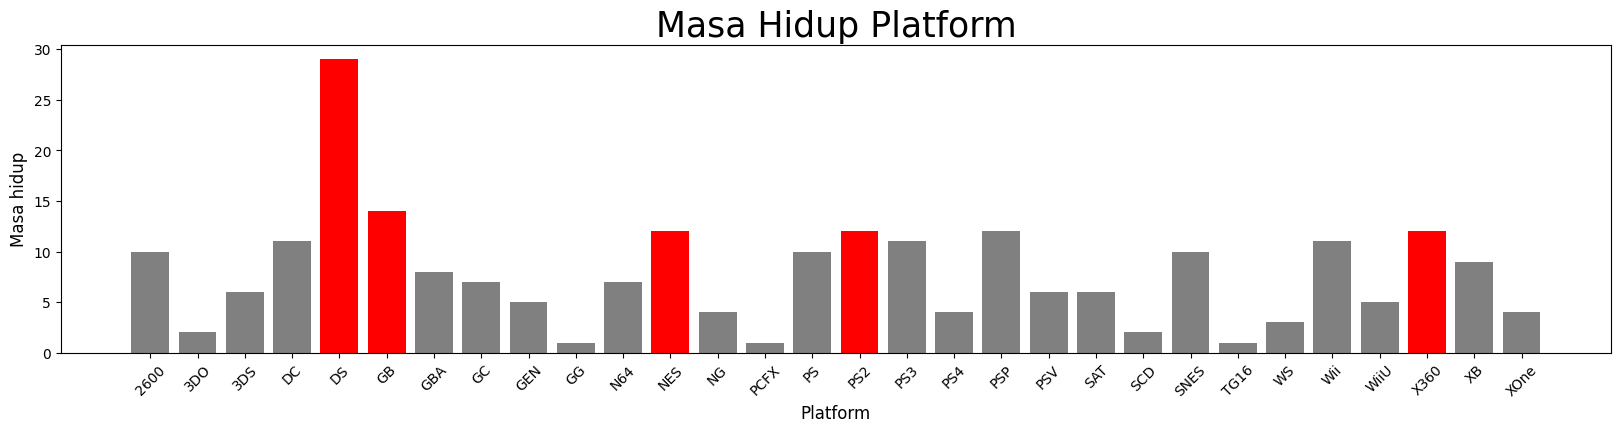

In [100]:
# Membuat grafik bar chart untuk kolom tahun_aktif tanpa platform PC
subset_df = platform_df[platform_df.platform != 'PC']

plt.figure(figsize=(20,4))
sorted_subset = subset_df.sort_values('tahun_aktif', ascending=False)
top5_tahun = sorted_subset.head(5)
plt.bar(subset_df['platform'], subset_df['tahun_aktif'], color=['grey' if p not in top5_tahun['platform'].tolist() else 'red' for p in subset_df['platform']])
plt.title('Tahun Aktif Platform', fontsize=25)
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Tahun Aktif', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Membuat grafik bar chart untuk kolom masa_hidup tanpa platform PC
plt.figure(figsize=(20,4))
sorted_subset = subset_df.sort_values('masa_hidup', ascending=False)
top5_sales = sorted_subset.head(5)
plt.bar(subset_df['platform'], subset_df['masa_hidup'], color=['grey' if p not in top5_sales['platform'].tolist() else 'red' for p in subset_df['platform']])
plt.title('Masa Hidup Platform', fontsize=25)
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Masa hidup', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

**Kesimpulan**

Kami terlebih dahulu menghilangkan platform PC dari analisa, dikarenakan meskipun total tahun aktifnya teridentifikasi paling tinggi, namun kami mempertimbangkan bahwa platform ini bukan dispesifikasikan untuk video game. Sementara itu untuk platform Gameboy meskipun tertinggi dari segi tahun aktif dan masa hidup, namun data menunjukkan bahwa terdapat jeda selama 7 tahun ketika platform tersebut tidak aktif digunakan. Hal yang sama juga kami temukan untuk platform Atari 2600 dan Nintedo DS.

Untuk mempermudah proses analisa, kami akan menambahkan kolom baru yang memuat baris nilai berupa rasio tahun aktif terhadap masa hidup untuk setiap platform.

In [101]:
# menambahkan kolom baru rasio tahun aktif terhadap masa hidup
platform_df['rasio_tahun_aktif'] = round(platform_df['tahun_aktif'] / platform_df['masa_hidup'], 1)
platform_df.head()

,platform,tahun_rilis_awal,tahun_akhir_penjualan,masa_hidup,tahun_aktif,dekade,total_sales,rasio_tahun_aktif
0,2600,1980.0,1989.0,10.0,10,Dekade 80s,96.98,1.0
1,3DO,1994.0,1995.0,2.0,2,Dekade 90s,0.10,1.0
2,3DS,2011.0,2016.0,6.0,6,Dekade 00s,259.00,1.0
3,DC,1998.0,2008.0,11.0,7,Dekade 90s,15.95,0.6
4,DS,1985.0,2013.0,29.0,11,Dekade 80s,806.12,0.4


In [102]:
# identifikasi platform dengan rasio tahun aktif 100%
df_aktif_100 = platform_df[platform_df ['rasio_tahun_aktif'] == 1]
df_aktif_100.sort_values('total_sales', ascending=False).head()

,platform,tahun_rilis_awal,tahun_akhir_penjualan,masa_hidup,tahun_aktif,dekade,total_sales,rasio_tahun_aktif
16,PS2,2000.0,2011.0,12.0,12,Dekade 00s,1255.77,1.0
28,X360,2005.0,2016.0,12.0,12,Dekade 00s,971.42,1.0
17,PS3,2006.0,2016.0,11.0,11,Dekade 00s,939.65,1.0
26,Wii,2006.0,2016.0,11.0,11,Dekade 00s,907.51,1.0
15,PS,1994.0,2003.0,10.0,10,Dekade 90s,730.86,1.0


**Kesimpulan**

Kami mengidentifikasi sejumlah platform video game yang memiliki rasio tahun aktif terhadap masa hidup dengan nilai 1. Hal ini menunjukkan bahwa platform-platform tersebut 100% aktif digunakan atau tanpa adanya jeda penjualan di sepanjang masa hidupnya. Artinya fakta yang kami temukan untuk menggambarkan tingkat kesuksesan dari sejumlah platform video game sudah cukup baik dan sesuai dengan yang kami harapkan sejak awal. Namun tentu saja, secara spesifik manajemen membutuhkan tidak hanya sekedar angka rasio, namun bagaimana distribusi penjualan dari platform-platform tersebut mampu bertahan dalam jangka panjang, atau setidaknya masih menghasilkan penjualan hingga akhir periode 2016. Asumsi ini diperlukan sehingga kami dapat membantu manajemen dalam membangun model untuk mengestimasi penjualan di tahun 2017.

Untuk memenuhi karakteristik tersebut, maka kami akan memfilter data kami yang terakhir hanya untuk sejumlah platform yang berhasil mencapai penjualan jangka panjang.

In [103]:
# identifikasi platform dengan penjualan jangka panjang
df_potensial = platform_df[(platform_df ['rasio_tahun_aktif'] > 0.5) & (platform_df ['tahun_akhir_penjualan'] == 2016) & (platform_df ['platform'] != 'PC')]
df_potensial.sort_values('total_sales', ascending=False)

,platform,tahun_rilis_awal,tahun_akhir_penjualan,masa_hidup,tahun_aktif,dekade,total_sales,rasio_tahun_aktif
28,X360,2005.0,2016.0,12.0,12,Dekade 00s,971.42,1.0
17,PS3,2006.0,2016.0,11.0,11,Dekade 00s,939.65,1.0
26,Wii,2006.0,2016.0,11.0,11,Dekade 00s,907.51,1.0
18,PS4,2013.0,2016.0,4.0,4,Dekade 00s,314.14,1.0
2,3DS,2011.0,2016.0,6.0,6,Dekade 00s,259.00,1.0
30,XOne,2013.0,2016.0,4.0,4,Dekade 00s,159.32,1.0
27,WiiU,2012.0,2016.0,5.0,5,Dekade 00s,82.19,1.0
20,PSV,2011.0,2016.0,6.0,6,Dekade 00s,54.07,1.0


**Kesimpulan**

Jadi meskipun kami melihat bahwa seluruh platform yang potensial berdasarkan kriteria ini sepenuhnya berasal dari dekade 00s, namun kami juga harus mengeluarkan PlayStation2 dari kelompok potensial dikarenakan tidak mampu mempertahankan penjualan dalam jangka panjang, sekalipun platform ini memiliki total penjualan tertinggi. Lalu kami menambahkan PlayStation4 dan Xbox360 yang ternyata juga cukup potensial untuk ukuran platform video game rilisan terbaru.

Berikut dapat kami rekomendasikan kepada manajemen terkait platform-platform video game yang potensial berdasarkan aspek kriteria penjualan jangka panjang dengan mempertimbangkan standar rasio tahun aktif :
1. **X360**
2. **PS3**
3. **Wii**
4. **PS4**
5. **3DS**
6. **XOne**
7. **WiiU**
8. **PSV**

## **3.5. Depresiasi Penjualan Untuk Setiap Platform**

Pada bagian ini kami akan mendalami sejauh mana sesungguhnya masing-masing platform telah memudar popularitasnya yang ditandai dengan menurunnya penjualan secara berkala. Kami akan menambahkan kolom baru untuk mengidentifikasi **jumlah tahun yang dibutuhkan oleh suatu platform untuk mencapai penjualan tertingginya (tahun_menuju_puncak)** dan pula sebaliknya **jumlah tahun ketika penjualan terdepresiasi hingga level terendah (tahun_depresiasi)**.

In [104]:
# menambahkan kolom baru tahun_sales_tertinggi ke datarame platform_data
def tahun_puncak (df):
    tahun_puncak = {} # membuat sebuah dictionary yang menyimpan informasi tahun-tahun puncak penjualan dari setiap platform yang ada di dataframe df
    for unique_year in df['platform'].unique():
        penjualan_tertinggi = df.query('platform==@unique_year').sort_values('total_sales', ascending=False).iloc[0,1]
        tahun_puncak[unique_year] = penjualan_tertinggi
    return df['platform'].map(tahun_puncak)

platform_data['tahun_sales_tertinggi'] = tahun_puncak(platform_data)
platform_data.head()

,platform,year_of_release,total_sales,tahun_sales_tertinggi
0,2600,1980.0,11.38,1981.0
1,2600,1981.0,35.68,1981.0
2,2600,1982.0,28.88,1981.0
3,2600,1983.0,5.84,1981.0
4,2600,1984.0,0.27,1981.0


In [105]:
# merge dataframe sales_max_per_year dan platform_df
sales_max_year = platform_data[['platform', 'tahun_sales_tertinggi']].pivot_table(values='tahun_sales_tertinggi', index='platform').reset_index()
platform_df = sales_max_year.merge(platform_df, on='platform', how='right')

# menambahkan 2 kolom baru untuk mengidentifikasi jumlah tahun hingga sales tertinggi dan jumlah tahun sales terdepresiasi
platform_df['tahun_menuju_puncak'] = platform_df['tahun_sales_tertinggi'] - platform_df['tahun_rilis_awal'] + 1
platform_df['tahun_depresiasi'] = platform_df['tahun_akhir_penjualan'] - platform_df['tahun_sales_tertinggi']
platform_df.head()

,platform,tahun_sales_tertinggi,tahun_rilis_awal,tahun_akhir_penjualan,masa_hidup,tahun_aktif,dekade,total_sales,rasio_tahun_aktif,tahun_menuju_puncak,tahun_depresiasi
0,2600,1981.0,1980.0,1989.0,10.0,10,Dekade 80s,96.98,1.0,2.0,8.0
1,3DO,1995.0,1994.0,1995.0,2.0,2,Dekade 90s,0.10,1.0,2.0,0.0
2,3DS,2011.0,2011.0,2016.0,6.0,6,Dekade 00s,259.00,1.0,1.0,5.0
3,DC,2000.0,1998.0,2008.0,11.0,7,Dekade 90s,15.95,0.6,3.0,8.0
4,DS,2007.0,1985.0,2013.0,29.0,11,Dekade 80s,806.12,0.4,23.0,6.0


In [106]:
# membuat fungsi untuk menambahkan kolom yang berisi list tahun ketika total penjualan menurun
def add_years_sales_drop(df):
    # Create an empty dictionary to store the results for each platform
    years_sales_drop = {}

    # Iterate through each platform in the dataset
    for platform in df['platform'].unique():
        # Get the rows for the current platform
        platform_rows = df[df['platform'] == platform]

        # Get the highest year of sales for the current platform
        max_year_sales = platform_rows['tahun_sales_tertinggi'].iloc[0]

        # Find the rows where the year is after the highest year of sales
        after_max_year_sales = platform_rows[platform_rows['year_of_release'] >= max_year_sales]

        # Find the years where sales decreased compared to the previous year
        sales_drop_years = []
        prev_sales = None
        for _, row in after_max_year_sales.iterrows():
            if prev_sales is not None and row['total_sales'] <= prev_sales:
                sales_drop_years.append(row['year_of_release'])
            prev_sales = row['total_sales']

        # Add the results to the dictionary
        years_sales_drop[platform] = sales_drop_years

    # Create a new column with the results
    df['years_sales_drop'] = df['platform'].map(years_sales_drop)

    return df

In [107]:
# menambahkan kolom baru yang berisi list tahun ketika total penjualan menurun ke dataframe platform_data
output = add_years_sales_drop(platform_data)
output.head()

,platform,year_of_release,total_sales,tahun_sales_tertinggi,years_sales_drop
0,2600,1980.0,11.38,1981.0,"[1982.0, 1983.0, 1984.0, 1988.0, 1989.0]"
1,2600,1981.0,35.68,1981.0,"[1982.0, 1983.0, 1984.0, 1988.0, 1989.0]"
2,2600,1982.0,28.88,1981.0,"[1982.0, 1983.0, 1984.0, 1988.0, 1989.0]"
3,2600,1983.0,5.84,1981.0,"[1982.0, 1983.0, 1984.0, 1988.0, 1989.0]"
4,2600,1984.0,0.27,1981.0,"[1982.0, 1983.0, 1984.0, 1988.0, 1989.0]"


In [108]:
# menghapus kolom year_of_release, total_sales, dan tahun_sales_tertinggi
dff = output.drop(["year_of_release", "total_sales", "tahun_sales_tertinggi"], axis=1)
dff.head()

,platform,years_sales_drop
0,2600,"[1982.0, 1983.0, 1984.0, 1988.0, 1989.0]"
1,2600,"[1982.0, 1983.0, 1984.0, 1988.0, 1989.0]"
2,2600,"[1982.0, 1983.0, 1984.0, 1988.0, 1989.0]"
3,2600,"[1982.0, 1983.0, 1984.0, 1988.0, 1989.0]"
4,2600,"[1982.0, 1983.0, 1984.0, 1988.0, 1989.0]"


In [109]:
# tambahkan kolom years_sales_drop kedalam dataset platform_df menggunakan metode merge
output = output.drop(['year_of_release', 'total_sales', 'tahun_sales_tertinggi'], axis=1)
pivot_df = output.pivot_table(index='platform',
                          values='years_sales_drop',
                          aggfunc=lambda x: sorted(list(set(y for x in x for y in x)))).reset_index()
platform_df = pivot_df.merge(platform_df, on='platform', how='right')
platform_df.head()

,platform,years_sales_drop,tahun_sales_tertinggi,tahun_rilis_awal,tahun_akhir_penjualan,masa_hidup,tahun_aktif,dekade,total_sales,rasio_tahun_aktif,tahun_menuju_puncak,tahun_depresiasi
0,2600,"[1982.0, 1983.0, 1984.0, 1988.0, 1989.0]",1981.0,1980.0,1989.0,10.0,10,Dekade 80s,96.98,1.0,2.0,8.0
1,3DO,[],1995.0,1994.0,1995.0,2.0,2,Dekade 90s,0.10,1.0,2.0,0.0
2,3DS,"[2012.0, 2014.0, 2015.0, 2016.0]",2011.0,2011.0,2016.0,6.0,6,Dekade 00s,259.00,1.0,1.0,5.0
3,DC,"[2001.0, 2002.0, 2007.0]",2000.0,1998.0,2008.0,11.0,7,Dekade 90s,15.95,0.6,3.0,8.0
4,DS,"[2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0]",2007.0,1985.0,2013.0,29.0,11,Dekade 80s,806.12,0.4,23.0,6.0


**Kesimpulan**

Pada bagian sebelumnya kami mengidentifikasi sejumlah platform video game yang masuk kedalam kriteria potensial. Parameter yang kami gunakan untuk memenuhi kriteria tersebut antara lain dari aspek total sales, tahun akhir penjualan yang relevan, dan rasio tahun aktif terhadap masa hidup untuk masing-masing platform. Kriteria ini mencakup sejumlah nama platform, antara lain : **'X360', 'PS3', 'Wii', 'PS4', '3DS', 'XOne', 'WiiU',** dan **'PSV'**. Selanjutnya kami akan mempelajari bagaimana pola depresiasi penjualan untuk masing-masing platform potensial tersebut.

In [110]:
# Identifikasi platform-platform dalam kriteria potensial
potensial_dep = platform_df[(platform_df['platform'].isin(['X360', 'PS3', 'Wii', 'PS4', '3DS', 'XOne', 'WiiU', 'PSV']))]
potensial_dep

,platform,years_sales_drop,tahun_sales_tertinggi,tahun_rilis_awal,tahun_akhir_penjualan,masa_hidup,tahun_aktif,dekade,total_sales,rasio_tahun_aktif,tahun_menuju_puncak,tahun_depresiasi
2,3DS,"[2012.0, 2014.0, 2015.0, 2016.0]",2011.0,2011.0,2016.0,6.0,6,Dekade 00s,259.00,1.0,1.0,5.0
17,PS3,"[2012.0, 2014.0, 2015.0, 2016.0]",2011.0,2006.0,2016.0,11.0,11,Dekade 00s,939.65,1.0,6.0,5.0
18,PS4,[2016.0],2015.0,2013.0,2016.0,4.0,4,Dekade 00s,314.14,1.0,3.0,1.0
20,PSV,"[2013.0, 2015.0, 2016.0]",2012.0,2011.0,2016.0,6.0,6,Dekade 00s,54.07,1.0,2.0,4.0
26,Wii,"[2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015....",2009.0,2006.0,2016.0,11.0,11,Dekade 00s,907.51,1.0,4.0,7.0
27,WiiU,"[2015.0, 2016.0]",2014.0,2012.0,2016.0,5.0,5,Dekade 00s,82.19,1.0,3.0,2.0
28,X360,"[2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0]",2010.0,2005.0,2016.0,12.0,12,Dekade 00s,971.42,1.0,6.0,6.0
30,XOne,[2016.0],2015.0,2013.0,2016.0,4.0,4,Dekade 00s,159.32,1.0,3.0,1.0


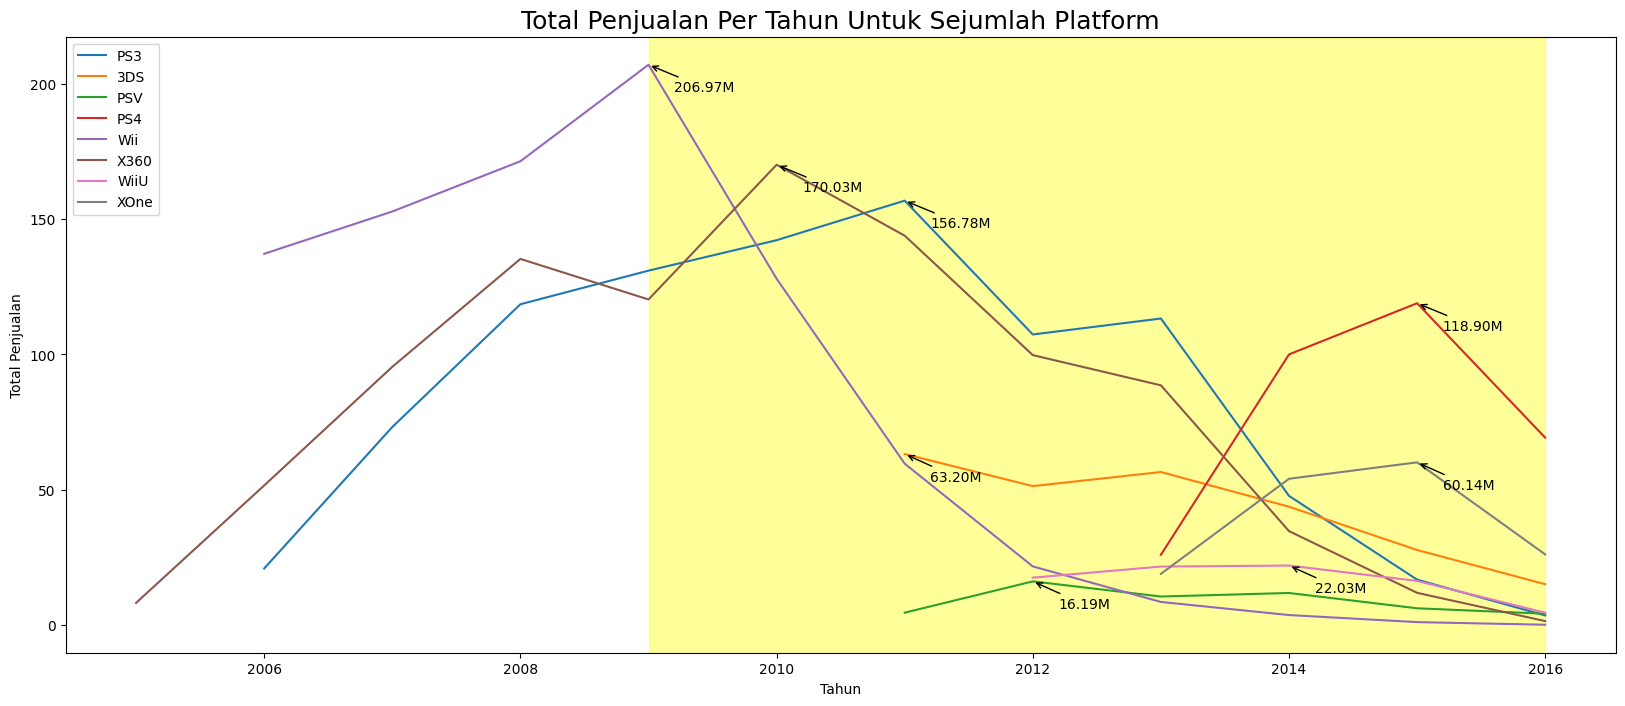

In [111]:
plt.figure(figsize=(20,8))

ps3_data = platform_data[platform_data['platform'] == 'PS3']
ps4_data = platform_data[platform_data['platform'] == 'PS4']
wii_data = platform_data[platform_data['platform'] == 'Wii']
wiiu_data = platform_data[platform_data['platform'] == 'WiiU']
x360_data = platform_data[platform_data['platform'] == 'X360']
xone_data = platform_data[platform_data['platform'] == 'XOne']
ds3_data = platform_data[platform_data['platform'] == '3DS']
psv_data = platform_data[platform_data['platform'] == 'PSV']

# plot data for PS3
plt.plot(ps3_data["year_of_release"], ps3_data["total_sales"], label="PS3")

# plot data for 3DS
plt.plot(ds3_data["year_of_release"], ds3_data["total_sales"], label="3DS")

# plot data for PSV
plt.plot(psv_data["year_of_release"], psv_data["total_sales"], label="PSV")

# plot data for PS4
plt.plot(ps4_data["year_of_release"], ps4_data["total_sales"], label="PS4")

# plot data for Wii
plt.plot(wii_data["year_of_release"], wii_data["total_sales"], label="Wii")

# plot data for X360
plt.plot(x360_data["year_of_release"], x360_data["total_sales"], label="X360")

# plot data for Wiiu
plt.plot(wiiu_data["year_of_release"], wiiu_data["total_sales"], label="WiiU")

# plot data for Xone
plt.plot(xone_data["year_of_release"], xone_data["total_sales"], label="XOne")

plt.axvspan(2009, 2016, color='yellow', alpha=0.4)
plt.title("Total Penjualan Per Tahun Untuk Sejumlah Platform", fontsize=18)
plt.xlabel("Tahun")
plt.ylabel("Total Penjualan")
plt.legend()

# add annotations
for data in [ps3_data, ps4_data, wii_data, wiiu_data, x360_data, xone_data, ds3_data, psv_data]:
    max_sales_index = data["total_sales"].argmax()
    max_sales_year = data.iloc[max_sales_index]["year_of_release"]
    max_sales = data.iloc[max_sales_index]["total_sales"]
    plt.annotate(f"{max_sales:.2f}M", xy=(max_sales_year, max_sales),
                 xytext=(max_sales_year+0.2, max_sales-10),
                 arrowprops=dict(facecolor='black', arrowstyle="->"))

# show the plot
plt.show()

**Kesimpulan**

Secara trend, tahun 2009 - 2011 agaknya menjadi periode yang menandai kejatuhan dari sejumlah platform video game yang sempat populer pada masanya semacam Nintendo Wii, Xbox360 dan PlayStation 3 yang secara kebetulan muncul pada era yang hampir bersamaan. Pola depresiasi ini bahkan cenderung terlihat begitu ekstrem secara khusus untuk platform Nintendo Wii, yang meskipun masih sempat membukukan penjualan senilai 180 ribu dolar di tahun 2016, namun kami prediksi akan segera menghilang dalam 1 hingga 2 tahun kedepan. Bahkan generasi terbaru Nintendo, yaitu Nintendo 3DS dan Nintendo WiiU yang muncul setelahnya juga terbukti gagal untuk mengulang kesuksesan Nintendo dengan penjualan tertinggi sebelumnya yang mampu menembus angka 200 juta dolar lewat konsol Nintendo Wii-nya. Sementara itu untuk platform PSV yang mencapai puncak penjualan setelah 5 tahun dirilis ternyata hanya mampu membukukan penjualan jauh dibawah 20 juta dolar, ditambah lagi PSV harus mengalami penjualan nihil selama 2 tahun setelah perilisan di tahun sebelumnya. Sejauh ini platform yang unggul jika mempertimbangkan depresiasi penjualan yang paling minimal adalah PlayStation4 dan XOne.

Kami akan melanjutkan untuk memahami seperti apa tingkat rata-rata penjualan mereka pertahun.

### **3.5.1. Tingkat Penjualan Rata-Rata Pertahun**


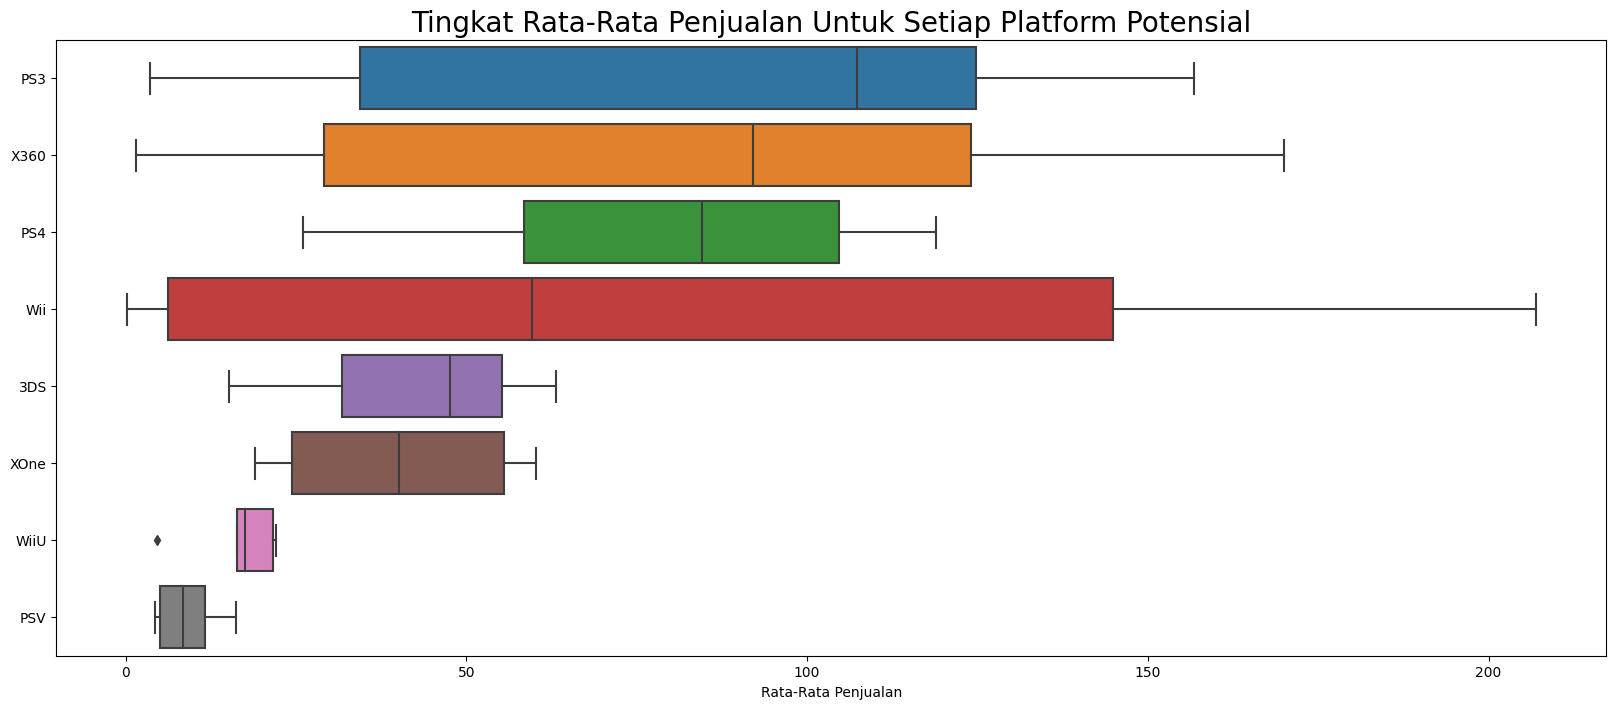

In [112]:
potensial_plat = platform_data[(platform_data['platform'].isin(['X360', 'PS3', 'Wii', 'PS4', '3DS', 'XOne', 'WiiU', 'PSV']))]

data_dict = {}
for platform in set(potensial_plat['platform']):
    data_dict[platform] = potensial_plat[potensial_plat['platform'] == platform]['total_sales']

# buat daftar platform yang diurutkan berdasarkan total penjualan
sorted_platforms = sorted(set(potensial_plat['platform']), key=lambda x: data_dict[x].median(), reverse=True)

# buat plot kotak horizontal dengan warna merah untuk 5 platform pilihan
plt.figure(figsize=(20, 8))
sns.boxplot(data=[data_dict[platform] for platform in sorted_platforms],
            orient='h')
plt.xlabel('Rata-Rata Penjualan')
plt.title('Tingkat Rata-Rata Penjualan Untuk Setiap Platform Potensial', fontsize=20)
plt.yticks(range(len(sorted_platforms)), sorted_platforms)
plt.show()

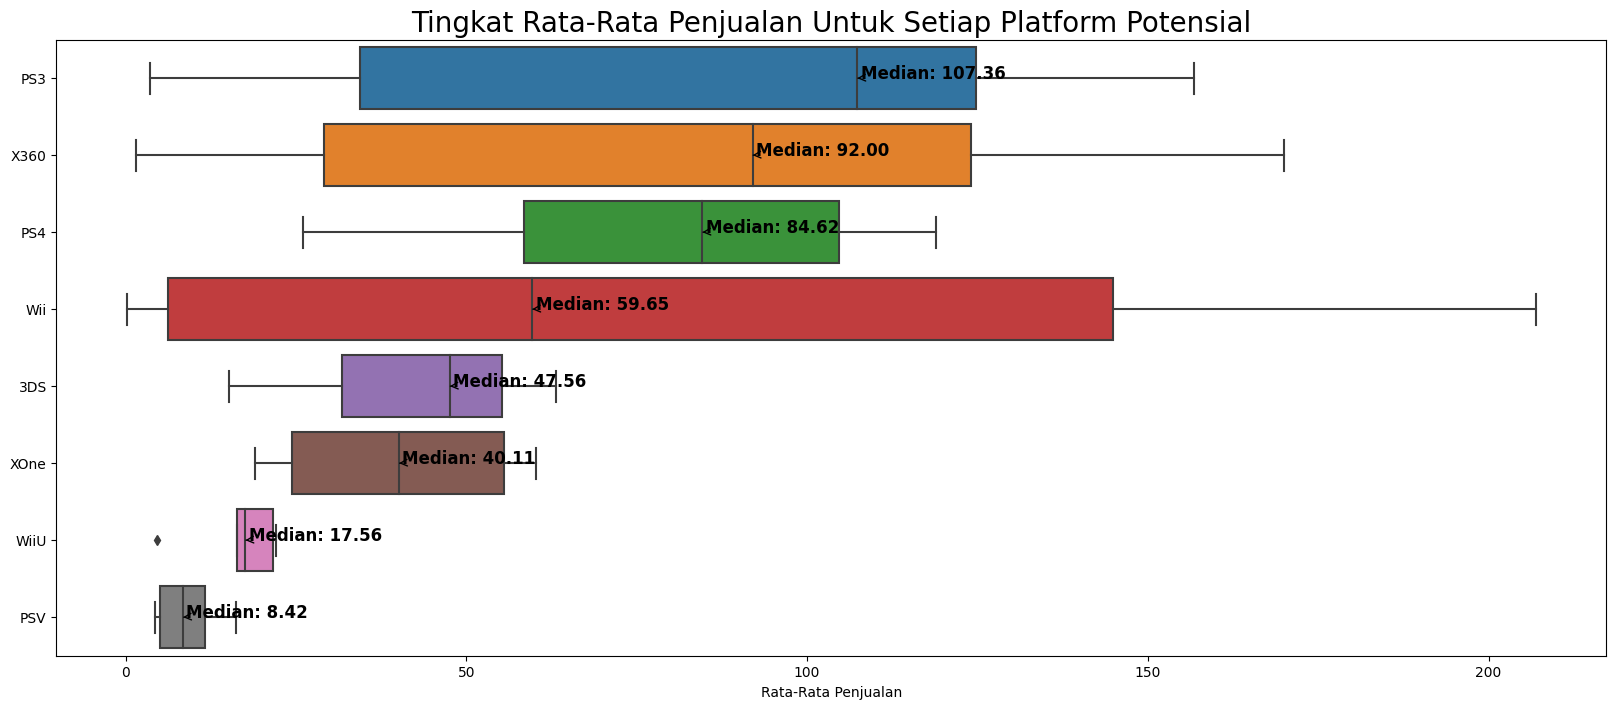

In [113]:
potensial_plat = platform_data[(platform_data['platform'].isin(['X360', 'PS3', 'Wii', 'PS4', '3DS', 'XOne', 'WiiU', 'PSV']))]

data_dict = {}
for platform in set(potensial_plat['platform']):
    data_dict[platform] = potensial_plat[potensial_plat['platform'] == platform]['total_sales']

# buat daftar platform yang diurutkan berdasarkan total penjualan
sorted_platforms = sorted(set(potensial_plat['platform']), key=lambda x: data_dict[x].median(), reverse=True)

# buat plot kotak horizontal
plt.figure(figsize=(20, 8))
sns.boxplot(data=[data_dict[platform] for platform in sorted_platforms],
            orient='h')
plt.xlabel('Rata-Rata Penjualan')
plt.title('Tingkat Rata-Rata Penjualan Untuk Setiap Platform Potensial', fontsize=20)
plt.yticks(range(len(sorted_platforms)), sorted_platforms)

# tambahkan anotasi nilai median untuk setiap boxplot
for i, platform in enumerate(sorted_platforms):
    median = data_dict[platform].median()
    plt.annotate(f'Median: {median:.2f}', xy=(median, i), xytext=(median + 0.5, i),
                 fontsize=12, color='black', fontweight='bold',
                 arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.show()

In [114]:
# identifikasi rata-rata tahun yang dibutuhkan untuk mencapai penjualan puncak
print('Rata-rata tahun yang dibutuhkan "Dekade 80s" untuk mencapai penjualan puncak :', int(platform_df[platform_df['dekade'] == 'Dekade 80s']['tahun_menuju_puncak'].mean()), 'tahun')
print('Rata-rata tahun yang dibutuhkan "Dekade 90s" untuk mencapai penjualan puncak :', int(platform_df[platform_df['dekade'] == 'Dekade 90s']['tahun_menuju_puncak'].mean()), 'tahun')
print('Rata-rata tahun yang dibutuhkan "Dekade 00s untuk mencapai penjualan puncak :', int(platform_df[platform_df['dekade'] == 'Dekade 00s']['tahun_menuju_puncak'].mean()), 'tahun')

Rata-rata tahun yang dibutuhkan "Dekade 80s" untuk mencapai penjualan puncak : 11 tahun
Rata-rata tahun yang dibutuhkan "Dekade 90s" untuk mencapai penjualan puncak : 2 tahun
Rata-rata tahun yang dibutuhkan "Dekade 00s untuk mencapai penjualan puncak : 3 tahun


**Kesimpulan**

Setelah sebelumnya kami menunjukkan bahwa seluruh kelompok platform potensial telah secara serentak menurun di tahun 2016, dan juga terhadap siklus depresiasi penjualan-nya, dimana kami melihat tingkat depresiasi penjualan yang paling rendah yaitu untuk platform PlayStation4 dan XOne. Sekarang kami juga menemukan fakta bahwa rata-rata penjualan tahunan PlayStation4 ternyata lebih unggul dibandingkan dengan rata-rata penjualan tahunan dari sejumlah platform video game lain yang dirilis jauh lebih awal. Bahkan sebagai platform rilisan terbaru yang berusia 4 tahun, tingkat rata-rata penjualan tahunan PlayStation4 sudah mencapai 84.6 juta dolar per tahun, hanya selisih 6 juta dolar dari platform Xbox360 dan PlayStation3 yang terpaut usia 3 kali lipat lebih awal.

Selain itu, sebagai platform rilisan dekade 2000s yang memiliki masa hidup rata-rata 9 tahun, kami yakin PlayStation4 masih memiliki potensi untuk menghasilkan penjualan setidaknya hingga 4-5 tahun kedepan. Ditambah lagi seperti yang kami lihat dari nilai rata-rata *years to peak* untuk sejumlah platform rilisan dekade 2000s (yang berkisar 4 tahun), kami yakin bahwa PlayStation4 saat ini sedang bergerak menuju tahun-tahun penjualan puncak paling tidak dalam 1 tahun kedepan.

**Berdasarkan seluruh rangkaian proses analisa ini, kami akan merekomendasikan PlayStation4 kepada manajemen sebagai platform video game yang  berpotensi untuk lebih menguntungkan di tahun 2017**.

## **3.6. Bekerja Menggunakan Data Yang Paling Relevan**

Kami telah mempertimbangkan untuk tidak menggunakan seluruh rentang periode waktu yang sangat panjang karena akan berpotensi menyimpang dari substansi analisa kami. Untuk itu kami hanya akan berfokus kepada rentang periode waktu yang paling relevan, yaitu yang diharapkan untuk mampu mendorong upaya dari manajemen dalam memprediksi kondisi riil yang akan terjadi di tahun 2017. Pada proses analisa yang terakhir kami menemukan bahwa platform-platform potensial kami ternyata seluruhnya termasuk kedalam kelompok dekade 2000s. Artinya, kami dapat mulai menentukan batas bawah dari rentang periode analisa yang efisien untuk tahun 2017 menggunakan  perhitungan rata-rata masa hidup untuk setiap platform potensial yang muncul di dekade ini relatif terhadap periode tahun estimasi.

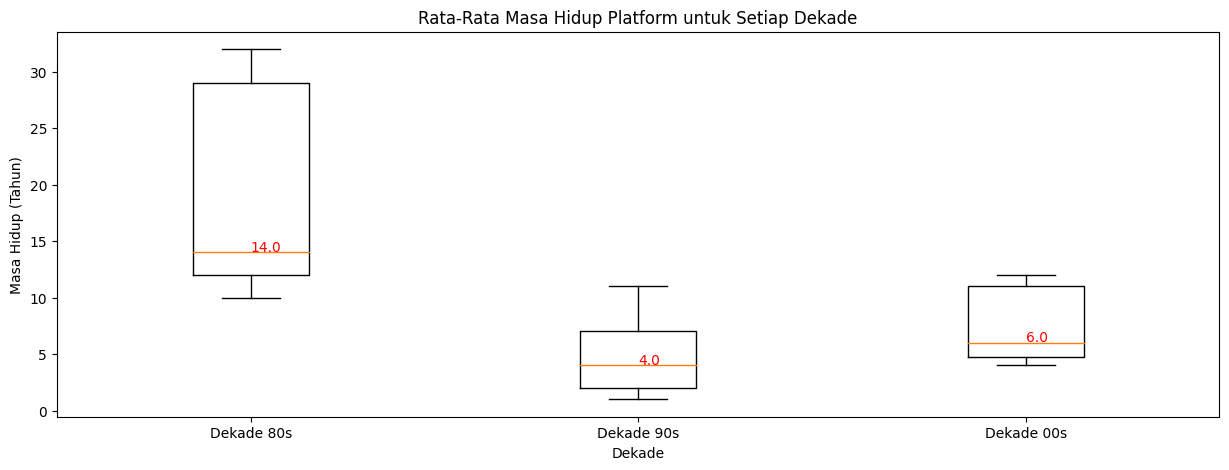

In [115]:
# identifikasi rata-rata masa hidup platform setiap tahun
plt.figure(figsize=(15,5))
plt.boxplot([platform_df[platform_df['dekade'] == 'Dekade 80s']['masa_hidup'],
             platform_df[platform_df['dekade'] == 'Dekade 90s']['masa_hidup'],
             df_potensial[df_potensial['dekade'] == 'Dekade 00s']['masa_hidup']])

plt.xticks([1, 2, 3], ['Dekade 80s', 'Dekade 90s', 'Dekade 00s'])
plt.ylabel('Masa Hidup (Tahun)')
plt.title('Rata-Rata Masa Hidup Platform untuk Setiap Dekade')
plt.xlabel('Dekade')
plt.ylabel('Masa Hidup (Tahun)')

# Anotasi untuk nilai median
medians = [np.median(platform_df[platform_df['dekade'] == 'Dekade 80s']['masa_hidup']),
           np.median(platform_df[platform_df['dekade'] == 'Dekade 90s']['masa_hidup']),
           np.median(df_potensial[df_potensial['dekade'] == 'Dekade 00s']['masa_hidup'])]

for i in range(len(medians)):
    plt.text(i+1, medians[i]+0.1, str(round(medians[i], 2)), color='r', fontsize=10)

plt.show()

**Kesimpulan**

Secara rata-rata, terhadap seluruh platform potensial yang dirilis dalam dekade 2000s memiliki rentang masa hidup sekitar 9 tahun. Jadi karena kami bermaksud untuk menganalisis data yang relevan secara spesifik untuk tahun 2017, kami akan mengambil data dari tahun 2009 dan seterusnya.

In [116]:
# memfilter data untuk rentang periode analisa yang relevan
platforms = ['3DS', 'PS3', 'PS4', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']
df_fill = platform_data[(platform_data['platform'].isin(platforms)) & (platform_data['year_of_release'] >= 2009)]
df_fill.sort_values('total_sales', ascending = False).head()

,platform,year_of_release,total_sales,tahun_sales_tertinggi,years_sales_drop
200,Wii,2009.0,206.97,2009.0,"[2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015...."
218,X360,2010.0,170.03,2010.0,"[2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0]"
147,PS3,2011.0,156.78,2011.0,"[2012.0, 2014.0, 2015.0, 2016.0]"
219,X360,2011.0,143.84,2010.0,"[2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0]"
146,PS3,2010.0,142.17,2011.0,"[2012.0, 2014.0, 2015.0, 2016.0]"


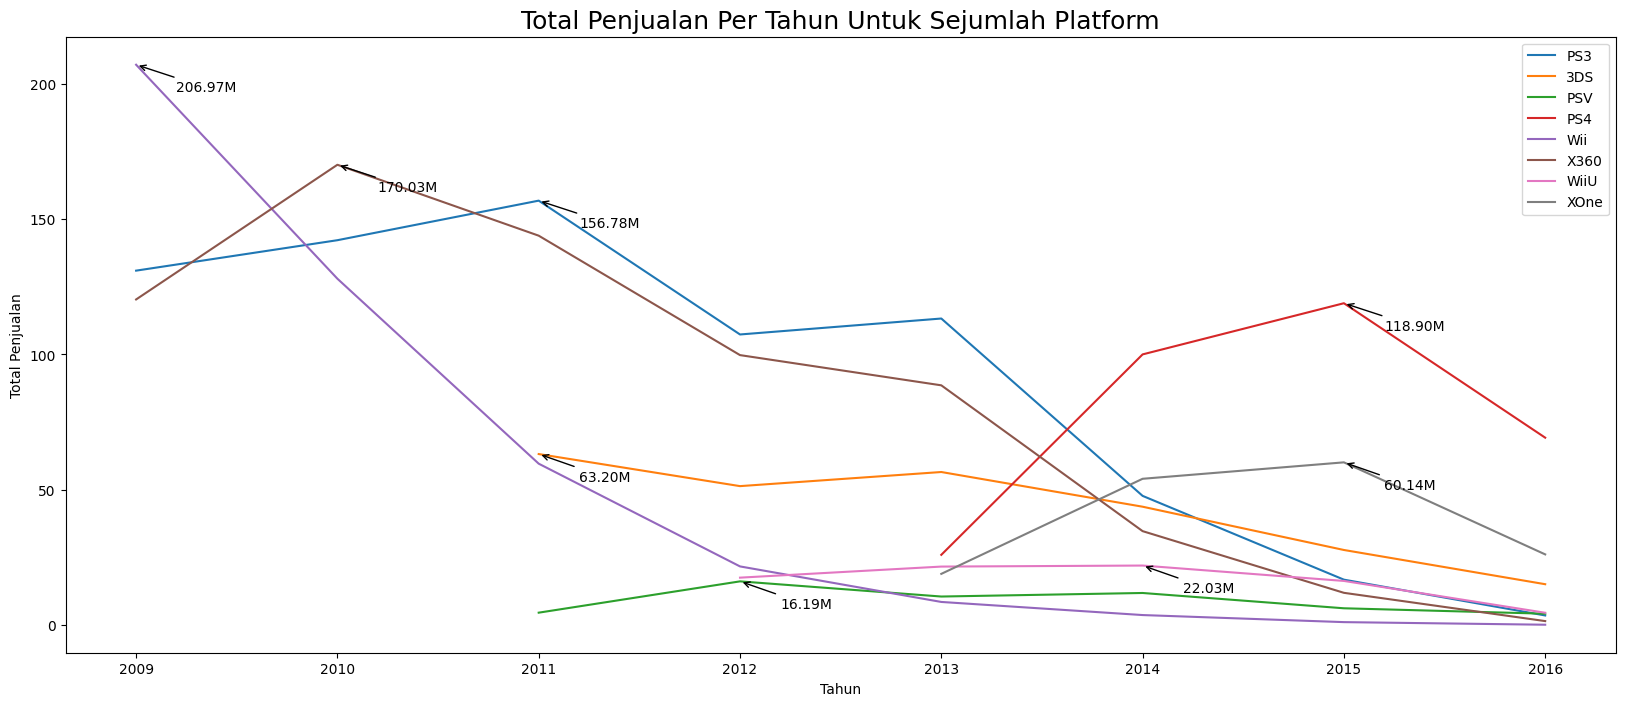

In [117]:
plt.figure(figsize=(20,8))

ps3_data = df_fill[df_fill['platform'] == 'PS3']
ps4_data = df_fill[df_fill['platform'] == 'PS4']
wii_data = df_fill[df_fill['platform'] == 'Wii']
wiiu_data = df_fill[df_fill['platform'] == 'WiiU']
x360_data = df_fill[df_fill['platform'] == 'X360']
xone_data = df_fill[df_fill['platform'] == 'XOne']
ds3_data = df_fill[df_fill['platform'] == '3DS']
psv_data = df_fill[df_fill['platform'] == 'PSV']

# plot data for PS3
plt.plot(ps3_data["year_of_release"], ps3_data["total_sales"], label="PS3")

# plot data for 3DS
plt.plot(ds3_data["year_of_release"], ds3_data["total_sales"], label="3DS")

# plot data for PSV
plt.plot(psv_data["year_of_release"], psv_data["total_sales"], label="PSV")

# plot data for PS4
plt.plot(ps4_data["year_of_release"], ps4_data["total_sales"], label="PS4")

# plot data for Wii
plt.plot(wii_data["year_of_release"], wii_data["total_sales"], label="Wii")

# plot data for X360
plt.plot(x360_data["year_of_release"], x360_data["total_sales"], label="X360")

# plot data for Wiiu
plt.plot(wiiu_data["year_of_release"], wiiu_data["total_sales"], label="WiiU")

# plot data for Xone
plt.plot(xone_data["year_of_release"], xone_data["total_sales"], label="XOne")

plt.title("Total Penjualan Per Tahun Untuk Sejumlah Platform", fontsize=18)
plt.xlabel("Tahun")
plt.ylabel("Total Penjualan")
plt.legend()

# add annotations
for data in [ps3_data, ps4_data, wii_data, wiiu_data, x360_data, xone_data, ds3_data, psv_data]:
    max_sales_index = data["total_sales"].argmax()
    max_sales_year = data.iloc[max_sales_index]["year_of_release"]
    max_sales = data.iloc[max_sales_index]["total_sales"]
    plt.annotate(f"{max_sales:.2f}M", xy=(max_sales_year, max_sales),
                 xytext=(max_sales_year+0.2, max_sales-10),
                 arrowprops=dict(facecolor='black', arrowstyle="->"))

# show the plot
plt.show()

In [118]:
# membuat dataframe yang hanya memuat tahun yang relevan
relevan_year = data_game[data_game['year_of_release'] >= 2009]
relevan_year

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
14,Kinect Adventures!,X360,2010.0,Misc,15.00,4.89,0.24,1.69,61,6.3,E,21.82
15,Wii Fit Plus,Wii,2009.0,Sports,9.01,8.49,2.53,1.77,80,7.4,E,21.80
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.00,63,5.8,E,0.01
16705,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,68,6.6,E,0.01
16708,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,62,5.4,E,0.01
16710,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,68,6.6,E,0.01


## **3.7. Pengaruh Ulasan Pengguna Dan Profesional Terhadap Penjualan**

Kami akan mengidentifikasi adakah efek dari ulasan yang diberikan pengguna dan para profesional dalam mempengaruhi penjualan di suatu platform video game. Sejauh ini kami melihat PlayStation4 sebagai platform yang paling populer dan berpotensi untuk menghasilkan keuntungan hingga beberapa periode kedepan melalui tahun-tahun penjualan puncaknya. Untuk itulah kami bermaksud agar lebih memahami apa yang sebetulnya mendorong suatu platform yang dengan cepat naik ke tahun-tahun penjualan puncaknya.

In [119]:
df_corr = relevan_year.copy()
df_corr

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
14,Kinect Adventures!,X360,2010.0,Misc,15.00,4.89,0.24,1.69,61,6.3,E,21.82
15,Wii Fit Plus,Wii,2009.0,Sports,9.01,8.49,2.53,1.77,80,7.4,E,21.80
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.00,63,5.8,E,0.01
16705,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,68,6.6,E,0.01
16708,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,62,5.4,E,0.01
16710,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,68,6.6,E,0.01


In [120]:
relevan_df = relevan_year[(relevan_year['platform'] == 'PS4')]
relevan_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,65,5.8,E,14.63
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,65,5.8,E,7.98
92,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,2.81,3.48,0.14,1.23,83,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16498,Root Letter,PS4,2016.0,Adventure,0.00,0.00,0.01,0.00,69,7.5,M,0.01
16501,Shin Hayarigami 2,PS4,2016.0,Adventure,0.00,0.00,0.01,0.00,65,5.8,E,0.01
16524,Dungeons 2,PS4,2016.0,Role-Playing,0.01,0.00,0.00,0.00,61,7.9,T,0.01
16528,Carmageddon: Max Damage,PS4,2016.0,Action,0.01,0.00,0.00,0.00,51,5.5,M,0.01


In [121]:
# Fungsi untuk membuat plot correlation metrix
def matrix_corr(df, platform):
    df_platform = df[df.platform == platform].reset_index()[['critic_score', 'user_score', 'total_sales']]
    plt.figure(figsize=(7, 7))
    corrMatrix = df_platform.corr()
    sns.heatmap(corrMatrix, annot=True, cmap='coolwarm')
    plt.title('Matriks Korelasi Untuk ' + str(platform) + ' platform')
    plt.show();

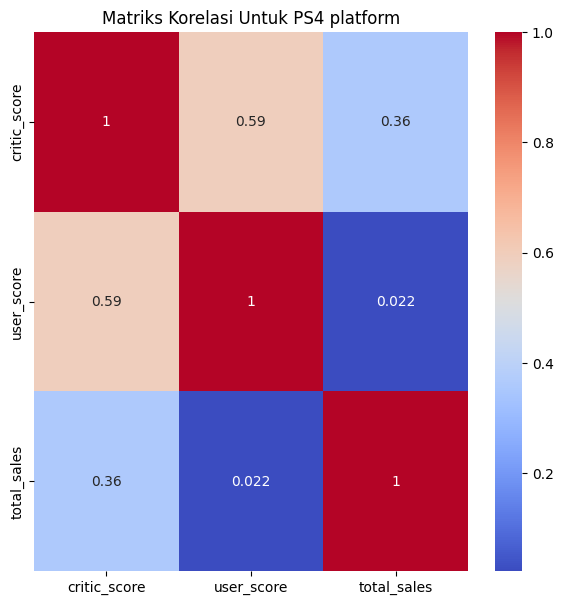

In [122]:
matrix_corr(relevan_df, 'PS4')

**Kesimpulan**

Critic score memiliki angka korelasi terhadap total sales sebesar 0.36, menunjukkan adanya pola hubungan positif yang cukup signifikan diantara keduanya. Sementara itu user score tampaknya tidak menunjukkan pola hubungan yang signifikan terhadap total sales, yaitu hanya sebesar 0.022 dengan arah hubungan positif. Kami akan melanjutkan dengan mempelajari lebih dalam pola hubungan diantara kedua variabel tersebut terhadap total sales menggunakan *scatterplot*.

In [123]:
# membuat fungsi untuk scatterplot
def scatterplot_with_trendline(df, x_col, y_col):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=x_col, y=y_col)
    sns.regplot(data=df, x=x_col, y=y_col, scatter=False, color='red')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'Scatterplot antara {x_col} dan {y_col}',  fontsize=15)
    plt.show()

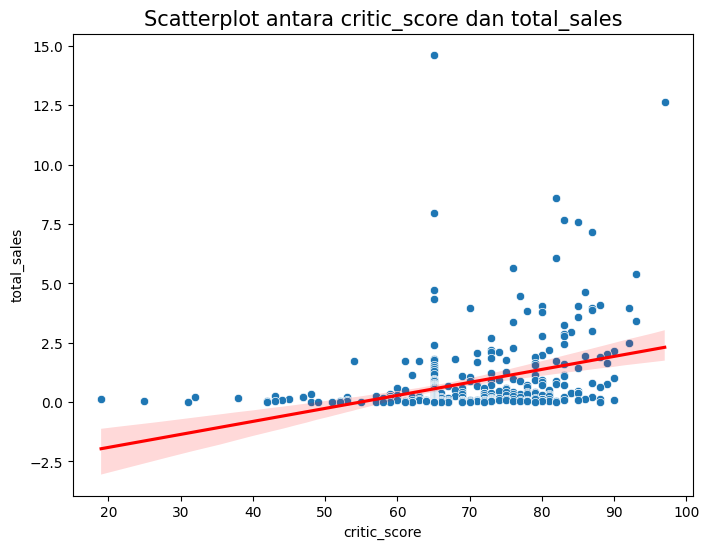

In [124]:
# membuat scatterplot untuk kolom total sales terhadap critic score
scatterplot_with_trendline(relevan_df, 'critic_score', 'total_sales')

In [125]:
fig = px.scatter(relevan_df, y='total_sales', x='critic_score', color='genre', opacity=1, \
                 range_x=[15,100] , range_y=[-0.25,6], trendline='lowess', \
                title='Relation between the critic score and total sales')

fig.update_xaxes(position=0.5)
fig.update_layout(title_font_size=15, legend_title_font_size=16, xaxis_title="Critic Score", yaxis_title="Total Sales")
fig.update_layout(legend_title='Genre')

# Show plot
fig.show()

/opt/conda/lib/python3.10/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


**Kesimpulan**

Grafik menunjukkan peningkatan yang signifikan pada penjualan video game terjadi berangsur-angsur setelah *critic score* memuncak diatas skor 60, dimana sebelum itu masih terjadi stagnasi tingkat penjualan untuk video game - video game di PlayStation4. Kami juga menemukan peningkatan penjualan yang bervariasi untuk masing-masing genre dengan genre Shooter yang memimpin pertumbuhan penjualan disusul kemudian untuk genre Action.

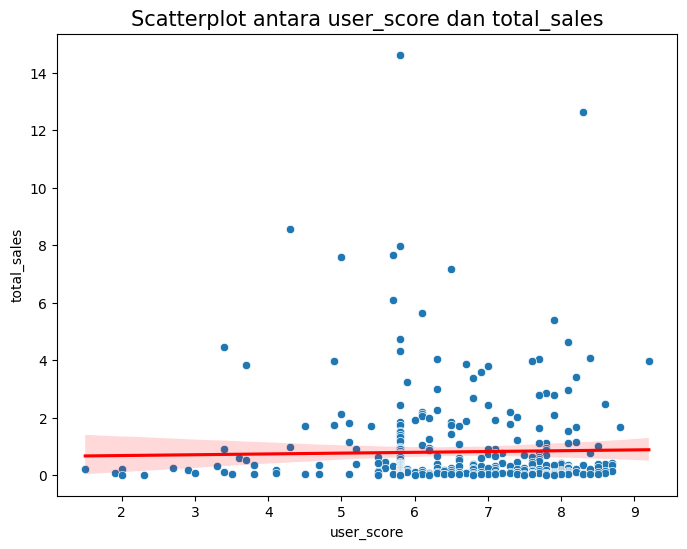

In [126]:
# membuat scatterplot untuk kolom total sales terhadap user score
scatterplot_with_trendline(relevan_df, 'user_score', 'total_sales')

In [127]:
fig = px.scatter(relevan_df, y='total_sales', x='user_score', color='genre', opacity=0.7, \
                 range_x=[15,100] , range_y=[-0.25,6], trendline='lowess', \
                title='Relation between the critic score and total sales')

fig.update_xaxes(position=0.5)
fig.update_layout(title_font_size=15, legend_title_font_size=16, xaxis_title="User Score", yaxis_title="Total Sales")
fig.update_layout(legend_title='Genre')

# Show plot
fig.show()

/opt/conda/lib/python3.10/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning:

invalid value encountered in divide



**Kesimpulan**

Kami menemukan sebaran yang acak antara user score dan total sales. Sejumlah genre seperti Shooter, sport, Racing dan Action menunjukkan pola yang semakin menurun seiring peningkatan skor ulasan user, sedangkan untuk sebagian yang lain tidak menunjukkan adanya pola khusus.

## **3.8. Membandingkan Total Penjualan PlayStation4 Dengan Platform Lain**

Kami akan membandingkan penjualan game yang sama antara PlayStation4 dengan platform-platform lain dan membuat kesimpulan

In [128]:
relevan_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,65,5.8,E,14.63
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,65,5.8,E,7.98
92,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,2.81,3.48,0.14,1.23,83,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16498,Root Letter,PS4,2016.0,Adventure,0.00,0.00,0.01,0.00,69,7.5,M,0.01
16501,Shin Hayarigami 2,PS4,2016.0,Adventure,0.00,0.00,0.01,0.00,65,5.8,E,0.01
16524,Dungeons 2,PS4,2016.0,Role-Playing,0.01,0.00,0.00,0.00,61,7.9,T,0.01
16528,Carmageddon: Max Damage,PS4,2016.0,Action,0.01,0.00,0.00,0.00,51,5.5,M,0.01


In [133]:
ps4_game_list = relevan_df['name'].unique().tolist()

df_year_range = df_corr[df_corr['year_of_release'] >= 2009]
df_year_range = df_year_range.query('platform != "PS4"')

# Filter kembali variabel df_year_range dengan hanya memuat data yang name-nya ada dalam daftar ps4_game_list
df_year_range = df_year_range[df_year_range['name'].isin(ps4_game_list)]

# Menambahkan kolom baru 'segmen' berisi baris identifikasi segmen platform
df_year_range['segmen'] = 'Platform Lain'
relevan_df['segmen'] = 'PS4'

# Menggantikan append dengan concat
df_compare = pd.concat([relevan_df, df_year_range])

platforms = df_compare['platform'].unique().tolist()
platforms

/tmp/ipykernel_32/4088189402.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['PS4', 'PS3', 'X360', 'XOne', 'PC', 'Wii', 'PSV', 'WiiU', '3DS', 'PSP', 'DS']

In [134]:
len(df_year_range) + len(relevan_df)

1167

In [135]:
fig = px.bar(df_compare, y='total_sales', x='platform', color='segmen', opacity=1, \
                  width=950, height=650, text='name', \
                 title='Penjualan Video Game Platform PlayStation4 vs. other platforms')

fig.update_xaxes(position=0.5)
fig.update_layout(title_font_size=15, legend_title_font_size=16, xaxis_title="User Score", yaxis_title="Total Sales")
fig.update_layout(legend_title='Genre')

# Show plot
fig.show()

In [136]:
platform_count = df_compare.groupby('platform')['name'].nunique().reset_index(name='jumlah_game_unik')

# Urutkan berdasarkan jumlah game unik dari yang tertinggi hingga terendah
platform_count = platform_count.sort_values('jumlah_game_unik', ascending=False)

# Tampilkan hasilnya
platform_count

,platform,jumlah_game_unik
4,PS4,392
10,XOne,217
3,PS3,176
2,PC,116
9,X360,111
6,PSV,82
8,WiiU,37
0,3DS,19
7,Wii,11
5,PSP,4


**Kesimpulan**

Platform PlayStation4 memiliki tingkat penjualan tertinggi dengan lebih dari 300 juta dolar, hampir 3 kali lipat dibandingkan penjualan pada platform lain semacam PlayStation3, XBox One, dan Xbox360 selama periode 2009 hingga 2016 untuk sejumlah list video game yang sama. Sebagai platform dengan potensi keuntungan tertinggi, penjualan terlaris untuk PlayStation4 sejauh ini adalah untuk game *Call Of Duty : Black Ops 3* senilai 14.63 juta dolar, kemudian disusul oleh game *Grand Theft Auto V* senilai 12.62 juta dolar. Sementara itu penjualan tertinggi untuk game *Grand Theft Auto V* masih dipegang oleh platform PlayStation 3 dan XBox 360 senilai masing-masing 21.05 juta dolar dan 16.3 juta dolar. Sebaliknya pada kedua platform ini, penjualan game *Call Of Duty : Black Ops 3* sangat rendah, yaitu hanya senilai kurang dari 2 juta dolar.

## **3.9. Distribusi Video Game Untuk Setiap Genre**

Kami akan mengamati distribusi umum dari total penjualan video game berdasarkan genre. Hasil yang kami harapkan yaitu berupa kesimpulan terkait genre yang paling menguntungkan, secara general untuk seluruh platform dan secara spesifik untuk platform potensial kami.

### **3.9.1. Total Penjualan Untuk Setiap Genre Pada Platform Popular**

In [137]:
relevan_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,segmen
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,65,5.8,E,14.63,PS4
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62,PS4
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58,PS4
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,65,5.8,E,7.98,PS4
92,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,2.81,3.48,0.14,1.23,83,5.7,M,7.66,PS4


In [138]:
sales_agg = relevan_df.groupby('genre')['total_sales'].agg(['count', 'sum', 'median']).reset_index()
sales_agg = sales_agg.rename(columns={'count': 'kuantitas_penjualan', 'sum': 'total_penjualan', 'median': 'avg_penjualan'})
sales_agg.sort_values('kuantitas_penjualan', ascending=False)

,genre,kuantitas_penjualan,total_penjualan,avg_penjualan
0,Action,144,96.10,0.155
7,Role-Playing,51,28.99,0.200
10,Sports,46,55.61,0.525
8,Shooter,41,88.56,0.970
1,Adventure,28,6.34,0.070
3,Misc,20,8.19,0.075
6,Racing,19,12.14,0.230
2,Fighting,18,8.65,0.170
4,Platform,12,7.69,0.300
9,Simulation,6,1.23,0.210


In [139]:
fig = px.bar(relevan_df, x='total_sales', y='genre', color='genre', text='name', opacity=1, \
                  width=1000, height=700, range_x=[0,100], \
                 title='Total Penjualan Per Genre Untuk Platform PS4')

fig.update_xaxes(position=0.5)
fig.update_layout(title_font_size=20, legend_title_font_size=16, legend_title='Genre', \
                  xaxis_title="Total Sales", yaxis_title="Genre", \
                  uniformtext_mode='hide')

fig.update_traces(texttemplate='%{text}<br>Total Sales: %{x}', \
                  textposition='inside', insidetextanchor='middle')

# Show plot -
fig.show()

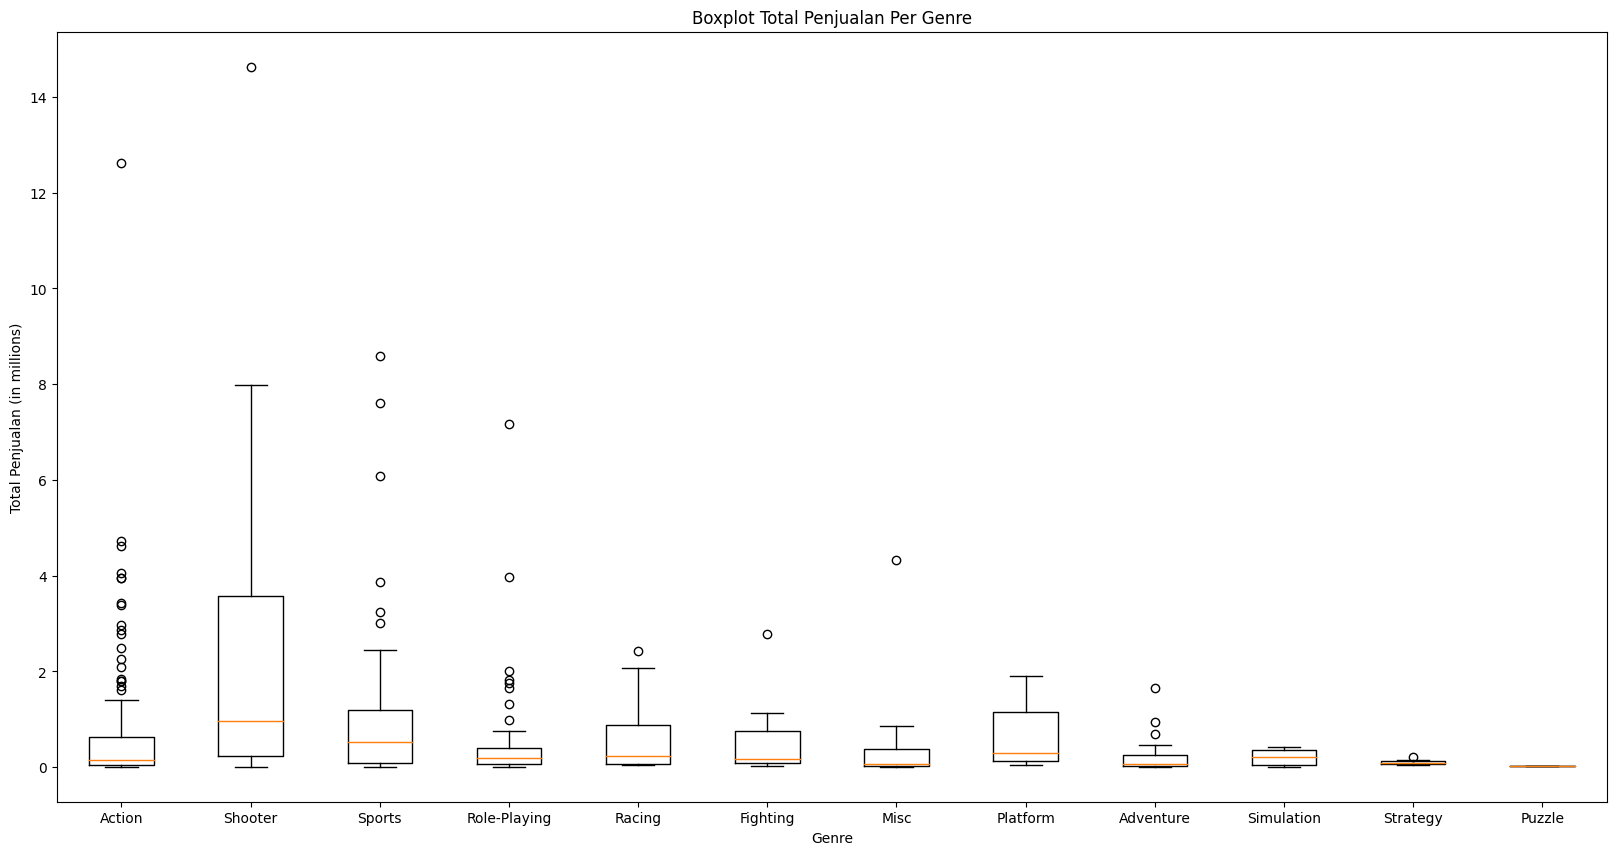

In [140]:
# membuat dictionary yang berisi total penjualan untuk setiap genre
genre_data = {}
for genre in set(relevan_df['genre']):
    genre_data[genre] = relevan_df[relevan_df['genre'] == genre]['total_sales']

genre_data_sorted = dict(sorted(genre_data.items(), key=lambda item: sum(item[1]), reverse=True))

# membuat boxplot untuk setiap genre yang sudah terurut
plt.figure(figsize=(20, 10))
plt.boxplot(genre_data_sorted.values())
plt.xticks(range(1, len(genre_data_sorted) + 1), genre_data_sorted.keys())
plt.xlabel('Genre')
plt.ylabel('Total Penjualan (in millions)')
plt.title('Boxplot Total Penjualan Per Genre')
plt.show()

**Kesimpulan**

Secara total penjualan, kami menemukan *'Action'* sebagai genre terlaris untuk platform PlayStation4 senilai 96 juta dolar yang selanjutnya disusul oleh genre *'Shooter'* senilai 88.6 juta dolar. Faktor yang kami indikasikan kuat dalam mendorong tingginya total penjualan untuk genre *'Action'* yaitu hanya dari segi kuantitas penjualannya yang sangat besar (tertinggi untuk kelasnya). Hal ini berbanding terbalik dengan genre *'Shooter'* yang dengan kuantitas penjualan jauh lebih rendah namun mampu menghasilkan video game dengan nilai rata-rata penjualan jauh lebih tinggi dibandingkan genre *'Action'*. Hal ini kami amati disebabkan karena genre *'Shooter'* lebih banyak menghasilkan video game-video game dengan penjualan tinggi, sekitar 4 juta hingga 8 juta dolar. Diurutan ke-3 kami mengidentifikasi genre *'Sports'* dengan kuantitas penjualan sedikit diatas genre *'Shooter'*, yang dari segi rata-rata penjualan juga mampu mengalahkan genre *'Action'*. Salah satu faktor penyebabnya kalah untuk nilai rata-rata penjualan dengan genre *'Shooter'* tidak lain karena genre ini bermain di level game *'medium price'*.

3 (tiga) Genre dengan penjualan paling rendah untuk platform PlayStation adalah Puzzle (20 ribu dolar), Strategy (620 ribu dolar) dan simulation (1.23 juta dolar).

### **3.9.2. Total Penjualan Untuk Setiap Genre Di Seluruh Platform**

In [141]:
relevan_year

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
14,Kinect Adventures!,X360,2010.0,Misc,15.00,4.89,0.24,1.69,61,6.3,E,21.82
15,Wii Fit Plus,Wii,2009.0,Sports,9.01,8.49,2.53,1.77,80,7.4,E,21.80
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.00,63,5.8,E,0.01
16705,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,68,6.6,E,0.01
16708,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,62,5.4,E,0.01
16710,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,68,6.6,E,0.01


In [142]:
sales_agg_all = relevan_year.groupby('genre')['total_sales'].agg(['count', 'sum', 'median']).reset_index()
sales_agg_all = sales_agg_all.rename(columns={'count': 'kuantitas_penjualan', 'sum': 'total_penjualan', 'median': 'avg_penjualan'})
sales_agg_all.sort_values('kuantitas_penjualan', ascending=False)

,genre,kuantitas_penjualan,total_penjualan,avg_penjualan
0,Action,1767,810.78,0.160
3,Misc,782,310.37,0.135
10,Sports,758,465.76,0.200
1,Adventure,703,81.23,0.040
7,Role-Playing,671,362.59,0.150
8,Shooter,500,549.03,0.360
9,Simulation,340,104.67,0.110
6,Racing,321,156.37,0.170
2,Fighting,252,113.49,0.190
11,Strategy,234,48.13,0.070


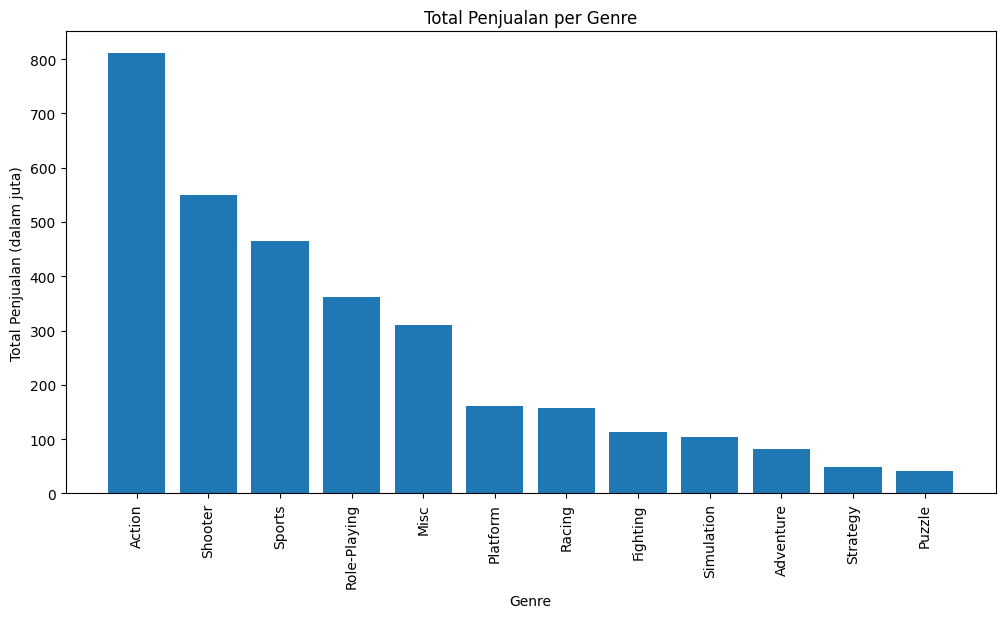

In [144]:
df_genre = relevan_year.groupby('genre').sum()[['total_sales']].sort_values('total_sales', ascending=False)

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(df_genre.index, df_genre['total_sales'])
ax.set_title('Total Penjualan per Genre')
ax.set_xlabel('Genre')
ax.set_ylabel('Total Penjualan (dalam juta)')
plt.xticks(rotation=90)
plt.show()

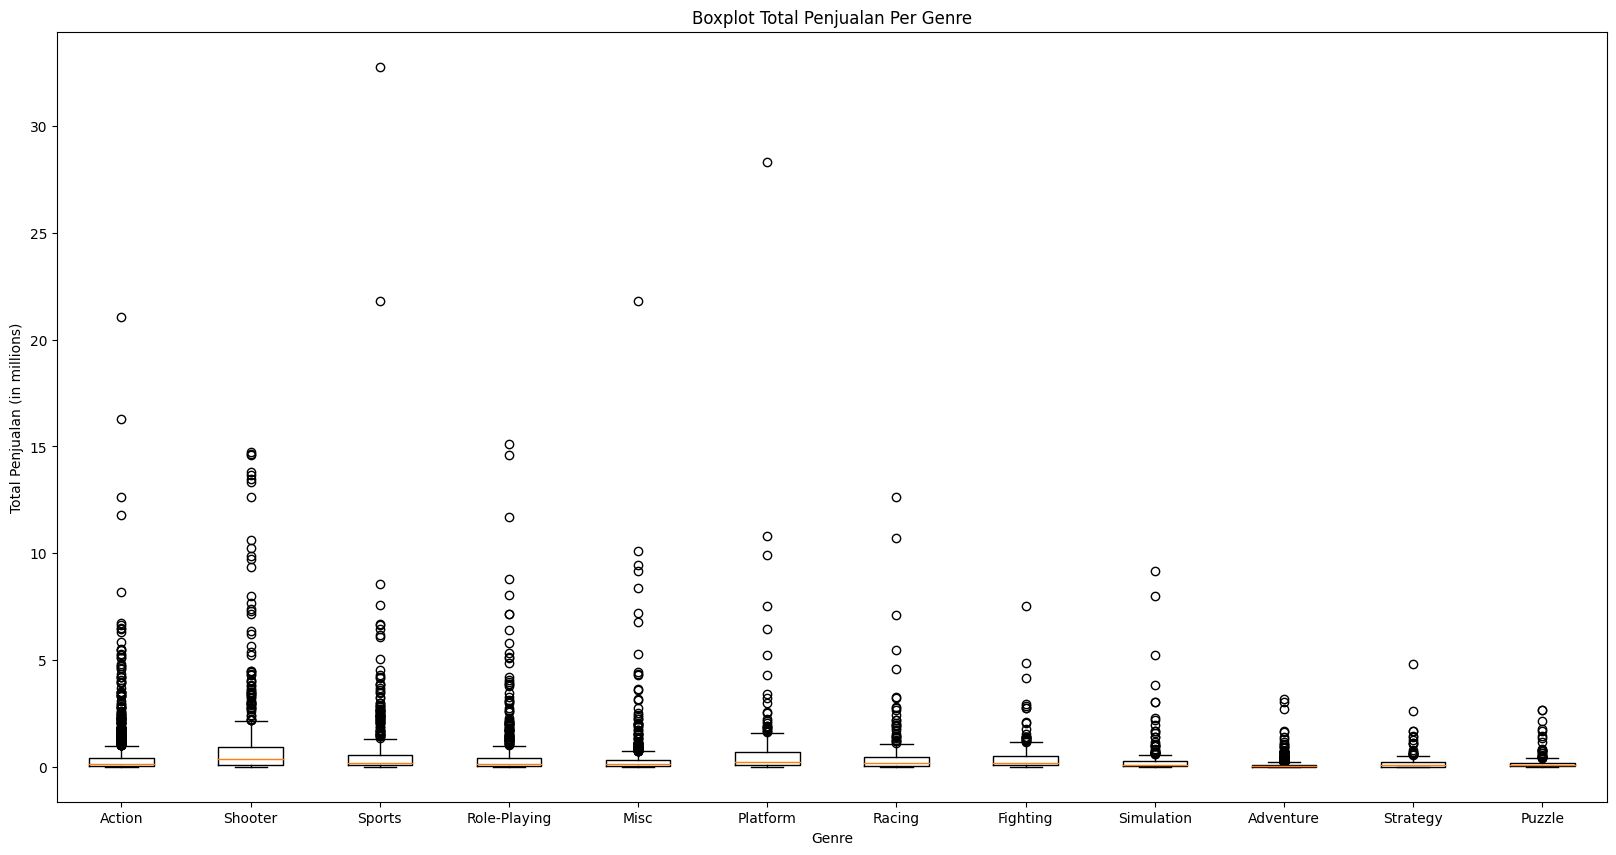

In [145]:
# membuat dictionary yang berisi total penjualan untuk setiap genre
genre_data = {}
for genre in set(relevan_year['genre']):
    genre_data[genre] = relevan_year[relevan_year['genre'] == genre]['total_sales']

genre_data_sorted = dict(sorted(genre_data.items(), key=lambda item: sum(item[1]), reverse=True))

# membuat boxplot untuk setiap genre yang sudah terurut
plt.figure(figsize=(20, 10))
plt.boxplot(genre_data_sorted.values())
plt.xticks(range(1, len(genre_data_sorted) + 1), genre_data_sorted.keys())
plt.xlabel('Genre')
plt.ylabel('Total Penjualan (in millions)')
plt.title('Boxplot Total Penjualan Per Genre')
plt.show()

**Kesimpulan**

Masih pada urutan yang sama, dimana kami mengidentifikasi top 3 posisi teratas dari video game-video game terlaris masing-masing untuk genre *'Action'*, *'Shooter'* dan *'Sports'*. Genre *'Action'* masih memimpin dari segi kuantitas penjualan namun juga tetap menjadi yang terendah untuk rata-rata penjualan dibandingkan 2 posisi genre teratas lainnya. Rata-rata penjualan tertinggi untuk genre *'Shooter'* pada bagian ini memperlihatkan bahwa genre *'Shooter'* bahkan secara general memang terbukti bermain di *'high price level'*, kurang lebih di rentang angka 4 juta hingga 8 juta dolar. Hal ini berbeda dengan genre *'Action'* dan *'Sports'*, yang apabila mengacu pada grafik terlihat mengelompok disekitar *'medium price level'* untuk rentang harga video game-video game di angka 5 juta dolar kebawah.

# **Tahap 4. Pemrofilan Pengguna Untuk Masing-Masing Wilayah**

Pada tahap ini kami akan melakukan analisis untuk per wilayah (Amerika Utara, Eropa, Jepang), dan menentukan:
1. Top 5 platform teratas dan menelaskan variasi pangsa pasar dari satu wilayah terhadap wilayah lainnya
2. Top 5 genre teratas dan menjelaskan perbedaannya
3. Mengidentifikasi apakah terdapat pengaruh rating dari ESRB terhadap penjualan di masing-masing wilayah

In [146]:
relevan_year.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
14,Kinect Adventures!,X360,2010.0,Misc,15.00,4.89,0.24,1.69,61,6.3,E,21.82
15,Wii Fit Plus,Wii,2009.0,Sports,9.01,8.49,2.53,1.77,80,7.4,E,21.80
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05


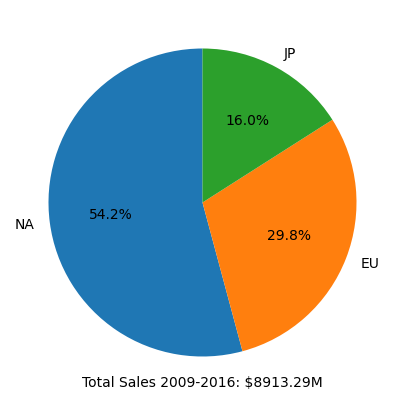

In [147]:
# identifikasi total penjualan untuk masing-masing region
labels = ['NA', 'EU', 'JP']
sizes = [sum(df['na_sales']), sum(df['eu_sales']), sum(df['jp_sales'])]

# Plot
fig1, ax1 = plt.subplots(figsize=(5, 5))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Add total sales annotation
total_sales = sum(df['total_sales'])
plt.text(0, -1.2, f"Total Sales 2009-2016: ${total_sales:.2f}M", horizontalalignment='center')

# Show plot
plt.show()

In [151]:
# membuat fungsi untuk memunculkan barchart & piechart total sales per platform untuk suatu wilayah
def sales_platform_bar(df, region):

    # aggregasikan data berdasarkan platform dan jumlahkan penjualan untuk wilayah yang dipilih
    grouped_data = df.groupby('platform')[region].sum().reset_index()

    # Urutkan data berdasarkan penjualan dalam urutan menurun (top 5)
    sorted_data = grouped_data.sort_values(by=region, ascending=False).head(5)

    # Buat Barchart
    plt.figure(figsize=(10,6))
    plt.bar(sorted_data['platform'], sorted_data[region])
    plt.title(f'Total {region.upper()} Sales per Platform')
    plt.xlabel('Platform')
    plt.ylabel(f'Total {region.upper()} Sales (in millions)')

    # Tambahkan annotasi pada setiap bar chart
    for i, val in enumerate(sorted_data[region]):
        plt.annotate(f"{val:.2f}", xy=(i, val), ha='center', va='bottom')

    plt.show()

    # Buat Piechart dengan ukuran yang lebih besar
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.pie(sorted_data[region], labels=sorted_data['platform'], autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Top 5 {region.upper()} Sales per Platform')

    plt.show()

In [152]:
# membuat fungsi untuk memunculkan linechart untuk total sales per platform per tahun dari suatu wilayah
def sales_platform_line(df, region):

    # filter top 5 platform by total sales
    top_platforms = df.groupby('platform')[region].sum().sort_values(ascending=False)[:5].index.tolist()

    # filter data by top 5 platform
    data = df[df['platform'].isin(top_platforms)]

    # kelompokkan data berdasarkan tahun dan platform, lalu hitung total penjualan
    data = data.groupby(['year_of_release', 'platform'])[region].sum().reset_index()

    # data pivot untuk memiliki tahun sebagai indeks dan platform sebagai kolom
    data = data.pivot(index='year_of_release', columns='platform', values=region)

    # membuat diagram garis
    ax = data.plot.line(figsize=(20,6), linewidth=2.5, marker='o', markersize=7)
    ax.set_xlabel('Year')
    ax.set_ylabel('Total Sales')
    ax.set_title(f'Top 5 {region.upper()} Platforms with Highest Total Sales Per Year')

    # Add a legend to the chart
    ax.legend(loc='upper left', bbox_to_anchor=(1,1))
    plt.show()

In [153]:
# membuat fungsi untuk memunculkan barchart & piechart total sales per genre untuk suatu wilayah
def sales_genre_bar(df, region):

    # aggregasikan data berdasarkan genre dan jumlahkan penjualan untuk wilayah yang dipilih
    grouped_data = df.groupby('genre')[region].sum().reset_index()

    # Urutkan data berdasarkan penjualan dalam urutan menurun (top 5)
    sorted_data = grouped_data.sort_values(by=region, ascending=False).head(5)

    # Buat Barchart
    plt.figure(figsize=(10,6))
    plt.bar(sorted_data['genre'], sorted_data[region])
    plt.title(f'Total {region.upper()} Sales per Genre')
    plt.xlabel('Genre')
    plt.ylabel(f'Total {region.upper()} Sales (in millions)')

    # Tambahkan annotasi pada setiap bar chart
    for i, val in enumerate(sorted_data[region]):
        plt.annotate(f"{val:.2f}", xy=(i, val), ha='center', va='bottom')

    plt.show()

    # Buat Piechart dengan ukuran yang lebih besar
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.pie(sorted_data[region], labels=sorted_data['genre'], autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Top 5 {region.upper()} Sales per Genre')

    plt.show()

In [154]:
# membuat fungsi untuk memunculkan linechart untuk total sales per genre per tahun dari suatu wilayah
def sales_genre_line(df, region):

    # Pilih 5 genre teratas dengan total penjualan tertinggi untuk wilayah tertentu
    top_genres = df.groupby('genre')[region].sum().nlargest(5).index.tolist()

    # Filter DataFrame untuk hanya menyertakan data untuk 5 genre teratas
    filtered_df = df[df['genre'].isin(top_genres)]

    # Kelompokkan data berdasarkan tahun dan genre, dan jumlahkan total penjualan
    grouped_df = filtered_df.groupby(['year_of_release', 'genre'], as_index=False)[region].sum()

    # Pivot data sehingga setiap genre memiliki kolomnya sendiri
    pivoted_df = grouped_df.pivot(index='year_of_release', columns='genre', values=region)

    # buat line chart
    ax = pivoted_df.plot.line(figsize=(20,6), linewidth=2.5, marker='o', markersize=7)
    ax.set_xlabel('Year')
    ax.set_ylabel('Total Sales')
    ax.set_title(f'Top 5 {region.upper()} Genres with Highest Total Sales Per Year')

    # tambahkan legend ke chart
    ax.legend(loc='upper left', bbox_to_anchor=(1,1))

    # tampilkan chart
    plt.show()

## **4.1. User Profil : Amerika Utara (NA)**

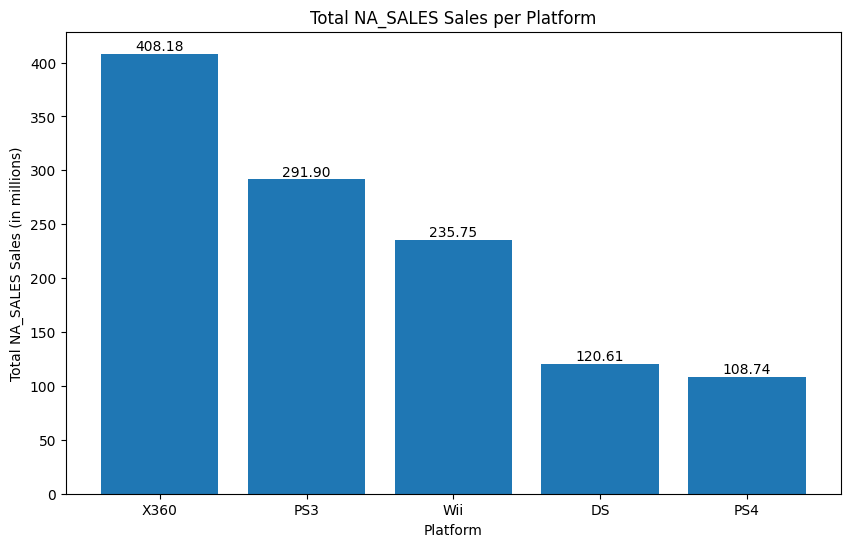

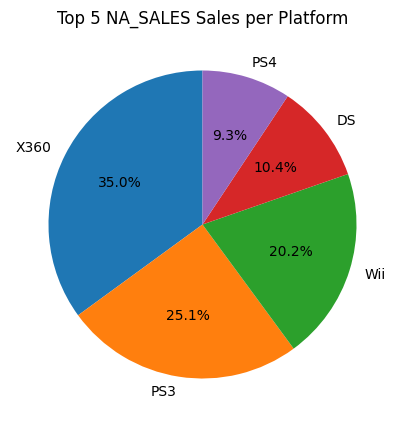

In [155]:
# identifikasi top 5 total sales per platform : Amerika Utara
sales_platform_bar(relevan_year, 'na_sales')

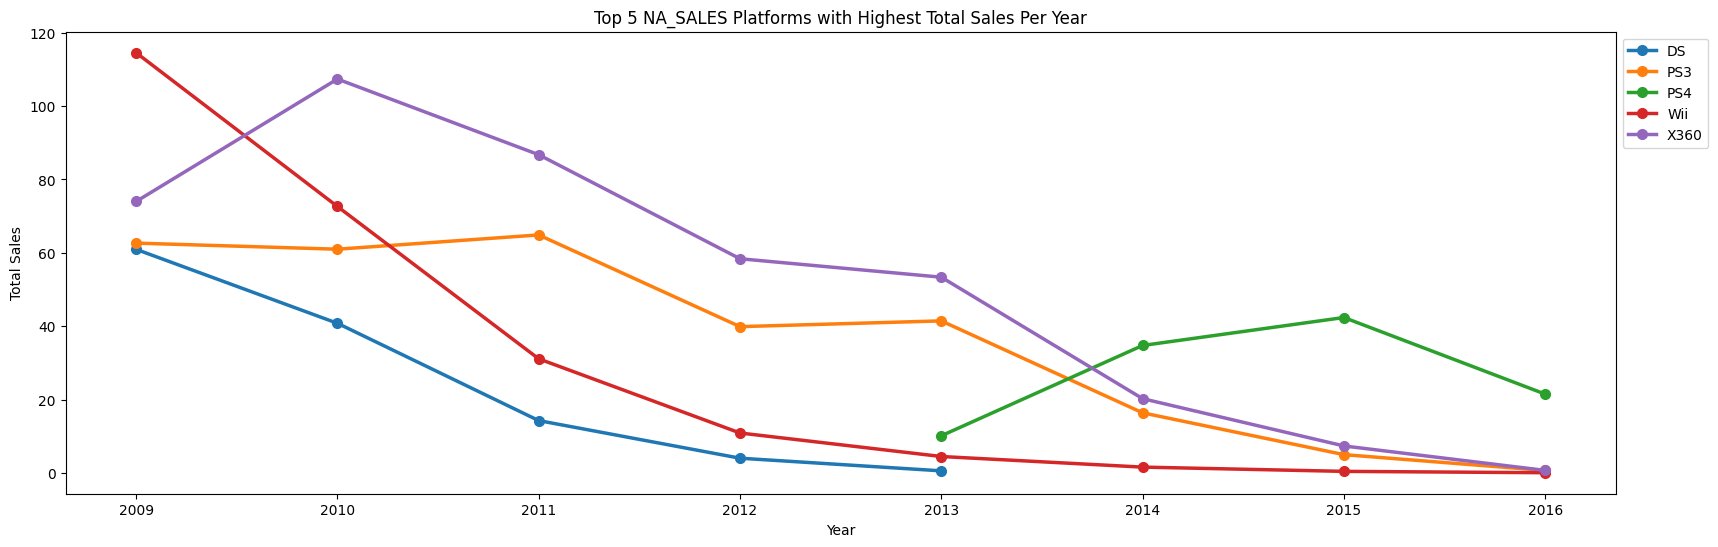

In [156]:
# identifikasi tren total sales per platform : Amerika Utara
sales_platform_line(relevan_year, 'na_sales')

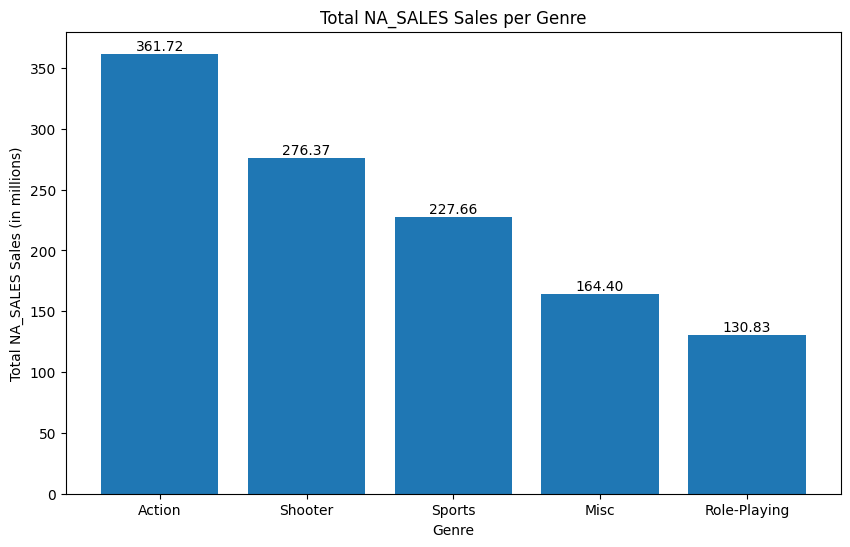

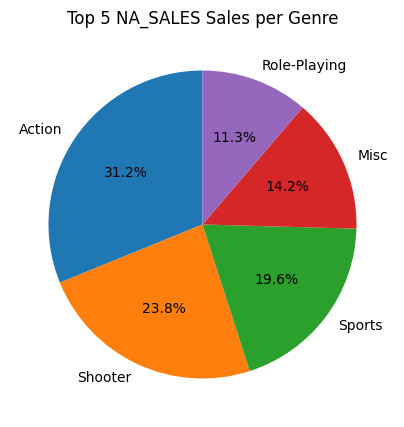

In [157]:
# identifikasi top 5 total sales per genre : Amerika Utara
sales_genre_bar(relevan_year, 'na_sales')

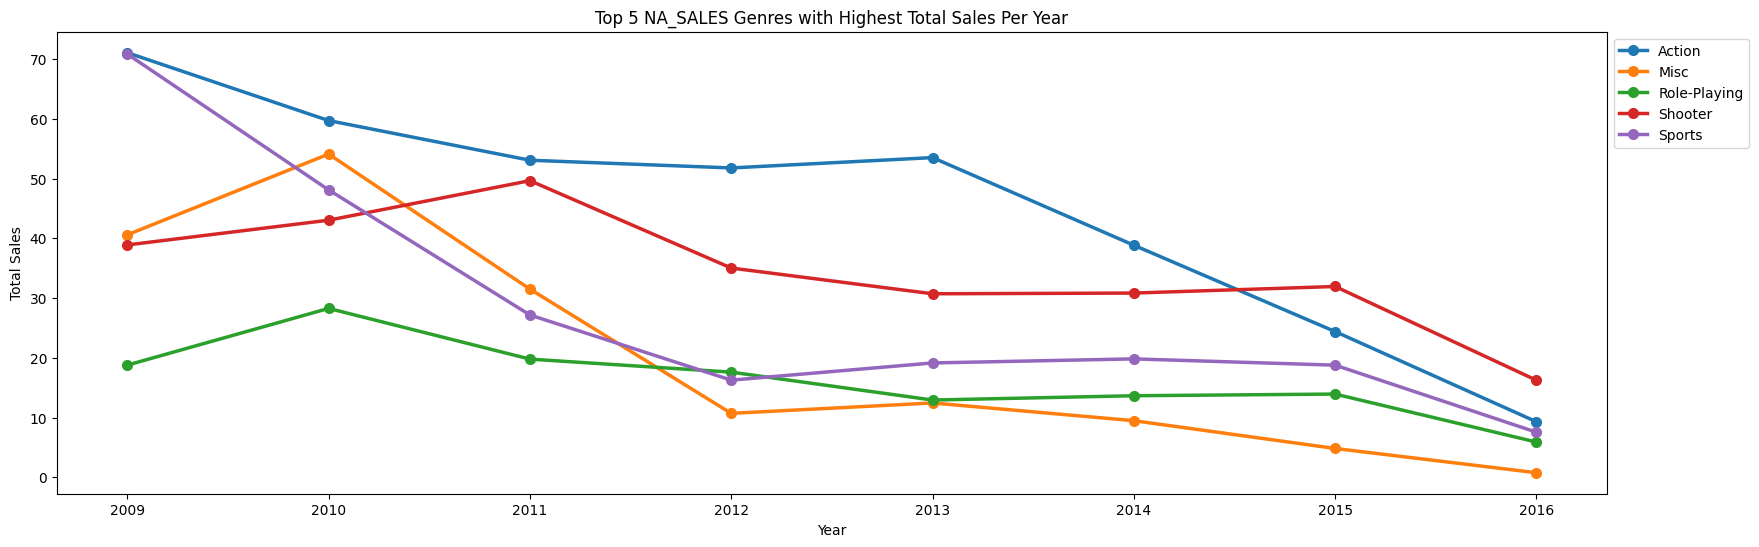

In [158]:
# identifikasi tren total sales per genre : Amerika Utara
sales_genre_line(relevan_year, 'na_sales')

**Kesimpulan**

Platform terlaris untuk regional Amerika Utara dengan total penjualan 410 juta dolar yaitu XBox 360. Total penjualannya mampu mencakup hingga 35% dari keseluruhan penjualan untuk top 5 platform terlaris. Secara tren, dari tahun ke tahun kami telah mengidentifikasi penurunan popularitas dari seluruh platform, bahkan kami juga menemukan platform Nintendo DS yang tidak lagi memiliki penjualan sejak 2014. Sementara itu platform rilisan terbaru semacam PlayStation 4 yang muncul di awal 2013 terlihat cukup kuat untuk menghasilkan keuntungan di tahun-tahun mendatang relatif terhadap platform-platform populer yang ada. Terbukti dari total penjualannya yang bertumbuh positif selama 2013 hingga 2015, dan meskipun menurun di tahun 2016 namun tetap menjadi yang tertinggi dibandingkan keseluruhan platform.

Dari sisi genre video game terlaris, *'Action'* terbukti menjadi yang terlaris dengan total penjualan selama 2009 - 2016 senilai 365 juta dolar, meskipun kami juga mengamati tren penurunan popularitas spesifik untuk genre *'Action'* dan seluruh genre populer lainnya. Namun mempertimbangkan tren penjualan tahunan, kami melihat genre *'Shooter'* tampaknya sedikit lebih stabil dibandingkan genre *'Action'*, dimana selama pertengahan 2014 hingga 2016 total penjualan *'Shooter'* sudah berada diposisi teratas.

## **4.2. User Profil : Eropa (EU)**

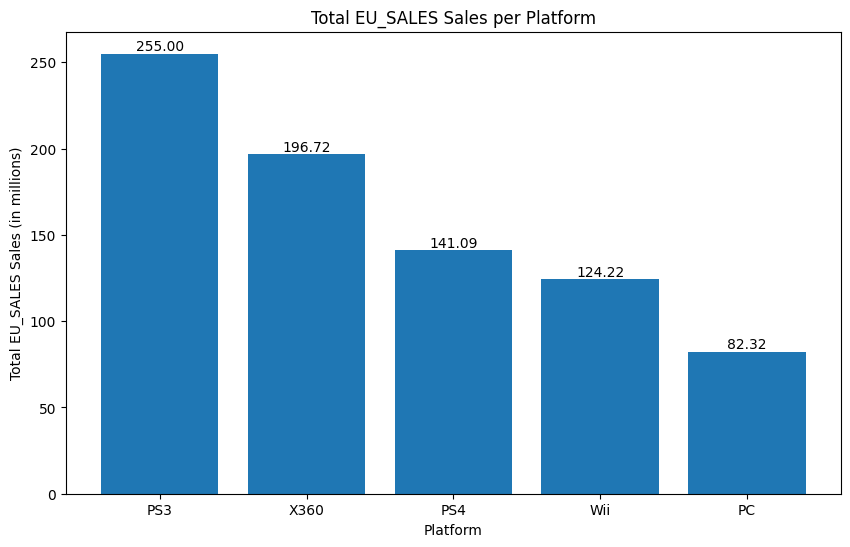

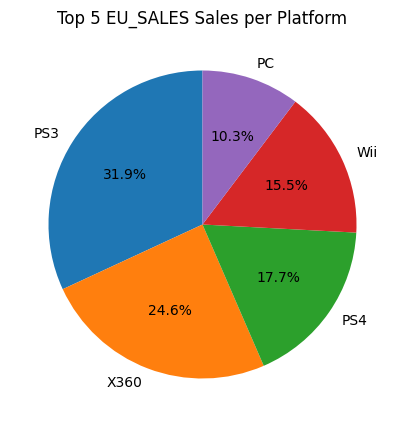

In [159]:
# identifikasi top 5 total sales per platform : Eropa
sales_platform_bar(relevan_year, 'eu_sales')

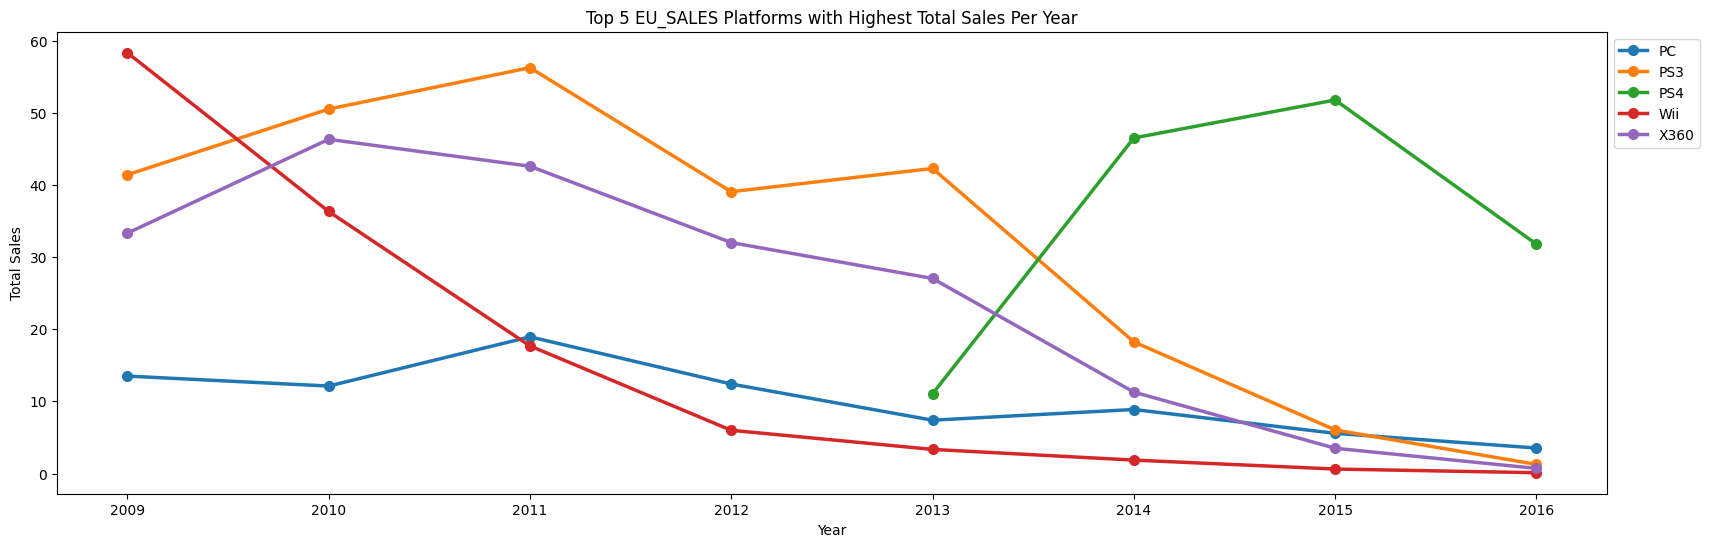

In [160]:
# identifikasi tren total sales per platform : Eropa
sales_platform_line(relevan_year, 'eu_sales')

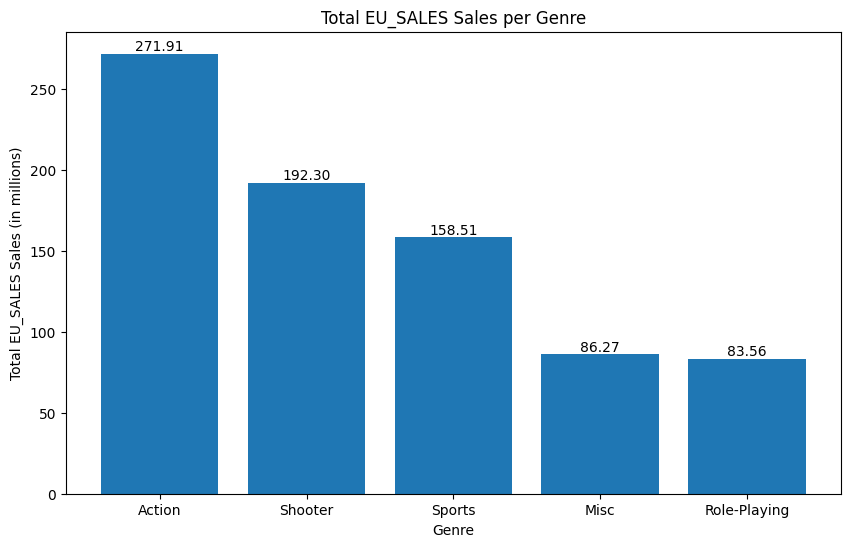

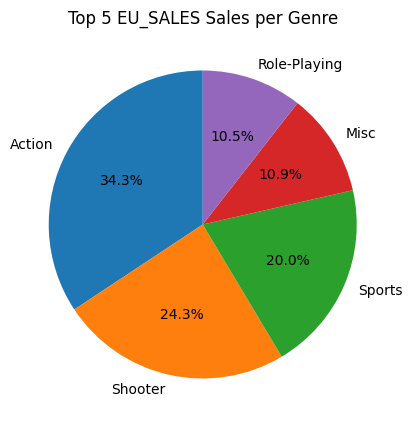

In [161]:
# identifikasi top 5 total sales per genre : Eropa
sales_genre_bar(relevan_year, 'eu_sales')

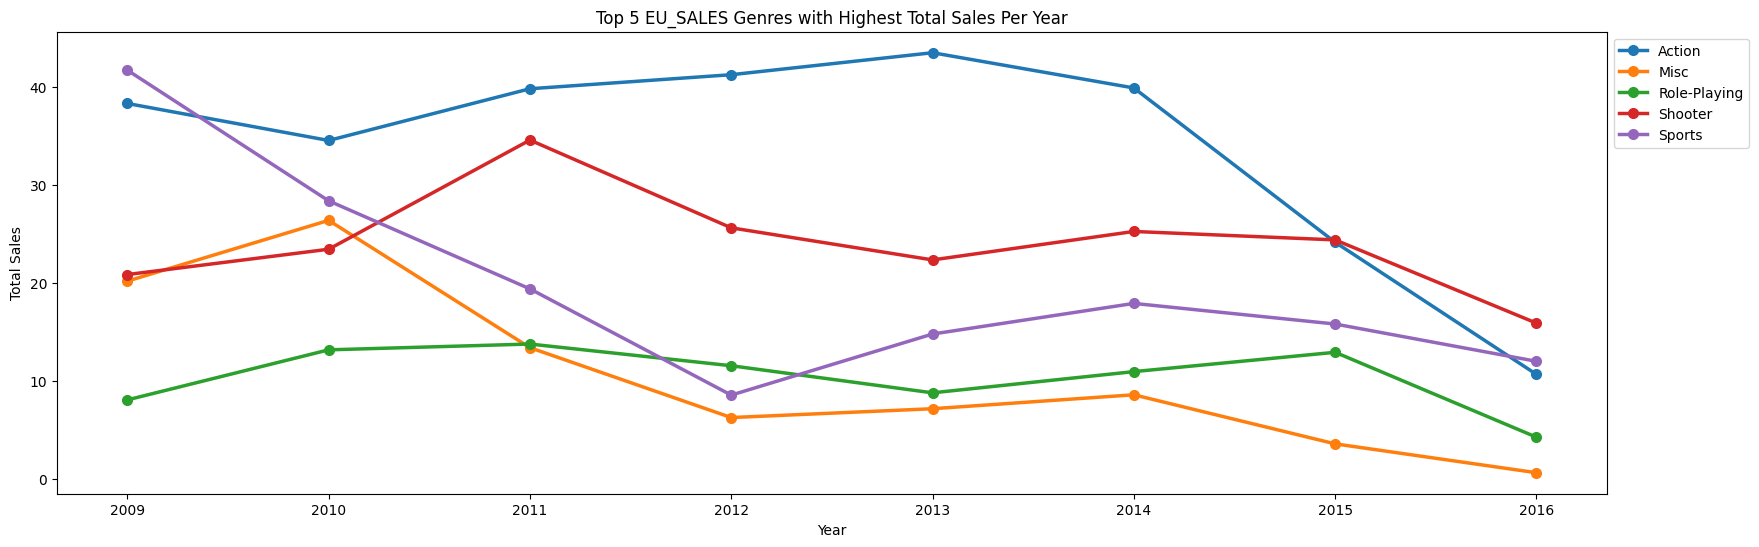

In [162]:
# identifikasi tren total sales per genre : Eropa
sales_genre_line(relevan_year, 'eu_sales')

**Kesimpulan**

Platform terlaris di Eropa adalah PlayStation 3 dengan total penjualan senilai 256 juta dolar yang semakin menurun popularitasnya bersamaan pula dengan seluruh platform populer lain. PlayStation 4 tampaknya mulai menggantikan popularitas dari seluruh platform - platform terlaris di Eropa dari segi tren penjualan tahunan, meskipun total penjualannya sejauh ini masih berada di urutan ke-3 mengingat statusnya sebagai platform rilisan terbaru.

Untuk genre paling populer, kami mengidentifikasi urutan yang masih serupa dengan regional Amerika Utara, dimana genre *'Action'* masih diposisi pertama dengan total penjualan senilai 275 juta dolar, disusul *'Shooter'* diurutan ke-2 dengan 194 juta dolar. Sementara itu, tren penjualan tahunan genre *'Sports'* di awal tahun 2009 tampaknya sempat berada di posisi tertinggi untuk kemudian digantikan oleh genre *'Action'* tepat setahun kemudian. Namun popularitas genre *'Action'* di Eropa pun terbukti tidak bertahan cukup lama, dimana di akhir tahun 2014 terjadi penurunan yang sangat signifikan hingga tahun-tahun berikutnya. Saat ini, genre video game dengan total penjualan tertinggi di Eropa adalah untuk genre *'Shooter'* yang memang memiliki penjualan yang cukup stabil dari tahun ke tahun.

## **4.3. User Profil : Jepang (JP)**

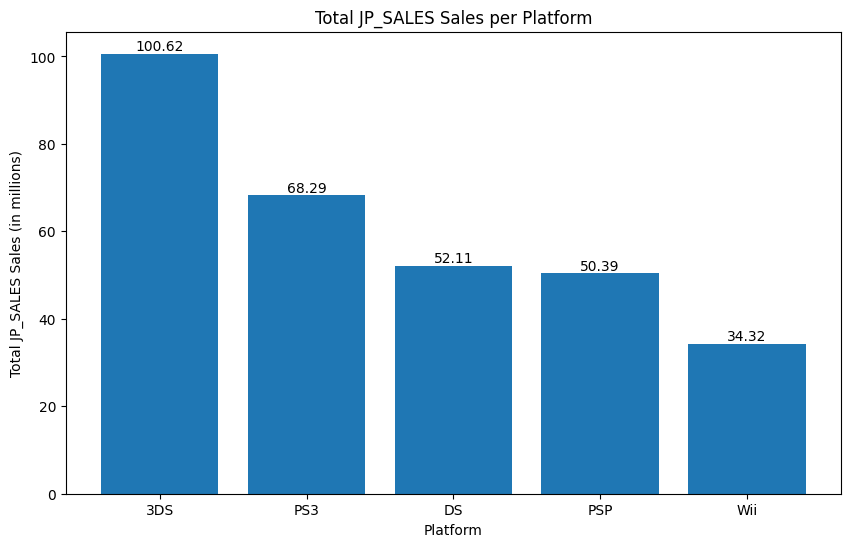

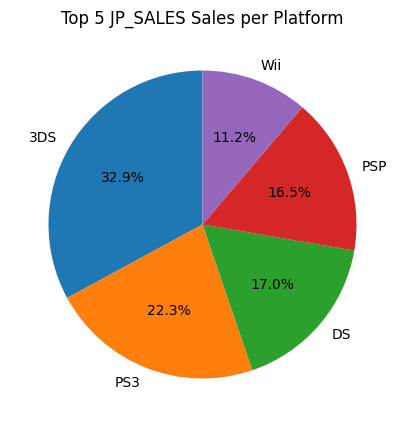

In [163]:
# identifikasi top 5 total sales per platform : Jepang
sales_platform_bar(relevan_year, 'jp_sales')

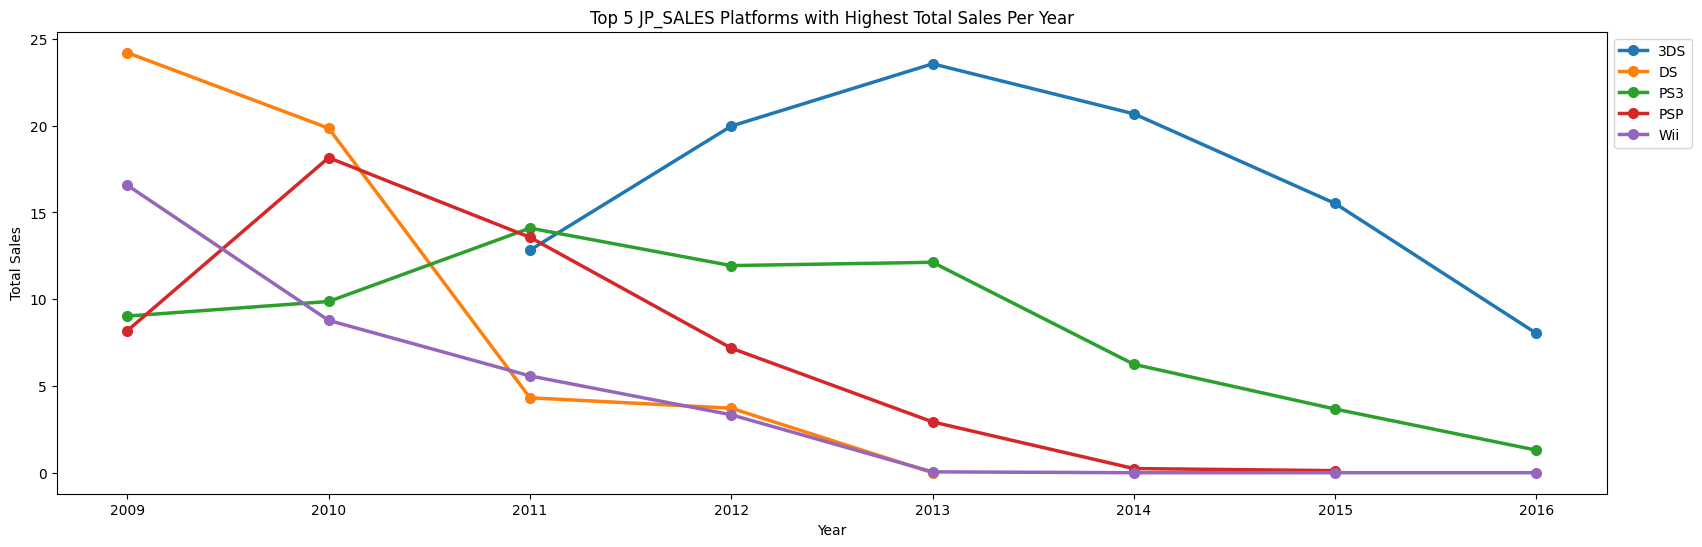

In [164]:
# identifikasi tren total sales per platform : Eropa
sales_platform_line(relevan_year, 'jp_sales')

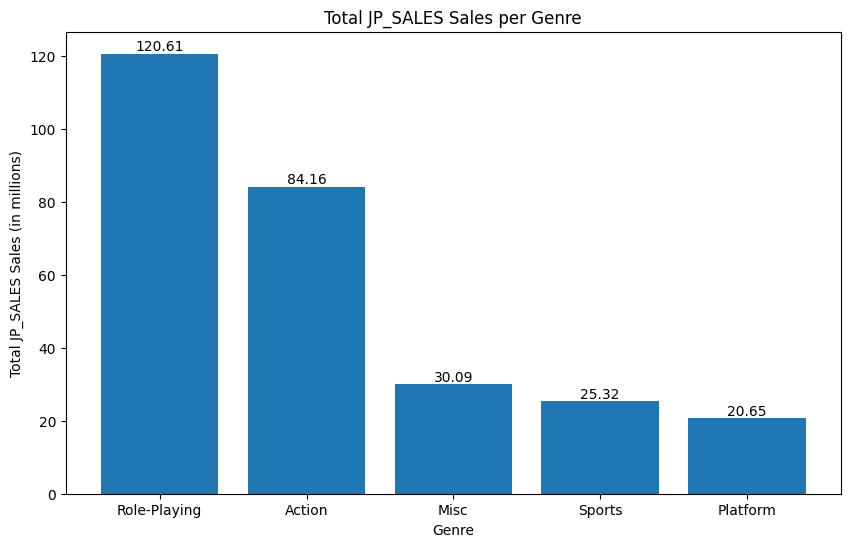

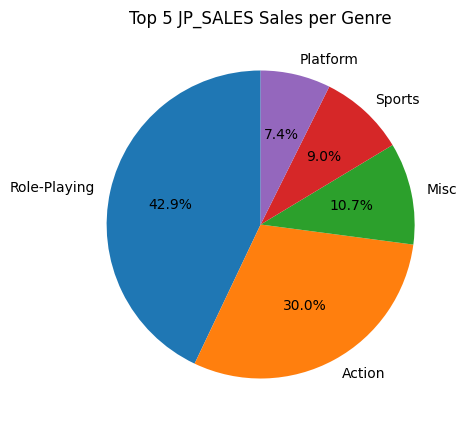

In [165]:
# identifikasi top 5 total sales per genre : Eropa
sales_genre_bar(relevan_year, 'jp_sales')

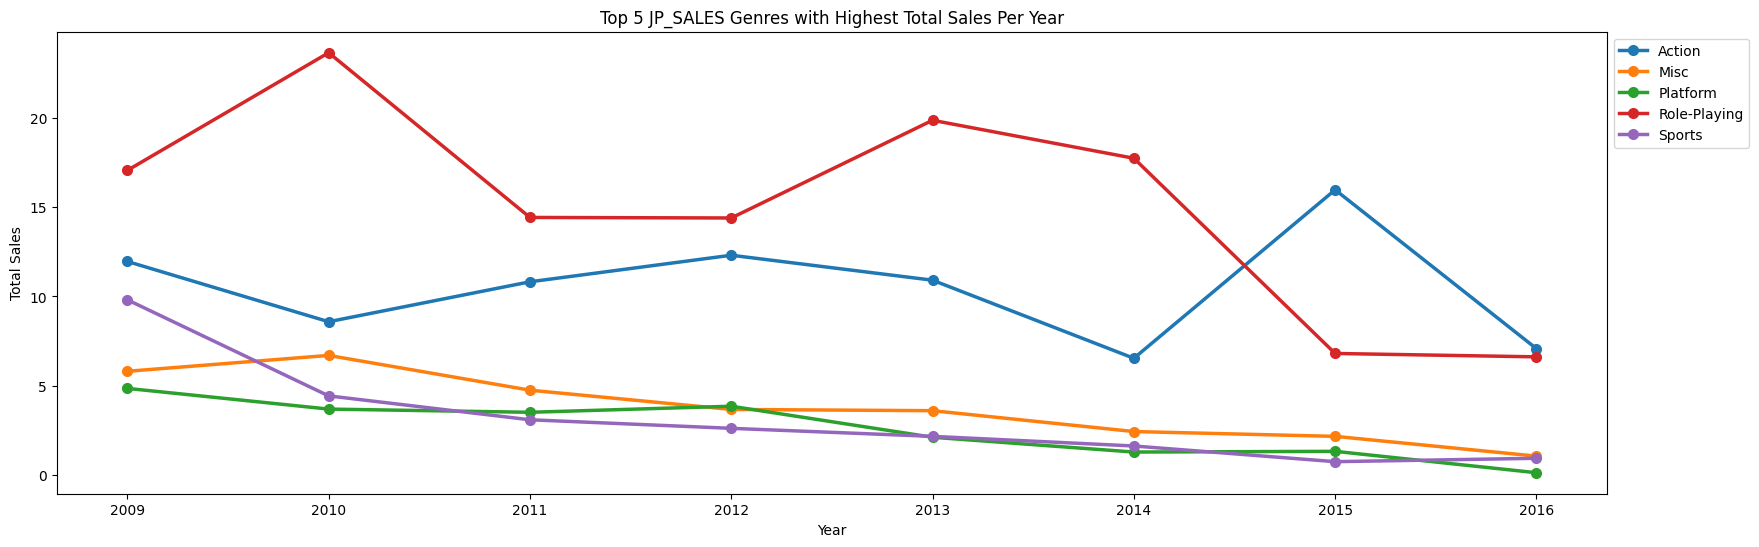

In [166]:
# identifikasi tren total sales per genre : Eropa
sales_genre_line(relevan_year, 'jp_sales')

**Kesimpulan**

Nintendo 3DS menjadi platform paling populer di Jepang, menghasilkan total penjualan senilai 100 juta dolar selama 2010 - 2016. Meskipun telah mengalami penurunan popularitas semenjak 2013, namun sejauh ini total penjualan pertahunnya tetap menjadi yang tertinggi dari seluruh platform video game popular lain. PlayStation 3 berada di posisi ke-2 dengan total penjualan senilai 68.3 juta dolar menunjukkan pola peningkatan yang cukup siginifikan selama 2009-2011, lalu kemudian popularitasnya digantikan oleh Nintendo 3DS.

Genre *'Role-Playing'* terbukti menjadi yang paling populer di Jepang dengan penjualan senilai 121 juta dolar, mencakup hampir 50% dari keseluruhan total penjualan top 5 platform-platform video game populer selama 2009-2016. Sementara itu diposisi ke-2, popularitas genre *'Action'* juga terlihat cukup baik dengan menunjukkan tren penjualan tahunan yang cukup stabil, direntang angka 12 juta hingga 15 juta dolar pertahun. Namun mengamati lebih jauh kami menemukan popularitas genre *'Role-Playing'* semenjak tahun 2015 mulai berada di posisi ke-2 yang bagi kami mengindikasikan akan segera terjadi perubahan tren pengguna untuk genre game popular.

## **4.4. ESRB Rating VS Penjualan Di Setiap Region**

In [167]:
relevan_year['rating'].unique()

array(['E', 'M', 'E10+', 'T', 'EC', 'RP'], dtype=object)

In [168]:
sales_by_rating = relevan_year.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()

# Menampilkan tabel dengan nilai dari kolom rating sebagai kolom
sales_by_rating = sales_by_rating.T.reset_index()
sales_by_rating.columns.name = None
sales_by_rating.rename(columns={'index': 'region'}, inplace=True)
sales_by_rating = pd.concat([sales_by_rating['region'], sales_by_rating.drop('region', axis=1)], axis=1)
sales_by_rating

,region,E,E10+,EC,M,RP,T
0,na_sales,570.77,206.62,1.83,452.92,0.00,233.82
1,eu_sales,405.53,125.26,0.00,339.29,0.03,159.04
2,jp_sales,251.67,21.22,0.00,37.28,0.00,56.86


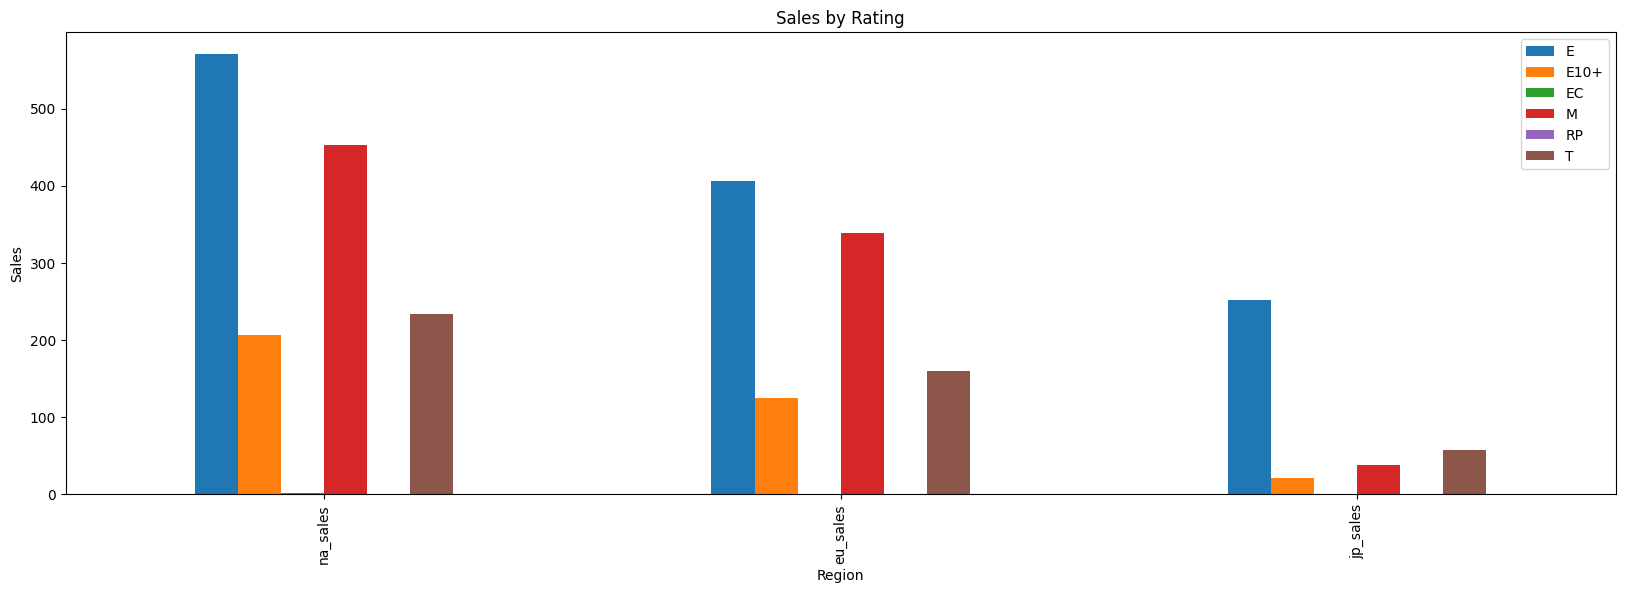

In [169]:
# Set the index to 'region' column
sales_by_rating = sales_by_rating.set_index('region')

# Create a bar chart
ax = sales_by_rating.plot(kind='bar', figsize=(20, 6))

# Set the title and labels
ax.set_title('Sales by Rating')
ax.set_xlabel('Region')
ax.set_ylabel('Sales')

# Show the plot
plt.show()

**Kesimpulan**

Data kami menunjukkan bahwa sebagian besar penjualan terlaris di seluruh region adalah untuk rating video game **E** (*Everyone*), sementara itu pada posisi ke-2 cukup bervariasi. Dimana untuk region Amerika Utara dan Eropa peringkat ke-2 terlaris adalah untuk rating **M** (*Mature*), sedangkan di region Jepang yaitu untuk rating **T** (*Teen*). Ada indikasi yang menunjukkan bahwa untuk pasar jepang, anak kecil hingga remaja cukup mendominasi pasar game, sebaliknya untuk region Amerika Utara dan Eropa didominasi oleh penikmat game usia dewasa.

# **Tahap 5. Menguji Hipotesis**

Kami akan menguji 2 hipotesis yang kami ajukan diawal tahap analisis, sebagai berikut :
1. Rata-rata rating pengguna platform Xbox One dan PC adalah sama
2. Rata-rata rating pengguna genre Action dan Sports berbeda

Untuk itu kami akan menetapkan ambang batas (*critical level*) sebesar 0.05 untuk *confidence level* sebesar 95%.

## **5.1. Hipotesis I : Rata-rata rating pengguna platform Xbox One dan PC adalah sama**

In [170]:
# Memilih kolom 'user_score' pada DataFrame bernama 'data_game', kemudian memilih baris-baris yang memiliki nilai 'platform' sama dengan 'XOne'
xone_plat = data_game[data_game['platform'] == 'XOne']['user_score']

# # Memilih kolom 'user_score' pada DataFrame bernama 'data_game', kemudian memilih baris-baris yang memiliki nilai 'platform' sama dengan 'PC'
pc_plat = data_game[data_game['platform'] == 'PC']['user_score']

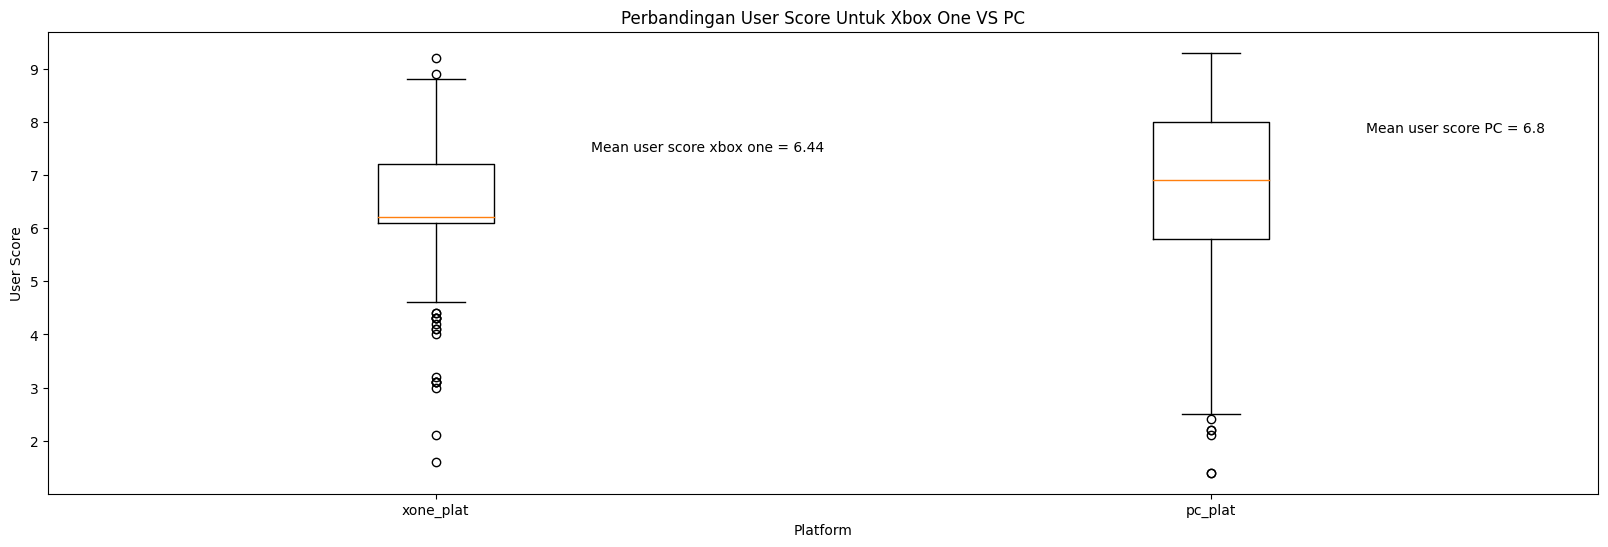

In [171]:
# Membuat boxplot untuk membandingkan user score platform Xbox dan PC
data = [xone_plat, pc_plat]

fig, ax = plt.subplots(figsize=(20, 6))
ax.boxplot(data, labels=['xone_plat', 'pc_plat'])
ax.set_title('Perbandingan User Score Untuk Xbox One VS PC')
ax.set_xlabel('Platform')
ax.set_ylabel('User Score')

# Tambahkan anotasi nilai median untuk setiap platform
mean_xone = round(np.mean(xone_plat), 2)
mean_pc = round(np.mean(pc_plat), 2)
ax.annotate(f"Mean user score xbox one = {mean_xone}", xy=(1, mean_xone), xytext=(1.2, mean_xone+1))
ax.annotate(f"Mean user score PC = {mean_pc}", xy=(2, mean_pc), xytext=(2.2, mean_pc+1))


plt.show()

In [172]:
# identifikasi nilai variance untuk kedua platform
print('XBox One user score variance:', np.var(xone_plat).round(2))
print('PC user score variance:', np.var(pc_plat).round(2))

XBox One user score variance: 1.42
PC user score variance: 2.11


**Kesimpulan**

Boxplot kami menunjukkan bahwa *user score* untuk platform PC memiliki tingkat rata-rata (mean dan median) yang lebih tinggi dibandingkan *user score* platform XBox One. Untuk itu kami akan menguji secara statistik untuk membuktikan bahwa *user score* dari kedua platform memang berbeda.

In [173]:
# Uji hipotesisnya
alpha = 0.05 # atur tingkat signifikansi statistik kritis

results = st.ttest_ind(xone_plat, pc_plat, equal_var=False) # equal_var=False karena variance kedua platform berbeda
print('p-value:', results.pvalue/2)

if results.pvalue/2 < alpha:
    print("Menolak H0, artinya : Rata-rata user score untuk platform PC lebih tinggi dibandingkan platform XBox One")
else:
    print("Tidak dapat menolak H0, artinya : Tidak terdapat perbedaan rata-rata user score untuk kedua platform")

p-value: 2.9477142274454864e-05
Menolak H0, artinya : Rata-rata user score untuk platform PC lebih tinggi dibandingkan platform XBox One


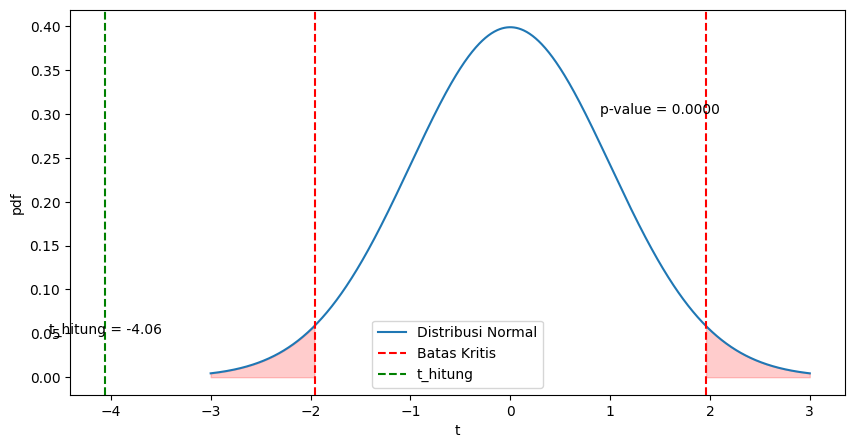

In [174]:
# T-test
results = stats.ttest_ind(xone_plat, pc_plat, equal_var=False)
p_value = results.pvalue / 2
t_value = results.statistic

# Kurva normal
null_hypothesis = stats.norm(0, 1)
x = np.linspace(-3, 3, 1000)
y = null_hypothesis.pdf(x)

# Batas kritis
alpha = 0.05
lower_critical = null_hypothesis.ppf(alpha/2)
upper_critical = null_hypothesis.ppf(1 - alpha/2)

# Plot kurva normal
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, y, label='Distribusi Normal')
ax.axvline(lower_critical, linestyle='--', color='r', label='Batas Kritis')
ax.axvline(upper_critical, linestyle='--', color='r')
ax.fill_between(x[x<=lower_critical], y[x<=lower_critical], color='r', alpha=0.2)
ax.fill_between(x[x>=upper_critical], y[x>=upper_critical], color='r', alpha=0.2)

# Anotasi p-value dan t-value
ax.axvline(t_value, linestyle='--', color='g', label='t_hitung')
ax.text(t_value, null_hypothesis.pdf(t_value)+0.05, f't_hitung = {t_value:.2f}', ha='center')
if t_value < 0:
    ax.fill_between(x[x<=t_value], y[x<=t_value], color='g', alpha=0.2)
else:
    ax.fill_between(x[x>=t_value], y[x>=t_value], color='g', alpha=0.2)
ax.text(1.5, 0.3, f'p-value = {p_value:.4f}', ha='center')

# Set label pada sumbu x dan y
ax.set_xlabel('t')
ax.set_ylabel('pdf')
ax.legend(loc='best')

plt.show()

## **5.2. Hipotesis II : Rata-rata rating pengguna genre Action dan Sports berbeda**

In [175]:
# Memilih kolom 'user_score' pada DataFrame bernama 'data_game', kemudian memilih baris-baris yang memiliki nilai 'genre' sama dengan 'Action'
act_genre = data_game[data_game['genre'] == 'Action']['user_score']

# # Memilih kolom 'user_score' pada DataFrame bernama 'data_game', kemudian memilih baris-baris yang memiliki nilai 'genre' sama dengan 'Sports'
sports_genre = data_game[data_game['genre'] == 'Sports']['user_score']

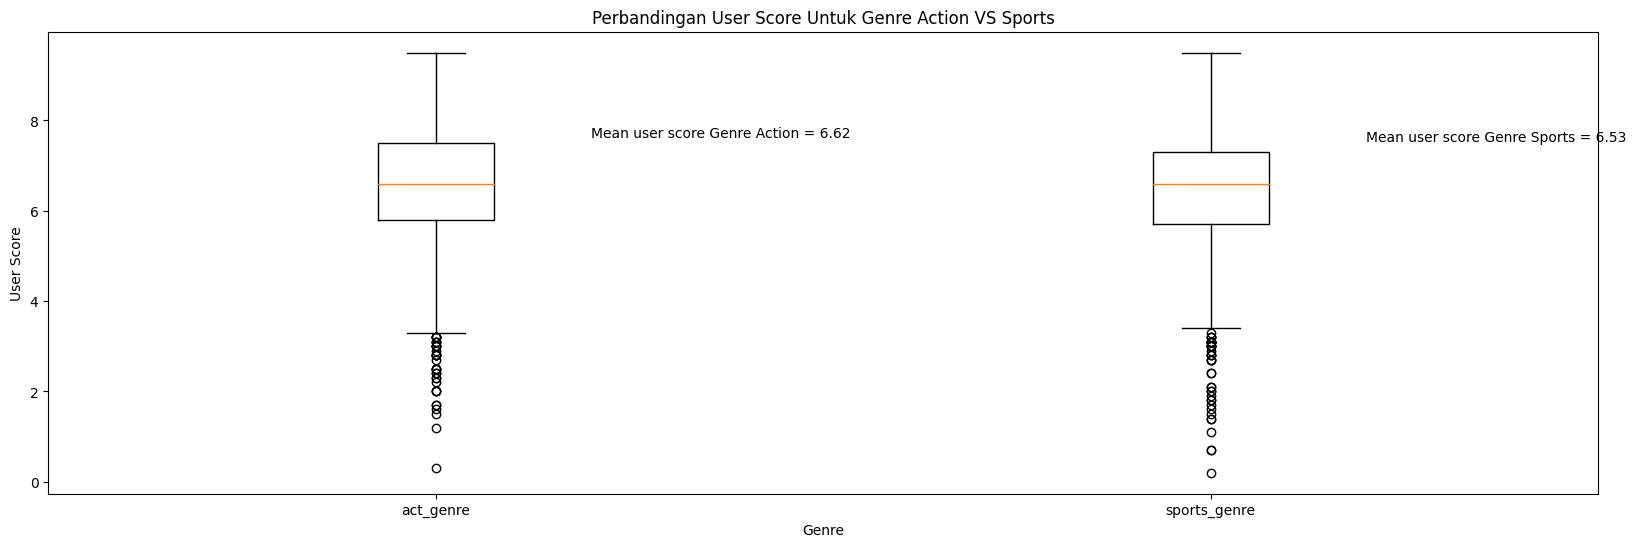

In [176]:
# Membuat boxplot untuk membandingkan user score platform Xbox dan PC
data = [act_genre, sports_genre]

fig, ax = plt.subplots(figsize=(20, 6))
ax.boxplot(data, labels=['act_genre', 'sports_genre'])
ax.set_title('Perbandingan User Score Untuk Genre Action VS Sports')
ax.set_xlabel('Genre')
ax.set_ylabel('User Score')

# Tambahkan anotasi nilai median untuk setiap genre
mean_act = round(np.mean(act_genre), 2)
mean_sports = round(np.mean(sports_genre), 2)
ax.annotate(f"Mean user score Genre Action = {mean_act}", xy=(1, mean_act), xytext=(1.2, mean_act+1))
ax.annotate(f"Mean user score Genre Sports = {mean_sports}", xy=(2, mean_sports), xytext=(2.2, mean_sports+1))

plt.show()

In [177]:
# identifikasi nilai variance untuk kedua genre
print('Action user score variance:', np.var(act_genre).round(2))
print('Sports user score variance:', np.var(sports_genre).round(2))

Action user score variance: 1.45
Sports user score variance: 1.59


**Kesimpulan**

Boxplot kami menunjukkan bahwa *user score* untuk genre action memiliki tingkat rata-rata yang lebih tinggi ketimbang genre sports. Untuk itu kami akan menguji secara statistik untuk membuktikan bahwa *user score* dari kedua genre memang berbeda.

In [178]:
# Uji hipotesisnya
alpha = 0.05 # atur tingkat signifikansi statistik kritis

results = st.ttest_ind(act_genre, sports_genre, equal_var=False) # equal_var=False karena variance kedua genre berbeda
print('p-value:', results.pvalue/2)

if results.pvalue/2 < alpha:
    print("Menolak H0, artinya : Rata-rata user score untuk genre action lebih tinggi dibandingkan genre sports")
else:
    print("Tidak dapat menolak H0, artinya : Tidak terdapat perbedaan rata-rata user score untuk kedua genre")

p-value: 0.0023892243627910014
Menolak H0, artinya : Rata-rata user score untuk genre action lebih tinggi dibandingkan genre sports


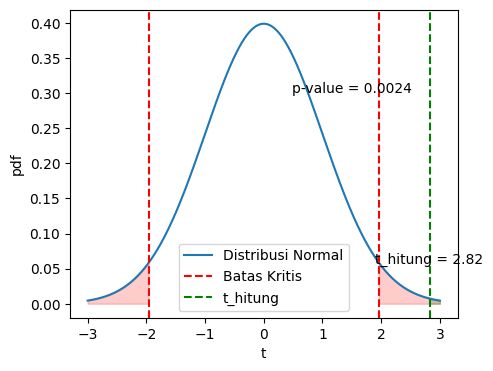

In [179]:
# T-test
results = stats.ttest_ind(act_genre, sports_genre, equal_var=False)
p_value = results.pvalue / 2
t_value = results.statistic

# Kurva normal
null_hypothesis = stats.norm(0, 1)
x = np.linspace(-3, 3, 1000)
y = null_hypothesis.pdf(x)

# Batas kritis
alpha = 0.05
lower_critical = null_hypothesis.ppf(alpha/2)
upper_critical = null_hypothesis.ppf(1 - alpha/2)

# Plot kurva normal
fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(x, y, label='Distribusi Normal')
ax.axvline(lower_critical, linestyle='--', color='r', label='Batas Kritis')
ax.axvline(upper_critical, linestyle='--', color='r')
ax.fill_between(x[x<=lower_critical], y[x<=lower_critical], color='r', alpha=0.2)
ax.fill_between(x[x>=upper_critical], y[x>=upper_critical], color='r', alpha=0.2)

# Anotasi p-value dan t-value
ax.axvline(t_value, linestyle='--', color='g', label='t_hitung')
ax.text(t_value, null_hypothesis.pdf(t_value)+0.05, f't_hitung = {t_value:.2f}', ha='center')
if t_value < 0:
    ax.fill_between(x[x<=t_value], y[x<=t_value], color='g', alpha=0.2)
else:
    ax.fill_between(x[x>=t_value], y[x>=t_value], color='g', alpha=0.2)
ax.text(1.5, 0.3, f'p-value = {p_value:.4f}', ha='center')

# Set label pada sumbu x dan y
ax.set_xlabel('t')
ax.set_ylabel('pdf')
ax.legend(loc='best')

plt.show()

# **Tahap 6. Kesimpulan Umum**

Secara eksploratif kami menangkap pola grafik yang menunjukkan indikasi yang kuat bahwa setiap 1-5 tahun sekali platform-platform video game baru akan masuk ke pasar, meskipun rentang-nya akan semakin mengecil seiring bergulirnya dekade pengamatan. Dekade pertengahan 90an hingga awal tahun 2000 menjadi periode yang menandakan kemunculan yang sangat masif untuk platform-platform video game baru. Hal ini tentu berimplikasi kepada kompetisi bisnis yang semakin kuat, yang kami percaya menjadi salah satu faktor penyebab sebagian besar platform yang dirilis selama dekade ini cepat tergantikan dan hanya memiliki masa hidup singkat, misalnya untuk platform semacam PCFX, TG16, SCD, dan GG. Alasan ini semakin diperkuat ketika kami menemukan fakta bahwa rata-rata masa hidup untuk seluruh platform video game yang dirilis di dekade 90s menjadi yang paling rendah masa hidupnya dengan kemampuan bertahan rata-rata hanya selama 4 tahun. Berbanding terbalik dengan era dekade 80s yang meskipun memiliki sedikit platform namun terbukti paling mampu bertahan. Artinya, kami dapat menyimpulkan bahwa sebagian besar platform yang rilis di dekade 80s merupakan kelompok platform-platform video game dengan masa pakai jangka panjang sehingga berpotensi dapat memberi keuntungan dalam penjualan jangka panjang. Sedangkan platform-platform untuk dekade setelahnya merupakan jenis platform dengan karakteristik cepat populer namun segera meredup, terbukti dari rata-rata tahun yang mereka perlukan untuk mencapai penjualan puncak hanya berkisar pada 2 hingga 4 tahun setelah perilisan, untuk kemudian mengalami penurunan penjualan yang signifikan. Ini tentu bertolak belakang dengan dekade 80s yang membutuhkan waktu hingga mencapai 11.6 tahun untuk mencapai penjualan puncak mereka.


Lebih luas, kami juga menemukan fakta yang menunjukkan bahwa meskipun sebagian besar platform mulai mengalami penurunan penjualan di tahun ke-3 atau ke-4 semenjak dirilis, namun penurunan yang terjadi setelahnya cukup beragam untuk masing-masing platform. Sebagian platform mengalami pola penurunan yang ekstrem setelah penjualan puncak terjadi di tahun sebelumnya, seperti pada platform GEN, DC dan PSV. Sebagian yang lain menurun secara bertahap dari tahun ke tahun hingga berakhir dengan sangat minimnya penjualan (yang bahkan dapat diklasifikasikan sebagai tidak ada penjualan), seperti Wii, NES, X360, PS3, yang mana kerap kali teridentifikasi untuk sebagian besar platform-platform yang awalnya sempat populer namun berangsur-angsur mulai ditinggalkan oleh penggunanya.